# Python Project 3: HR Analytics Case Study

**Author**: Chinh X. Mai, **Date**: August 24, 2022

## Table of contents <a class=anchor id=0></a>

* [1 Case description](#1)
* [2 Goal of the case study](#2)
* [3 Data analysis pipeline](#3)
* [4 Important libraries](#4)
* [5 Importing and validating data](#6)
* [6 Transforming data](#7)
    * [6.1 Processing working time](#7.1)
    * [6.2 Recoding values](#7.2)
    * [6.3 Joining tables](#7.3)
    * [6.4 Summary statistics](#7.4)
    * [6.5 Final table](#7.5)
* [7 Exploratory data analysis](#8)
    * [7.1 Univariate analysis](#8.1)
    * [7.2 Bivariate analysis](#8.2)
* [8 Regression analysis](#9)
    * [8.1 Preparing data for logistic regression](#9.1)
    * [8.2 Fitting explanatory models](#9.2)
* [9 Validating forecasting power and model choice](#10)
* [10 Interpreting results](#11)
* [11 Conclusion & executive summary](#12)

## [1 Case description](#0) <a class=anchor id=1></a>

A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons -

The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
A sizeable department has to be maintained, for the purposes of recruiting new talent
More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company
Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.

Since you are one of the star analysts at the firm, this project has been given to you.

## [2 Goal of the case study](#0) <a class=anchor id=2></a>

You are required to model the probability of attrition using a logistic regression. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.

Reference: [Kaggle HR Analytics Case Study](https://www.kaggle.com/datasets/vjchoudhary7/hr-analytics-case-study?select=in_time.csv)

## [3 Data analysis pipeline](#0) <a class=anchor id=3></a>

This analysis focuses on finding the factors having significant impacts on the attrition rate. The analysis pipeline is summarized shortly by the following figure:

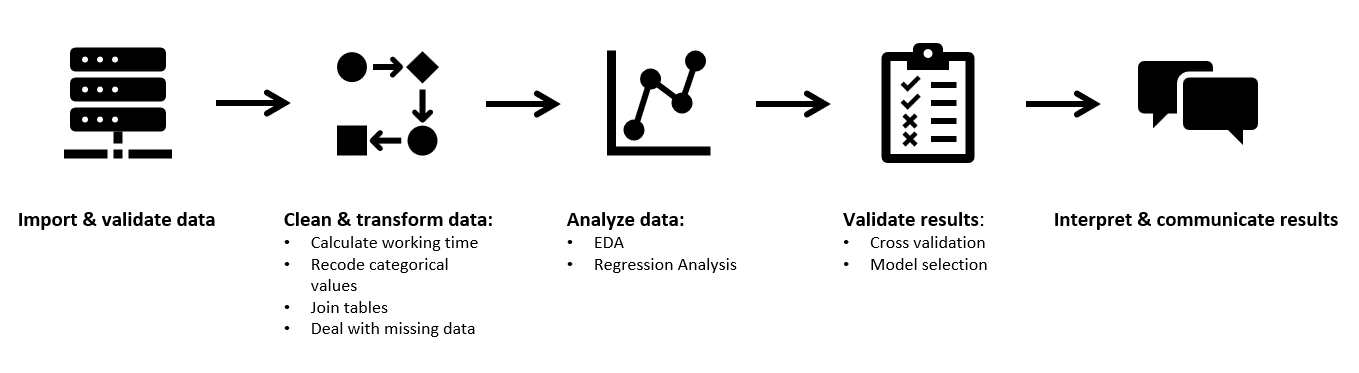

## [4 Important libraries](#0) <a class=anchor id=4></a>

In [1]:
# Data and array manipulation
import pandas as pd
import numpy as np
import datetime as dt

# Regression analysis
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Plotting and Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import cufflinks as cf

# Interactive charts
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Options
init_notebook_mode(connected = True)
cf.go_offline()
pd.options.display.float_format = '{:,.3f}'.format
pd.set_option('display.max_columns', None)

# Default graphic settings
default_yaxis = dict(showgrid = False,
                     zeroline = False,
                     showline = False,
                     showticklabels = True)

## [5 Importing and validating data](#0) <a class=anchor id=6></a>

In [2]:
# Importing metadata
df_data_dictionary = pd.read_excel('E:\\Data\\HR\\data_dictionary.xlsx').fillna('')

# Main table
df_general_data = pd.read_csv('E:\\Data\\HR\\general_data.csv')

# Employee & manager tables
df_employee_survey_data = pd.read_csv('E:\\Data\\HR\\employee_survey_data.csv')
df_manager_survey_data = pd.read_csv('E:\\Data\\HR\\manager_survey_data.csv')

# Check in & check out times
df_in_time = pd.read_csv('E:\\Data\\HR\\in_time.csv', index_col = 'Unnamed: 0').applymap(pd.Timestamp)
df_out_time = pd.read_csv('E:\\Data\\HR\\out_time.csv', index_col = 'Unnamed: 0').applymap(pd.Timestamp)

In [3]:
df_data_dictionary

Variable  \
0                        Age   
1                  Attrition   
2             BusinessTravel   
3                 Department   
4           DistanceFromHome   
5                  Education   
6                              
7                              
8                              
9                              
10            EducationField   
11             EmployeeCount   
12            EmployeeNumber   
13   EnvironmentSatisfaction   
14                             
15                             
16                             
17                    Gender   
18            JobInvolvement   
19                             
20                             
21                             
22                  JobLevel   
23                   JobRole   
24           JobSatisfaction   
25                             
26                             
27                             
28             MaritalStatus   
29             MonthlyIncome   
30        NumCompaniesWorked   
31                    Over18   
32         PercentSalaryHike   
33         PerformanceRating   
34                             
35                             
36                             
37  RelationshipSatisfaction   
38                             
39                             
40                             
41             StandardHours   
42          StockOptionLevel   
43         TotalWorkingYears   
44     TrainingTimesLastYear   
45           WorkLifeBalance   
46                             
47                             
48                             
49            YearsAtCompany   
50   YearsSinceLastPromotion   
51      YearsWithCurrManager   

                                              Meaning             Levels  
0                                 Age of the employee                     
1   Whether the employee left in the previous year...                     
2   How frequently the employees travelled for bus...                     
3                               Department in company                     
4                           Distance from home in kms                     
5                                     Education Level  1 'Below College'  
6                                                            2 'College'  
7                                                           3 'Bachelor'  
8                                                             4 'Master'  
9                                                             5 'Doctor'  
10                                 Field of education                     
11                                     Employee count                     
12                                 Employee number/id                     
13                Work Environment Satisfaction Level            1 'Low'  
14                                                            2 'Medium'  
15                                                              3 'High'  
16                                                         4 'Very High'  
17                                 Gender of employee                     
18                              Job Involvement Level            1 'Low'  
19                                                            2 'Medium'  
20                                                              3 'High'  
21                                                         4 'Very High'  
22          Job level at company on a scale of 1 to 5                     
23                        Name of job role in company                     
24                             Job Satisfaction Level            1 'Low'  
25                                                            2 'Medium'  
26                                                              3 'High'  
27                                                         4 'Very High'  
28                     Marital status of the employee                     
29                 Monthly income in rupees per month                    

In [4]:
df_data_dictionary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Variable  52 non-null     object
 1   Meaning   52 non-null     object
 2   Levels    52 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


In [5]:
df_general_data.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  JobLevel  \
0          2  Life Sciences              1           1  Female         1   
1          1  Life Sciences              1           2  Female         1   
2          4          Other              1           3    Male         4   
3          5  Life Sciences              1           4    Male         3   
4          1        Medical              1           5    Male         1   

                     JobRole MaritalStatus  MonthlyIncome  NumCompaniesWorked  \
0  Healthcare Representative       Married         131160               1.000   
1         Research Scientist        Single          41890               0.000   
2            Sales Executive       Married         193280               1.000   
3            Human Resources       Married          83210               3.000   
4            Sales Executive        Single          23420               4.000   

  Over18  PercentSalaryHike  StandardHours  StockOptionLevel  \
0      Y                 11              8                 0   
1      Y                 23              8                 1   
2      Y                 15              8                 3   
3      Y                 11              8                 3   
4      Y                 12              8                 2   

   TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0              1.000                      6               1   
1              6.000                      3               5   
2              5.000                      2               5   
3             13.000                      5               8   
4              9.000                      2               6   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     0  
1                        1                     4  
2                        0                     3  
3                        7                     5  
4                        0                     4

In [6]:
df_general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [7]:
df_employee_survey_data.head()

EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance
0           1                    3.000            4.000            2.000
1           2                    3.000            2.000            4.000
2           3                    2.000            2.000            1.000
3           4                    4.000            4.000            3.000
4           5                    4.000            1.000            3.000

In [8]:
df_employee_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [9]:
df_manager_survey_data.head()

EmployeeID  JobInvolvement  PerformanceRating
0           1               3                  3
1           2               2                  4
2           3               3                  3
3           4               2                  3
4           5               3                  3

In [10]:
df_manager_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


In [11]:
df_in_time.head()

2015-01-01          2015-01-02          2015-01-05          2015-01-06  \
1        NaT 2015-01-02 09:43:45 2015-01-05 10:08:48 2015-01-06 09:54:26   
2        NaT 2015-01-02 10:15:44 2015-01-05 10:21:05                 NaT   
3        NaT 2015-01-02 10:17:41 2015-01-05 09:50:50 2015-01-06 10:14:13   
4        NaT 2015-01-02 10:05:06 2015-01-05 09:56:32 2015-01-06 10:11:07   
5        NaT 2015-01-02 10:28:17 2015-01-05 09:49:58 2015-01-06 09:45:28   

           2015-01-07          2015-01-08          2015-01-09  \
1 2015-01-07 09:34:31 2015-01-08 09:51:09 2015-01-09 10:09:25   
2 2015-01-07 09:45:17 2015-01-08 10:09:04 2015-01-09 09:43:26   
3 2015-01-07 09:47:27 2015-01-08 10:03:40 2015-01-09 10:05:49   
4 2015-01-07 09:37:30 2015-01-08 10:02:08 2015-01-09 10:08:12   
5 2015-01-07 09:49:37 2015-01-08 10:19:44 2015-01-09 10:00:50   

           2015-01-12          2015-01-13 2015-01-14          2015-01-15  \
1 2015-01-12 09:42:53 2015-01-13 10:13:06        NaT 2015-01-15 10:01:24   
2 2015-01-12 10:00:07 2015-01-13 10:43:29        NaT 2015-01-15 09:37:57   
3 2015-01-12 10:03:47 2015-01-13 10:21:26        NaT 2015-01-15 09:55:11   
4 2015-01-12 10:13:42 2015-01-13 09:53:22        NaT 2015-01-15 10:00:50   
5 2015-01-12 10:29:27 2015-01-13 09:59:32        NaT 2015-01-15 10:06:12   

           2015-01-16          2015-01-19          2015-01-20  \
1 2015-01-16 10:19:08                 NaT 2015-01-20 09:50:34   
2 2015-01-16 09:57:18 2015-01-19 10:23:43 2015-01-20 09:29:03   
3 2015-01-16 10:05:36 2015-01-19 09:47:53 2015-01-20 09:57:09   
4 2015-01-16 09:58:06 2015-01-19 09:43:11 2015-01-20 10:29:06   
5 2015-01-16 10:03:50                 NaT 2015-01-20 10:10:29   

           2015-01-21          2015-01-22          2015-01-23 2015-01-26  \
1 2015-01-21 09:49:42 2015-01-22 09:47:45 2015-01-23 09:23:44        NaT   
2 2015-01-21 09:46:45 2015-01-22 10:03:51 2015-01-23 09:20:06        NaT   
3 2015-01-21 10:29:40 2015-01-22 09:59:11 2015-01-23 10:16:34        NaT   
4 2015-01-21 10:04:33 2015-01-22 09:51:07 2015-01-23 09:56:56        NaT   
5 2015-01-21 10:28:15 2015-01-22 10:10:10 2015-01-23 09:34:34        NaT   

           2015-01-27          2015-01-28          2015-01-29  \
1 2015-01-27 09:50:37 2015-01-28 09:56:13 2015-01-29 09:53:47   
2 2015-01-27 10:07:48 2015-01-28 10:08:25 2015-01-29 09:52:04   
3 2015-01-27 10:07:30 2015-01-28 10:05:43 2015-01-29 10:06:48   
4 2015-01-27 09:48:31 2015-01-28 10:00:39 2015-01-29 09:49:28   
5 2015-01-27 09:56:59 2015-01-28 09:45:03 2015-01-29 10:11:41   

           2015-01-30          2015-02-02          2015-02-03  \
1 2015-01-30 10:09:26 2015-02-02 09:38:43 2015-02-03 10:23:38   
2 2015-01-30 09:49:49 2015-02-02 10:07:26 2015-02-03 09:55:45   
3 2015-01-30 10:14:36 2015-02-02 09:54:45 2015-02-03 09:27:11   
4 2015-01-30 09:56:31 2015-02-02 10:14:08 2015-02-03 10:01:31   
5 2015-01-30 10:24:50 2015-02-02 09:43:27 2015-02-03 09:55:59   

           2015-02-04          2015-02-05          2015-02-06  \
1 2015-02-04 09:48:37 2015-02-05 09:52:36 2015-02-06 09:53:23   
2 2015-02-04 10:25:41 2015-02-05 10:05:11 2015-02-06 09:12:39   
3 2015-02-04 10:04:03 2015-02-05 10:08:11 2015-02-06 10:23:51   
4 2015-02-04 10:31:44 2015-02-05 10:02:39 2015-02-06 09:24:21   
5 2015-02-04 10:03:25 2015-02-05 10:02:17 2015-02-06 09:55:43   

           2015-02-09          2015-02-10          2015-02-11  \
1 2015-02-09 10:01:45 2015-02-10 10:14:18 2015-02-11 10:18:44   
2                 NaT 2015-02-10 10:10:13 2015-02-11 09:40:20   
3 2015-02-09 10:08:43 2015-02-10 10:26:18 2015-02-11 10:02:13   
4 2015-02-09 09:56:27                 NaT 2015-02-11 10:00:32   
5 2015-02-09 10:15:16 2015-02-10 09:43:48 2015-02-11 10:03:36   

           2015-02-12          2015-02-13          2015-02-16  \
1 2015-02-12 10:10:35 2015-02-13 09:13:07 2015-02-16 10:14:02   
2 2015-02-12 10:10:09 2015-02-13 09:35:25 2015-02-16 10:04:12   
3 2015-02-12 09:55:10 2015-02-13 10:32:34 2015-02-16 10:18:43   
4 2015-02-12 10:01:48 201

In [12]:
df_in_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 1 to 4410
Columns: 261 entries, 2015-01-01 to 2015-12-31
dtypes: datetime64[ns](261)
memory usage: 8.8 MB


In [13]:
df_out_time.head()

2015-01-01          2015-01-02          2015-01-05          2015-01-06  \
1        NaT 2015-01-02 16:56:15 2015-01-05 17:20:11 2015-01-06 17:19:05   
2        NaT 2015-01-02 18:22:17 2015-01-05 17:48:22                 NaT   
3        NaT 2015-01-02 16:59:14 2015-01-05 17:06:46 2015-01-06 16:38:32   
4        NaT 2015-01-02 17:25:24 2015-01-05 17:14:03 2015-01-06 17:07:42   
5        NaT 2015-01-02 18:31:37 2015-01-05 17:49:15 2015-01-06 17:26:25   

           2015-01-07          2015-01-08          2015-01-09  \
1 2015-01-07 16:34:55 2015-01-08 17:08:32 2015-01-09 17:38:29   
2 2015-01-07 17:09:06 2015-01-08 17:34:04 2015-01-09 16:52:29   
3 2015-01-07 16:33:21 2015-01-08 17:24:22 2015-01-09 16:57:30   
4 2015-01-07 16:32:40 2015-01-08 16:53:11 2015-01-09 17:19:47   
5 2015-01-07 17:37:59 2015-01-08 17:59:28 2015-01-09 17:44:08   

           2015-01-12          2015-01-13 2015-01-14          2015-01-15  \
1 2015-01-12 16:58:39 2015-01-13 18:02:58        NaT 2015-01-15 17:22:13   
2 2015-01-12 17:36:48 2015-01-13 18:00:13        NaT 2015-01-15 17:14:44   
3 2015-01-12 17:28:54 2015-01-13 17:21:25        NaT 2015-01-15 17:21:29   
4 2015-01-12 17:13:37 2015-01-13 17:11:45        NaT 2015-01-15 16:53:26   
5 2015-01-12 18:51:21 2015-01-13 18:14:58        NaT 2015-01-15 18:21:48   

           2015-01-16          2015-01-19          2015-01-20  \
1 2015-01-16 17:35:11                 NaT 2015-01-20 16:37:07   
2 2015-01-16 17:40:57 2015-01-19 17:58:22 2015-01-20 17:05:13   
3 2015-01-16 17:18:13 2015-01-19 16:52:13 2015-01-20 16:52:23   
4 2015-01-16 16:52:34 2015-01-19 16:14:18 2015-01-20 17:39:50   
5 2015-01-16 18:28:03                 NaT 2015-01-20 17:59:24   

           2015-01-21          2015-01-22          2015-01-23 2015-01-26  \
1 2015-01-21 16:55:24 2015-01-22 16:50:47 2015-01-23 17:00:01        NaT   
2 2015-01-21 17:41:05 2015-01-22 17:26:26 2015-01-23 17:06:50        NaT   
3 2015-01-21 17:17:50 2015-01-22 17:27:54 2015-01-23 17:11:52        NaT   
4 2015-01-21 16:46:51 2015-01-22 16:51:48 2015-01-23 17:05:41        NaT   
5 2015-01-21 18:41:38 2015-01-22 18:27:37 2015-01-23 16:53:11        NaT   

           2015-01-27          2015-01-28          2015-01-29  \
1 2015-01-27 17:28:22 2015-01-28 17:03:21 2015-01-29 17:18:36   
2 2015-01-27 17:35:50 2015-01-28 17:19:48 2015-01-29 17:07:38   
3 2015-01-27 17:22:27 2015-01-28 16:24:04 2015-01-29 17:20:07   
4 2015-01-27 17:03:48 2015-01-28 17:33:22 2015-01-29 16:44:01   
5 2015-01-27 17:52:43 2015-01-28 17:40:46 2015-01-29 18:16:26   

           2015-01-30          2015-02-02          2015-02-03  \
1 2015-01-30 17:00:25 2015-02-02 16:32:49 2015-02-03 17:35:49   
2 2015-01-30 16:53:22 2015-02-02 17:45:18 2015-02-03 17:33:42   
3 2015-01-30 17:16:03 2015-02-02 16:59:01 2015-02-03 15:58:24   
4 2015-01-30 17:09:42 2015-02-02 17:18:12 2015-02-03 17:27:41   
5 2015-01-30 18:26:33 2015-02-02 17:53:21 2015-02-03 17:57:43   

           2015-02-04          2015-02-05          2015-02-06  \
1 2015-02-04 17:24:56 2015-02-05 17:26:31 2015-02-06 17:21:35   
2 2015-02-04 18:04:20 2015-02-05 17:43:25 2015-02-06 17:06:42   
3 2015-02-04 17:25:54 2015-02-05 16:29:41 2015-02-06 17:18:15   
4 2015-02-04 17:30:22 2015-02-05 17:11:44 2015-02-06 16:33:04   
5 2015-02-04 18:03:13 2015-02-05 18:07:43 2015-02-06 17:38:14   

           2015-02-09          2015-02-10          2015-02-11  \
1 2015-02-09 17:37:50 2015-02-10 17:30:20 2015-02-11 17:30:19   
2                 NaT 2015-02-10 18:12:17 2015-02-11 17:18:36   
3 2015-02-09 16:48:18 2015-02-10 17:15:49 2015-02-11 16:49:22   
4 2015-02-09 17:16:29                 NaT 2015-02-11 17:04:11   
5 2015-02-09 18:26:28 2015-02-10 17:24:32 2015-02-11 18:01:25   

           2015-02-12          2015-02-13          2015-02-16  \
1 2015-02-12 17:36:42 2015-02-13 16:25:26 2015-02-16 17:50:23   
2 2015-02-12 18:08:01 2015-02-13 17:19:25 2015-02-16 17:46:09   
3 2015-02-12 16:22:31 2015-02-13 17:41:15 2015-02-16 17:20:05   
4 2015-02-12 17:22:16 201

In [14]:
df_out_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 1 to 4410
Columns: 261 entries, 2015-01-01 to 2015-12-31
dtypes: datetime64[ns](261)
memory usage: 8.8 MB


## [6 Transforming data](#0) <a class=anchor id=7></a>

### [6.1 Processing working time](#0) <a class=anchor id=7.1></a>

In [15]:
# Calculating working duration by taking difference between in and out times
df_work_duration = (df_out_time - df_in_time).replace({np.nan: dt.timedelta(0)}).applymap(pd.Timedelta.total_seconds)
df_work_duration.head()

2015-01-01  2015-01-02  2015-01-05  2015-01-06  2015-01-07  2015-01-08  \
1       0.000  25,950.000  25,883.000  26,679.000  25,224.000  26,243.000   
2       0.000  29,193.000  26,837.000       0.000  26,629.000  26,700.000   
3       0.000  24,093.000  26,156.000  23,059.000  24,354.000  26,442.000   
4       0.000  26,418.000  26,251.000  24,995.000  24,910.000  24,663.000   
5       0.000  29,000.000  28,757.000  27,657.000  28,102.000  27,584.000   

   2015-01-09  2015-01-12  2015-01-13  2015-01-14  2015-01-15  2015-01-16  \
1  26,944.000  26,146.000  28,192.000       0.000  26,449.000  26,163.000   
2  25,743.000  27,401.000  26,204.000       0.000  27,407.000  27,819.000   
3  24,701.000  26,707.000  25,199.000       0.000  26,778.000  25,957.000   
4  25,895.000  25,195.000  26,303.000       0.000  24,756.000  24,868.000   
5  27,798.000  30,114.000  29,726.000       0.000  29,736.000  30,253.000   

   2015-01-19  2015-01-20  2015-01-21  2015-01-22  2015-01-23  2015-01-26  \
1       0.000  24,393.000  25,542.000  25,382.000  27,377.000       0.000   
2  27,279.000  27,370.000  28,460.000  26,555.000  28,004.000       0.000   
3  25,460.000  24,914.000  24,490.000  26,923.000  24,918.000       0.000   
4  23,467.000  25,844.000  24,138.000  25,241.000  25,725.000       0.000   
5       0.000  28,135.000  29,603.000  29,847.000  26,317.000       0.000   

   2015-01-27  2015-01-28  2015-01-29  2015-01-30  2015-02-02  2015-02-03  \
1  27,465.000  25,628.000  26,689.000  24,659.000  24,846.000  25,931.000   
2  26,882.000  25,883.000  26,134.000  25,413.000  27,472.000  27,477.000   
3  26,097.000  22,701.000  25,999.000  25,287.000  25,456.000  23,473.000   
4  26,117.000  27,163.000  24,873.000  25,991.000  25,444.000  26,770.000   
5  28,544.000  28,543.000  29,085.000  28,903.000  29,394.000  28,904.000   

   2015-02-04  2015-02-05  2015-02-06  2015-02-09  2015-02-10  2015-02-11  \
1  27,379.000  27,235.000  26,892.000  27,365.000  26,162.000  25,895.000   
2  27,519.000  27,494.000  28,443.000       0.000  28,924.000  27,496.000   
3  26,511.000  22,890.000  24,864.000  23,975.000  24,571.000  24,429.000   
4  25,118.000  25,745.000  25,723.000  26,402.000       0.000  25,419.000   
5  28,788.000  29,126.000  27,751.000  29,472.000  27,644.000  28,669.000   

   2015-02-12  2015-02-13  2015-02-16  2015-02-17  2015-02-18  2015-02-19  \
1  26,767.000  25,939.000  27,381.000  26,698.000  28,223.000       0.000   
2  28,672.000  27,840.000  27,717.000  26,665.000  28,454.000  28,486.000   
3  23,241.000  25,721.000  25,282.000  24,067.000  25,369.000  25,057.000   
4  26,428.000  25,724.000  26,461.000  25,598.000  24,741.000  27,085.000   
5  27,615.000  31,394.000  28,520.000  28,449.000  29,139.000  28,246.000   

   2015-02-20  2015-02-23  2015-02-24  2015-02-25  2015-02-26  2015-02-27  \
1  28,196.000  26,788.000  26,010.000  27,301.000  25,923.000  26,589.000   
2  26,727.000  29,720.000  28,080.000  27,908.000  28,248.000  29,233.000   
3  24,791.000  27,917.000  24,306.000  24,985.000  27,191.000  24,678.000   
4  24,112.000  25,847.000  25,431.000  22,610.000  26,489.000  26,150.000   
5  29,631.000  28,090.000  29,228.000  28,916.000  27,755.000  28,682.000   

   2015-03-02  2015-03-03  2015-03-04  2015-03-05  2015-03-06  2015-03-09  \
1  25,765.000  24,335.000  27,880.000       0.000  28,134.000  26,671.000   
2  27,654.000  27,697.000  28,539.000       0.000  26,423.000  29,268.000   
3  26,975.000  25,396.000  25,879.000       0.000  24,376.000  24,649.000   
4       0.000  26,652.000  23,269.000       0.000       0.000  25,766.000   
5  31,295.000  28,621.000  29,062.000       0.000  29,458.000  30,083.000   

   2015-03-10  2015-03-11  2015-03-12  2015-03-13  2015-03-16  2015-03-17  \
1  24,923.000  25,780.000  25,488.000  26,317.000       0.000  24,894.000   
2  27,686.000  28,752.000  27,081.000  28,151.000  25,939.000  26,514.000   
3  24,743.000  25,487.000  26,192.000  24,557.000  24,338.000  25,63

In [16]:
# Adding Employee ID
df_work_duration.reset_index(inplace = True)
df_work_duration.rename(columns={'index': 'EmployeeID'},inplace=True)
df_work_duration

EmployeeID  2015-01-01  2015-01-02  2015-01-05  2015-01-06  2015-01-07  \
0              1       0.000  25,950.000  25,883.000  26,679.000  25,224.000   
1              2       0.000  29,193.000  26,837.000       0.000  26,629.000   
2              3       0.000  24,093.000  26,156.000  23,059.000  24,354.000   
3              4       0.000  26,418.000  26,251.000  24,995.000  24,910.000   
4              5       0.000  29,000.000  28,757.000  27,657.000  28,102.000   
...          ...         ...         ...         ...         ...         ...   
4405        4406       0.000  29,225.000  31,827.000  30,238.000  31,842.000   
4406        4407       0.000  22,520.000       0.000  19,417.000  20,620.000   
4407        4408       0.000  26,194.000  27,307.000  27,509.000  28,750.000   
4408        4409       0.000  34,292.000  34,513.000  35,238.000  33,808.000   
4409        4410       0.000  24,610.000  26,208.000  24,220.000  24,632.000   

      2015-01-08  2015-01-09  2015-01-12  2015-01-13  2015-01-14  2015-01-15  \
0     26,243.000  26,944.000  26,146.000  28,192.000       0.000  26,449.000   
1     26,700.000  25,743.000  27,401.000  26,204.000       0.000  27,407.000   
2     26,442.000  24,701.000  26,707.000  25,199.000       0.000  26,778.000   
3     24,663.000  25,895.000  25,195.000  26,303.000       0.000  24,756.000   
4     27,584.000  27,798.000  30,114.000  29,726.000       0.000  29,736.000   
...          ...         ...         ...         ...         ...         ...   
4405  29,605.000  29,811.000  30,098.000  31,533.000       0.000  30,080.000   
4406  22,296.000  20,572.000  21,790.000  22,652.000       0.000  21,649.000   
4407  26,267.000  25,314.000  27,993.000  26,922.000       0.000  29,242.000   
4408  33,136.000       0.000  33,459.000  34,559.000       0.000  34,144.000   
4409  26,736.000  25,099.000  24,706.000  26,968.000       0.000  25,532.000   

      2015-01-16  2015-01-19  2015-01-20  2015-01-21  2015-01-22  2015-01-23  \
0     26,163.000       0.000  24,393.000  25,542.000  25,382.000  27,377.000   
1     27,819.000  27,279.000  27,370.000  28,460.000  26,555.000  28,004.000   
2     25,957.000  25,460.000  24,914.000  24,490.000  26,923.000  24,918.000   
3     24,868.000  23,467.000  25,844.000  24,138.000  25,241.000  25,725.000   
4     30,253.000       0.000  28,135.000  29,603.000  29,847.000  26,317.000   
...          ...         ...         ...         ...         ...         ...   
4405  32,427.000  32,608.000  30,989.000  30,883.000  31,355.000  28,849.000   
4406  20,133.000  20,237.000  23,461.000  21,930.000       0.000  20,852.000   
4407  27,717.000  28,229.000  26,429.000  29,573.000  25,887.000  26,676.000   
4408  33,621.000  33,457.000  35,222.000  34,902.000  34,432.000  33,498.000   
4409  24,682.000  23,255.000  24,929.000  25,229.000       0.000       0.000   

      2015-01-26  2015-01-27  2015-01-28  2015-01-29  2015-01-30  2015-02-02  \
0          0.000  27,465.000  25,628.000  26,689.000  24,659.000  24,846.000   
1          0.000  26,882.000  25,883.000  26,134.000  25,413.000  27,472.000   
2          0.000  26,097.000  22,701.000  25,999.000  25,287.000  25,456.000   
3          0.000  26,117.000  27,163.000  24,873.000  25,991.000  25,444.000   
4          0.000  28,544.000  28,543.000  29,085.000  28,903.000  29,394.000   
...          ...         ...         ...         ...         ...         ...   
4405       0.000  31,754.000  31,744.000  29,399.000  29,905.000  29,846.000   
4406       0.000  24,295.000  22,284.000  22,641.000  23,244.000       0.000   
4407       0.000  26,549.000       0.000  26,548.000       0.000  25,254.000   
4408       0.000  34,568.000  32,317.000  35,427.000  33,344.000  33,175.000   
4409       0.000  25,666.000  25,686.000  24,227.000  24,405.000  24,190.000   

      2015-02-03  2015-02-04  2015-02-05  2015-02-06  2015-02-09  2015-02-10  \
0     25,931.000  27,379.000  27,235.000  26,892.000  27,365.000  26,162.000   
1 

In [17]:
# Calculating average working duration in seconds for each employee
df_work_duration['Avg_duration_sec'] = df_work_duration.mean(axis = 1)
df_avg_work_duration = df_work_duration[['EmployeeID', 'Avg_duration_sec']]
df_avg_work_duration.head()

EmployeeID  Avg_duration_sec
0           1        23,505.626
1           2        25,030.679
2           3        23,320.374
3           4        23,228.458
4           5        26,952.103

### [6.2 Recoding values](#0) <a class=anchor id=7.2></a>

In [18]:
# General data
df_general_data.Education = df_general_data.Education.replace({1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'})

# Employee survey data
df_employee_survey_data.EnvironmentSatisfaction = df_employee_survey_data.EnvironmentSatisfaction.replace({1: 'Low', 2: 'Medium', 3:'High', 4: 'Very High'})
df_employee_survey_data.JobSatisfaction = df_employee_survey_data.JobSatisfaction.replace({1: 'Low', 2: 'Medium', 3:'High', 4: 'Very High'})
df_employee_survey_data.WorkLifeBalance = df_employee_survey_data.WorkLifeBalance.replace({1: 'Bad', 2: 'Good', 3:'Better', 4: 'Best'})

# Manager survey data
df_manager_survey_data.JobInvolvement = df_manager_survey_data.JobInvolvement.replace({1: 'Low', 2: 'Medium', 3:'High', 4: 'Very High'})
df_manager_survey_data.PerformanceRating = df_manager_survey_data.PerformanceRating.replace({1: 'Low', 2: 'Good', 3:'Excellent', 4: 'Outstanding'})

df_general_data.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

       Education EducationField  EmployeeCount  EmployeeID  Gender  JobLevel  \
0        College  Life Sciences              1           1  Female         1   
1  Below College  Life Sciences              1           2  Female         1   
2         Master          Other              1           3    Male         4   
3         Doctor  Life Sciences              1           4    Male         3   
4  Below College        Medical              1           5    Male         1   

                     JobRole MaritalStatus  MonthlyIncome  NumCompaniesWorked  \
0  Healthcare Representative       Married         131160               1.000   
1         Research Scientist        Single          41890               0.000   
2            Sales Executive       Married         193280               1.000   
3            Human Resources       Married          83210               3.000   
4            Sales Executive        Single          23420               4.000   

  Over18  PercentSalaryHike  StandardHours  StockOptionLevel  \
0      Y                 11              8                 0   
1      Y                 23              8                 1   
2      Y                 15              8                 3   
3      Y                 11              8                 3   
4      Y                 12              8                 2   

   TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0              1.000                      6               1   
1              6.000                      3               5   
2              5.000                      2               5   
3             13.000                      5               8   
4              9.000                      2               6   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     0  
1                        1                     4  
2                        0                     3  
3                        7                     5  
4                        0                     4

In [19]:
df_employee_survey_data.head()

EmployeeID EnvironmentSatisfaction JobSatisfaction WorkLifeBalance
0           1                    High       Very High            Good
1           2                    High          Medium            Best
2           3                  Medium          Medium             Bad
3           4               Very High       Very High          Better
4           5               Very High             Low          Better

In [20]:
df_manager_survey_data.head()

EmployeeID JobInvolvement PerformanceRating
0           1           High         Excellent
1           2         Medium       Outstanding
2           3           High         Excellent
3           4         Medium         Excellent
4           5           High         Excellent

### [6.3 Joining tables](#0) <a class=anchor id=7.3></a>

In [21]:
df_master_data = df_general_data.merge(df_employee_survey_data, left_on = 'EmployeeID', right_on = 'EmployeeID')
df_master_data = df_master_data.merge(df_manager_survey_data, left_on = 'EmployeeID', right_on = 'EmployeeID')
df_master_data = df_master_data.merge(df_avg_work_duration, left_on = 'EmployeeID', right_on = 'EmployeeID')

df_master_data.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

       Education EducationField  EmployeeCount  EmployeeID  Gender  JobLevel  \
0        College  Life Sciences              1           1  Female         1   
1  Below College  Life Sciences              1           2  Female         1   
2         Master          Other              1           3    Male         4   
3         Doctor  Life Sciences              1           4    Male         3   
4  Below College        Medical              1           5    Male         1   

                     JobRole MaritalStatus  MonthlyIncome  NumCompaniesWorked  \
0  Healthcare Representative       Married         131160               1.000   
1         Research Scientist        Single          41890               0.000   
2            Sales Executive       Married         193280               1.000   
3            Human Resources       Married          83210               3.000   
4            Sales Executive        Single          23420               4.000   

  Over18  PercentSalaryHike  StandardHours  StockOptionLevel  \
0      Y                 11              8                 0   
1      Y                 23              8                 1   
2      Y                 15              8                 3   
3      Y                 11              8                 3   
4      Y                 12              8                 2   

   TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0              1.000                      6               1   
1              6.000                      3               5   
2              5.000                      2               5   
3             13.000                      5               8   
4              9.000                      2               6   

   YearsSinceLastPromotion  YearsWithCurrManager EnvironmentSatisfaction  \
0                        0                     0                    High   
1                        1                     4                    High   
2                        0                     3                  Medium   
3                        7                     5               Very High   
4                        0                     4               Very High   

  JobSatisfaction WorkLifeBalance JobInvolvement PerformanceRating  \
0       Very High            Good           High         Excellent   
1          Medium            Best         Medium       Outstanding   
2          Medium             Bad           High         Excellent   
3       Very High          Better         Medium         Excellent   
4             Low          Better           High         Excellent   

   Avg_duration_sec  
0        23,505.626  
1        25,030.679  
2        23,320.374  
3        23,228.458  
4        26,952.103

### [6.4 Summary statistics](#0) <a class=anchor id=7.4></a>

In [22]:
df_master_data.describe().round(decimals = 2)

Age  DistanceFromHome  EmployeeCount  EmployeeID  JobLevel  \
count 4,410.000         4,410.000      4,410.000   4,410.000 4,410.000   
mean     36.920             9.190          1.000   2,205.500     2.060   
std       9.130             8.110          0.000   1,273.200     1.110   
min      18.000             1.000          1.000       1.000     1.000   
25%      30.000             2.000          1.000   1,103.250     1.000   
50%      36.000             7.000          1.000   2,205.500     2.000   
75%      43.000            14.000          1.000   3,307.750     3.000   
max      60.000            29.000          1.000   4,410.000     5.000   

       MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  StandardHours  \
count      4,410.000           4,391.000          4,410.000      4,410.000   
mean      65,029.310               2.690             15.210          8.000   
std       47,068.890               2.500              3.660          0.000   
min       10,090.000               0.000             11.000          8.000   
25%       29,110.000               1.000             12.000          8.000   
50%       49,190.000               2.000             14.000          8.000   
75%       83,800.000               4.000             18.000          8.000   
max      199,990.000               9.000             25.000          8.000   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count         4,410.000          4,401.000              4,410.000   
mean              0.790             11.280                  2.800   
std               0.850              7.780                  1.290   
min               0.000              0.000                  0.000   
25%               0.000              6.000                  2.000   
50%               1.000             10.000                  3.000   
75%               1.000             15.000                  3.000   
max               3.000             40.000                  6.000   

       YearsAtCompany  YearsSinceLastPromotion  YearsWithCurrManager  \
count       4,410.000                4,410.000             4,410.000   
mean            7.010                    2.190                 4.120   
std             6.130                    3.220                 3.570   
min             0.000                    0.000                 0.000   
25%             3.000                    0.000                 2.000   
50%             5.000                    1.000                 3.000   
75%             9.000                    3.000                 7.000   
max            40.000                   15.000                17.000   

       Avg_duration_sec  
count         4,410.000  
mean         25,033.590  
std           4,553.010  
min          18,541.080  
25%          21,491.850  
50%          23,999.790  
75%          27,040.800  
max          37,428.560

In [23]:
df_master_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
Avg_duration_sec            0
dtype: int64

In [24]:
df_master_data.dropna(inplace = True)

### [6.5 Final table](#0) <a class=anchor id=7.5></a>

In [25]:
df_final = df_master_data.drop(['EmployeeID', 'Over18', 'StandardHours', 'EmployeeCount'], axis = 1)
df_final.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

       Education EducationField  Gender  JobLevel                    JobRole  \
0        College  Life Sciences  Female         1  Healthcare Representative   
1  Below College  Life Sciences  Female         1         Research Scientist   
2         Master          Other    Male         4            Sales Executive   
3         Doctor  Life Sciences    Male         3            Human Resources   
4  Below College        Medical    Male         1            Sales Executive   

  MaritalStatus  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
0       Married         131160               1.000                 11   
1        Single          41890               0.000                 23   
2       Married         193280               1.000                 15   
3       Married          83210               3.000                 11   
4        Single          23420               4.000                 12   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                 0              1.000                      6               1   
1                 1              6.000                      3               5   
2                 3              5.000                      2               5   
3                 3             13.000                      5               8   
4                 2              9.000                      2               6   

   YearsSinceLastPromotion  YearsWithCurrManager EnvironmentSatisfaction  \
0                        0                     0                    High   
1                        1                     4                    High   
2                        0                     3                  Medium   
3                        7                     5               Very High   
4                        0                     4               Very High   

  JobSatisfaction WorkLifeBalance JobInvolvement PerformanceRating  \
0       Very High            Good           High         Excellent   
1          Medium            Best         Medium       Outstanding   
2          Medium             Bad           High         Excellent   
3       Very High          Better         Medium         Excellent   
4             Low          Better           High         Excellent   

   Avg_duration_sec  
0        23,505.626  
1        25,030.679  
2        23,320.374  
3        23,228.458  
4        26,952.103

In [26]:
df_final.shape

(4300, 26)

In [27]:
df_categorical = ['Attrition', 'BusinessTravel', 'Department', 
                  'Education', 'EducationField', 'Gender', 
                  'JobRole', 'MaritalStatus', 'EnvironmentSatisfaction', 
                  'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating']

In [28]:
df_numerical = df_final.columns[~df_final.columns.isin(df_categorical)]
df_numerical

Index(['Age', 'DistanceFromHome', 'JobLevel', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Avg_duration_sec'],
      dtype='object')

In [29]:
# categorical variables
df_final[df_categorical].head()

Attrition     BusinessTravel              Department      Education  \
0        No      Travel_Rarely                   Sales        College   
1       Yes  Travel_Frequently  Research & Development  Below College   
2        No  Travel_Frequently  Research & Development         Master   
3        No         Non-Travel  Research & Development         Doctor   
4        No      Travel_Rarely  Research & Development  Below College   

  EducationField  Gender                    JobRole MaritalStatus  \
0  Life Sciences  Female  Healthcare Representative       Married   
1  Life Sciences  Female         Research Scientist        Single   
2          Other    Male            Sales Executive       Married   
3  Life Sciences    Male            Human Resources       Married   
4        Medical    Male            Sales Executive        Single   

  EnvironmentSatisfaction JobSatisfaction WorkLifeBalance JobInvolvement  \
0                    High       Very High            Good           High   
1                    High          Medium            Best         Medium   
2                  Medium          Medium             Bad           High   
3               Very High       Very High          Better         Medium   
4               Very High             Low          Better           High   

  PerformanceRating  
0         Excellent  
1       Outstanding  
2         Excellent  
3         Excellent  
4         Excellent

In [30]:
# Numerical variables
df_final[df_numerical].head()

Age  DistanceFromHome  JobLevel  MonthlyIncome  NumCompaniesWorked  \
0   51                 6         1         131160               1.000   
1   31                10         1          41890               0.000   
2   32                17         4         193280               1.000   
3   38                 2         3          83210               3.000   
4   32                10         1          23420               4.000   

   PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
0                 11                 0              1.000   
1                 23                 1              6.000   
2                 15                 3              5.000   
3                 11                 3             13.000   
4                 12                 2              9.000   

   TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
0                      6               1                        0   
1                      3               5                        1   
2                      2               5                        0   
3                      5               8                        7   
4                      2               6                        0   

   YearsWithCurrManager  Avg_duration_sec  
0                     0        23,505.626  
1                     4        25,030.679  
2                     3        23,320.374  
3                     5        23,228.458  
4                     4        26,952.103

## [7 Exploratory data analysis](#0) <a class=anchor id=8></a>

Exploratory analysis discovers characteristics of the variables and the relationships among them. Usually, it includes describing relevant variables statistically using visualizations. In this analysis, univariate and bivariate analyses are presented.

### [7.1 Univariate analysis](#0) <a class=anchor id=8.1></a>

Univariate analysis is the simplest form of analyzing data. "Uni" means "one", so in other words your data has only one variable. It doesn't deal with causes or relationships (unlike regression ) and it's major purpose is to describe; It takes data, summarizes that data and finds patterns in the data. 

In [31]:
df_final.describe()

Age  DistanceFromHome  JobLevel  MonthlyIncome  \
count 4,300.000         4,300.000 4,300.000      4,300.000   
mean     36.927             9.198     2.067     65,059.844   
std       9.147             8.097     1.107     47,045.399   
min      18.000             1.000     1.000     10,090.000   
25%      30.000             2.000     1.000     29,260.000   
50%      36.000             7.000     2.000     49,360.000   
75%      43.000            14.000     3.000     83,802.500   
max      60.000            29.000     5.000    199,990.000   

       NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  \
count           4,300.000          4,300.000         4,300.000   
mean                2.690             15.211             0.795   
std                 2.496              3.663             0.854   
min                 0.000             11.000             0.000   
25%                 1.000             12.000             0.000   
50%                 2.000             14.000             1.000   
75%                 4.000             18.000             1.000   
max                 9.000             25.000             3.000   

       TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
count          4,300.000              4,300.000       4,300.000   
mean              11.285                  2.796           7.026   
std                7.790                  1.290           6.148   
min                0.000                  0.000           0.000   
25%                6.000                  2.000           3.000   
50%               10.000                  3.000           5.000   
75%               15.000                  3.000           9.250   
max               40.000                  6.000          40.000   

       YearsSinceLastPromotion  YearsWithCurrManager  Avg_duration_sec  
count                4,300.000             4,300.000         4,300.000  
mean                     2.190                 4.133        25,040.507  
std                      3.231                 3.566         4,557.704  
min                      0.000                 0.000        18,541.076  
25%                      0.000                 2.000        21,488.723  
50%                      1.000                 3.000        24,010.996  
75%                      3.000                 7.000        27,080.194  
max                     15.000                17.000        37,428.557

In [32]:
# Attrition
df_final.Attrition.value_counts(normalize = True)

No    0.838
Yes   0.162
Name: Attrition, dtype: float64

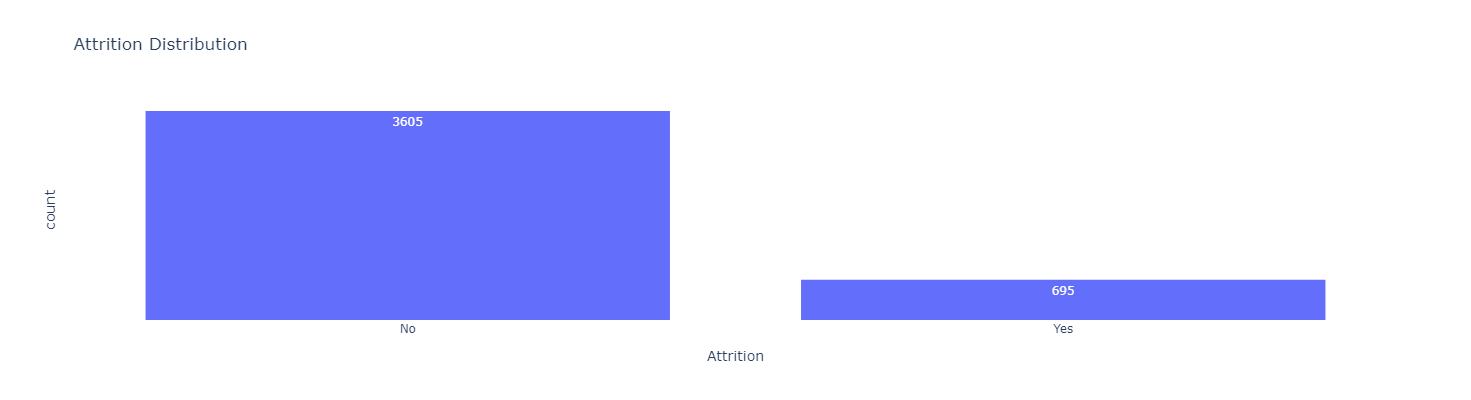

In [33]:
# Attrition
fig = px.histogram(df_final, x = 'Attrition', title = 'Attrition Distribution', text_auto = True, width = 400, height = 400)

# Updating layout to reduce clutter
fig.update_layout(yaxis = dict(showgrid = False, zeroline = False, showline = False, showticklabels = False), autosize = True, plot_bgcolor = 'white')

# Showing figure
fig.show()

In [34]:
# BusinessTravel
df_final.BusinessTravel.value_counts(normalize = True)

Travel_Rarely       0.710
Travel_Frequently   0.188
Non-Travel          0.102
Name: BusinessTravel, dtype: float64

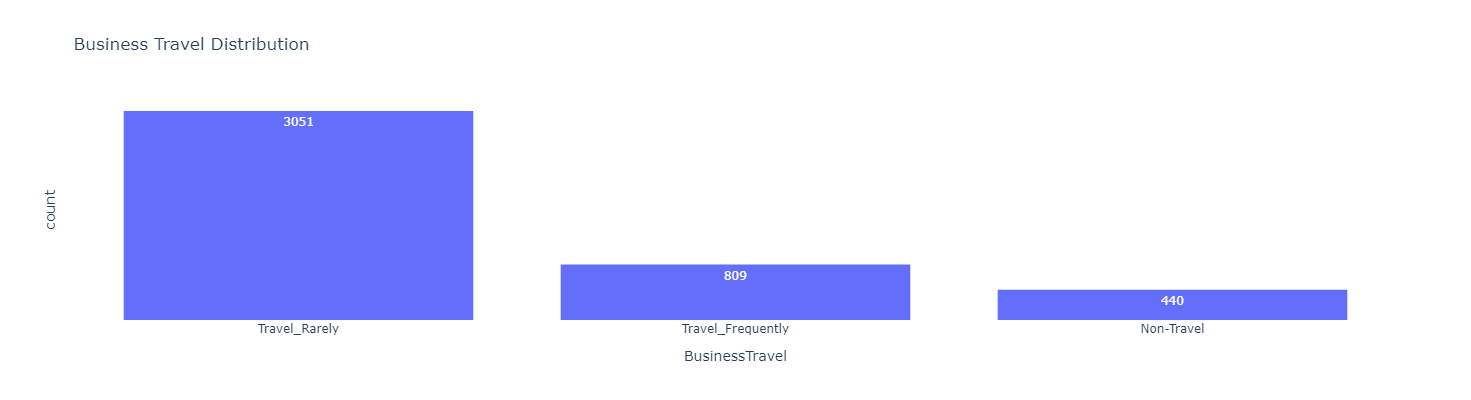

In [35]:
# BusinessTravel
fig = px.histogram(df_final, x = 'BusinessTravel', title = 'Business Travel Distribution', text_auto = True, width = 400, height = 400)

# Updating layout to reduce clutter
fig.update_layout(yaxis = dict(showgrid = False, zeroline = False, showline = False, showticklabels = False), autosize = True, plot_bgcolor = 'white')

# Showing figure
fig.show()

In [36]:
# Department
df_final.Department.value_counts(normalize = True)

Research & Development   0.653
Sales                    0.304
Human Resources          0.043
Name: Department, dtype: float64

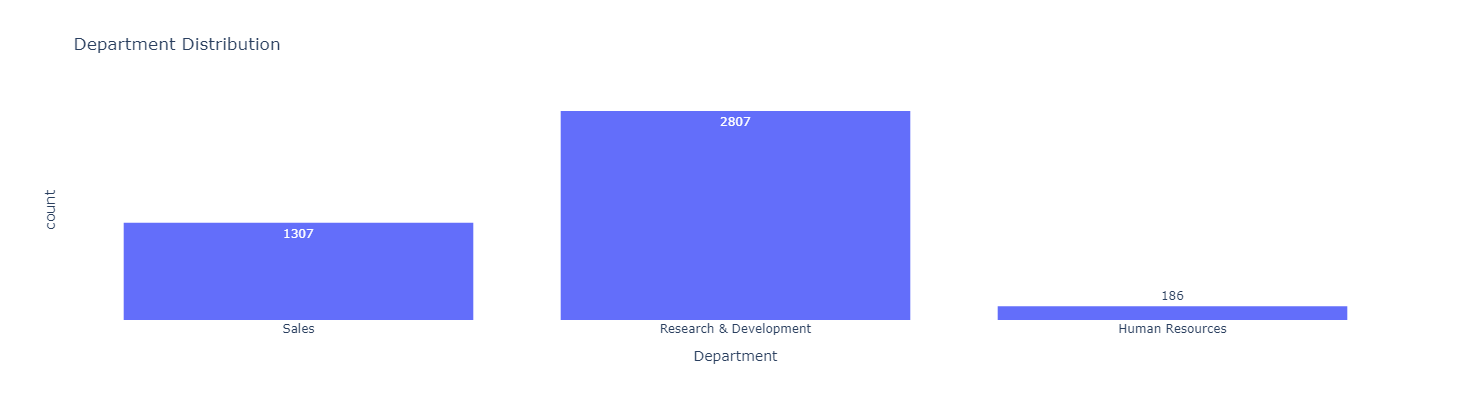

In [37]:
# Department
fig = px.histogram(df_final, x = 'Department', title = 'Department Distribution', text_auto = True, width = 400, height = 400)

# Updating layout to reduce clutter
fig.update_layout(yaxis = dict(showgrid = False, zeroline = False, showline = False, showticklabels = False), autosize = True, plot_bgcolor = 'white')

# Showing figure
fig.show()

In [38]:
# Education
df_final.Education.value_counts(normalize = True)

Bachelor        0.388
Master          0.272
College         0.191
Below College   0.116
Doctor          0.033
Name: Education, dtype: float64

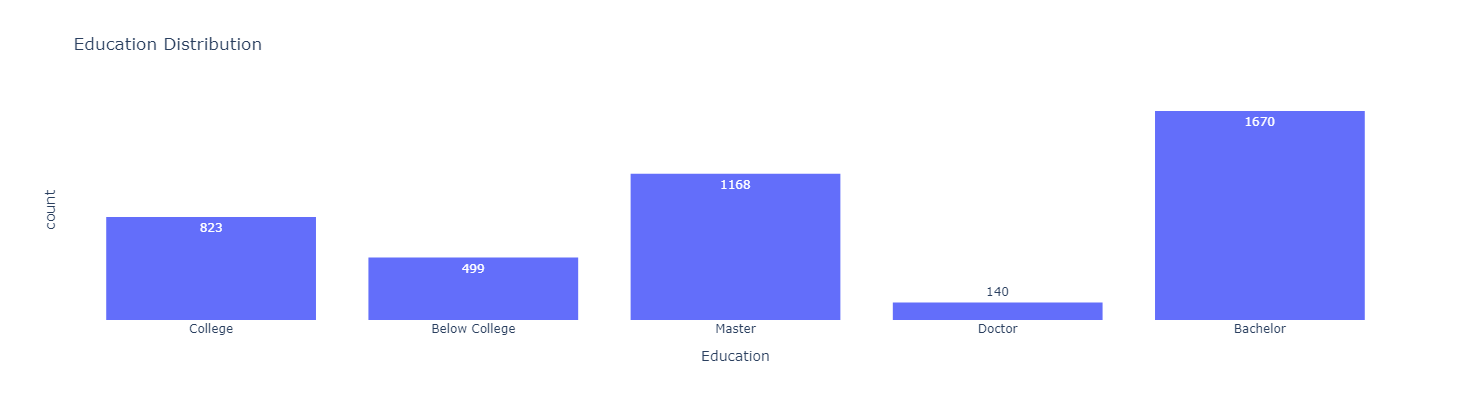

In [39]:
# Education
fig = px.histogram(df_final, x = 'Education', title = 'Education Distribution', text_auto = True, width = 400, height = 400)

# Updating layout to reduce clutter
fig.update_layout(yaxis = dict(showgrid = False, zeroline = False, showline = False, showticklabels = False), autosize = True, plot_bgcolor = 'white')

# Showing figure
fig.show()

In [40]:
# EducationField
df_final.EducationField.value_counts(normalize = True)

Life Sciences      0.411
Medical            0.317
Marketing          0.109
Technical Degree   0.089
Other              0.055
Human Resources    0.019
Name: EducationField, dtype: float64

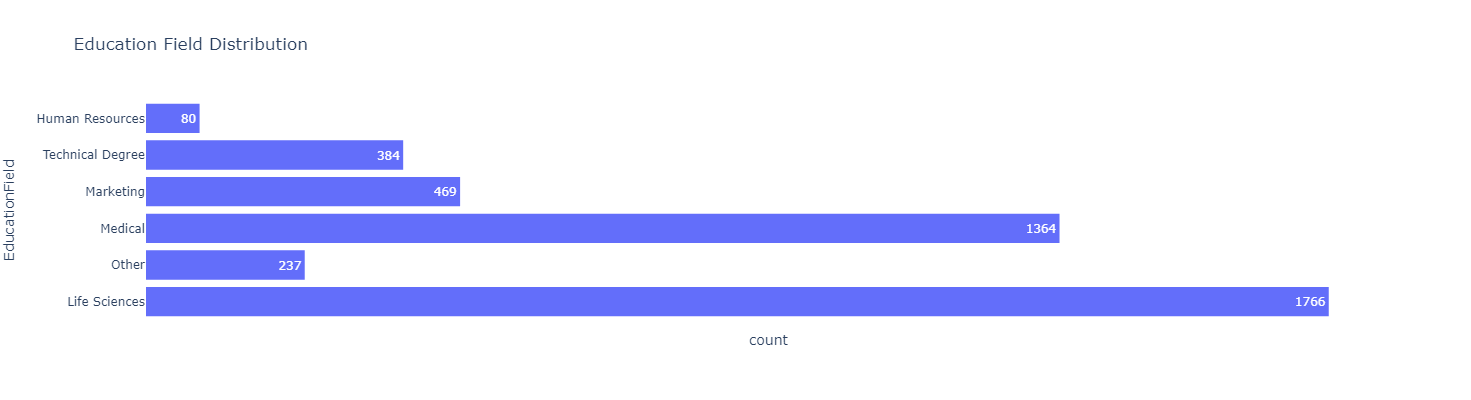

In [41]:
# EducationField
fig = px.histogram(df_final, y = 'EducationField', title = 'Education Field Distribution', text_auto = True, width = 400, height = 400)

# Updating layout to reduce clutter
fig.update_layout(yaxis = dict(showgrid = False, zeroline = False, showline = False, showticklabels = True), 
                  xaxis = dict(showticklabels = False), autosize = True, plot_bgcolor = 'white')

# Showing figure
fig.show()

In [42]:
# Gender
df_final.Gender.value_counts(normalize = True)

Male     0.598
Female   0.402
Name: Gender, dtype: float64

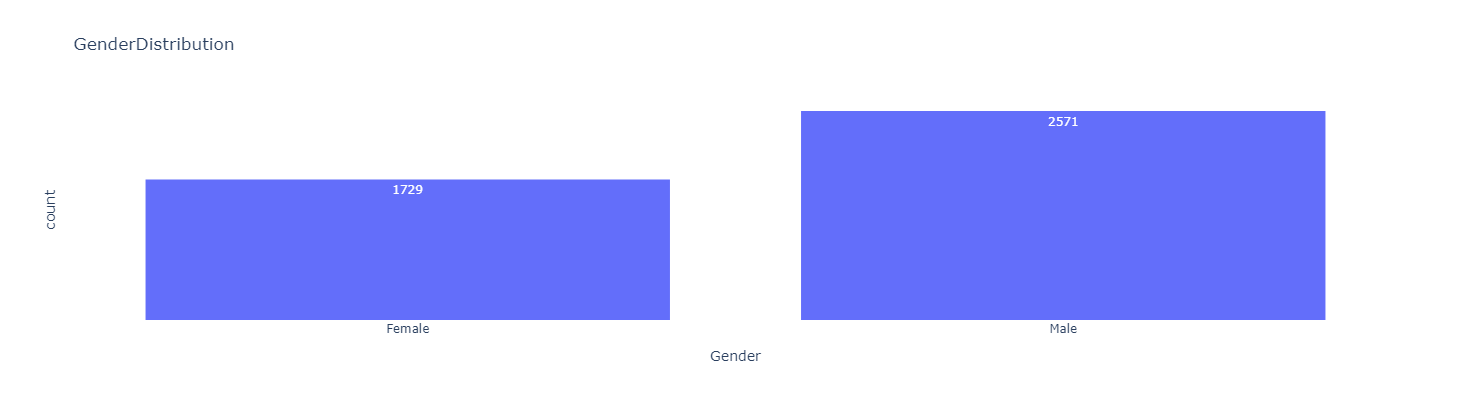

In [43]:
# Gender
fig = px.histogram(df_final, x = 'Gender', title = 'GenderDistribution', text_auto = True, width = 400, height = 400)

# Updating layout to reduce clutter
fig.update_layout(yaxis = dict(showgrid = False, zeroline = False, showline = False, showticklabels = False), autosize = True, plot_bgcolor = 'white')

# Showing figure
fig.show()

In [44]:
# JobRole
df_final.JobRole.value_counts(normalize = True)

Sales Executive             0.222
Research Scientist          0.200
Laboratory Technician       0.176
Manufacturing Director      0.098
Healthcare Representative   0.088
Manager                     0.070
Sales Representative        0.056
Research Director           0.055
Human Resources             0.036
Name: JobRole, dtype: float64

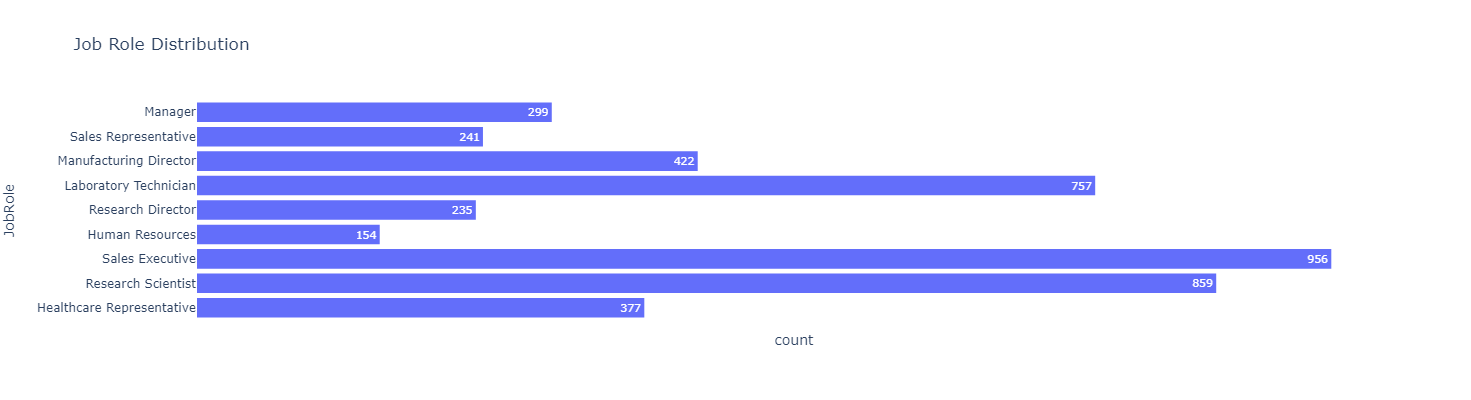

In [45]:
# JobRole
fig = px.histogram(df_final, y = 'JobRole', title = 'Job Role Distribution', text_auto = True, width = 400, height = 400)

# Updating layout to reduce clutter
fig.update_layout(yaxis = dict(showgrid = False, zeroline = False, showline = False, showticklabels = True), 
                  xaxis = dict(showticklabels = False), autosize = True, plot_bgcolor = 'white')

# Showing figure
fig.show()

In [46]:
# MaritalStatus
df_final.MaritalStatus.value_counts(normalize = True)

Married    0.458
Single     0.321
Divorced   0.221
Name: MaritalStatus, dtype: float64

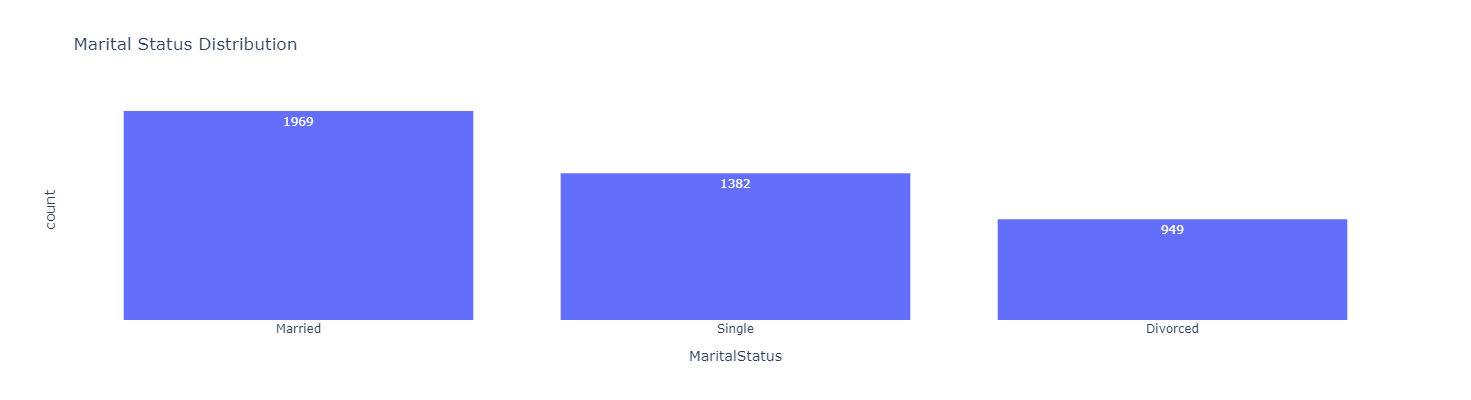

In [47]:
# MaritalStatus
fig = px.histogram(df_final, x = 'MaritalStatus', title = 'Marital Status Distribution', text_auto = True, width = 400, height = 400)

# Updating layout to reduce clutter
fig.update_layout(yaxis = dict(showgrid = False, zeroline = False, showline = False, showticklabels = False), autosize = True, plot_bgcolor = 'white')

# Showing figure
fig.show()

In [48]:
# EnvironmentSatisfaction
df_final.EnvironmentSatisfaction.value_counts(normalize = True)

High        0.307
Very High   0.305
Medium      0.195
Low         0.193
Name: EnvironmentSatisfaction, dtype: float64

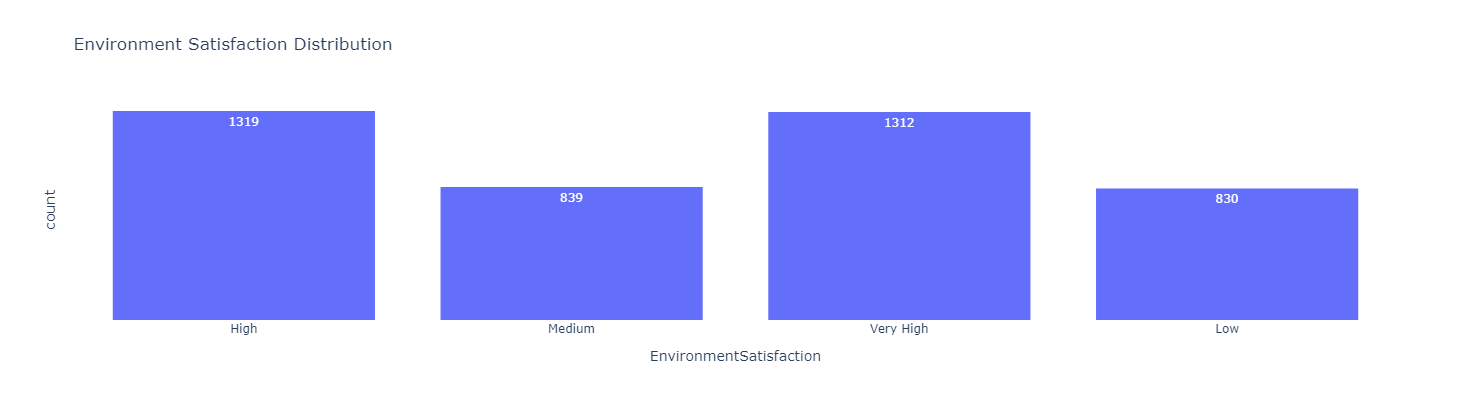

In [49]:
# EnvironmentSatisfaction
fig = px.histogram(df_final, x = 'EnvironmentSatisfaction', title = 'Environment Satisfaction Distribution', text_auto = True, width = 400, height = 400)

# Updating layout to reduce clutter
fig.update_layout(yaxis = dict(showgrid = False, zeroline = False, showline = False, showticklabels = False), autosize = True, plot_bgcolor = 'white')

# Showing figure
fig.show()

In [50]:
# EnvironmentSatisfaction
df_final.JobSatisfaction.value_counts(normalize = True)

Very High   0.310
High        0.301
Low         0.197
Medium      0.191
Name: JobSatisfaction, dtype: float64

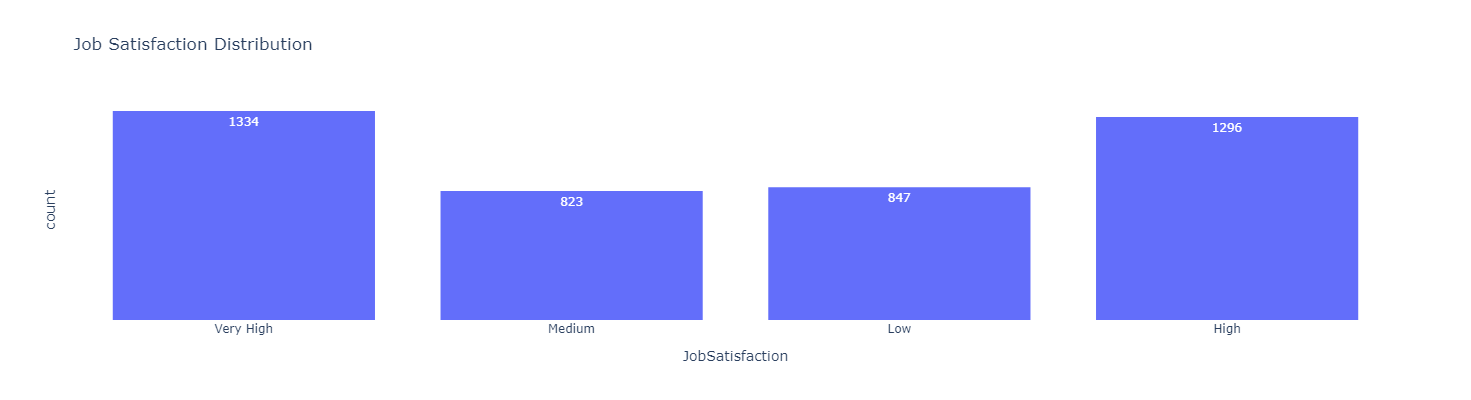

In [51]:
# JobSatisfaction
fig = px.histogram(df_final, x = 'JobSatisfaction', title = 'Job Satisfaction Distribution', text_auto = True, width = 400, height = 400)

# Updating layout to reduce clutter
fig.update_layout(yaxis = dict(showgrid = False, zeroline = False, showline = False, showticklabels = False), autosize = True, plot_bgcolor = 'white')

# Showing figure
fig.show()

In [52]:
# WorkLifeBalance
df_final.WorkLifeBalance.value_counts(normalize = True)

Better   0.607
Good     0.234
Best     0.105
Bad      0.055
Name: WorkLifeBalance, dtype: float64

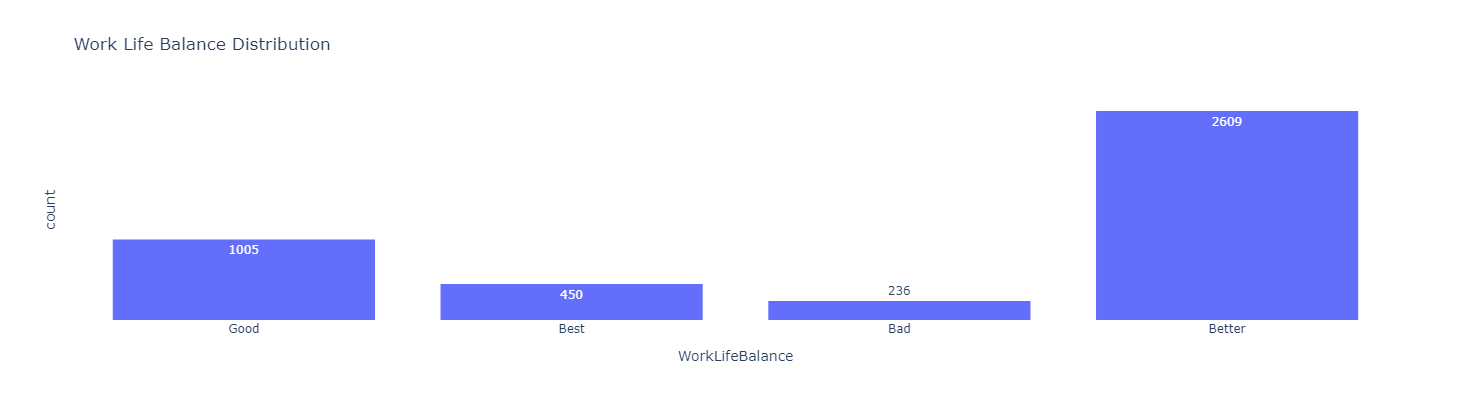

In [53]:
# WorkLifeBalance
fig = px.histogram(df_final, x = 'WorkLifeBalance', title = 'Work Life Balance Distribution', text_auto = True, width = 400, height = 400)

# Updating layout to reduce clutter
fig.update_layout(yaxis = dict(showgrid = False, zeroline = False, showline = False, showticklabels = False), autosize = True, plot_bgcolor = 'white')

# Showing figure
fig.show()

In [54]:
# JobInvolvement
df_final.JobInvolvement.value_counts(normalize = True)

High        0.590
Medium      0.257
Very High   0.098
Low         0.056
Name: JobInvolvement, dtype: float64

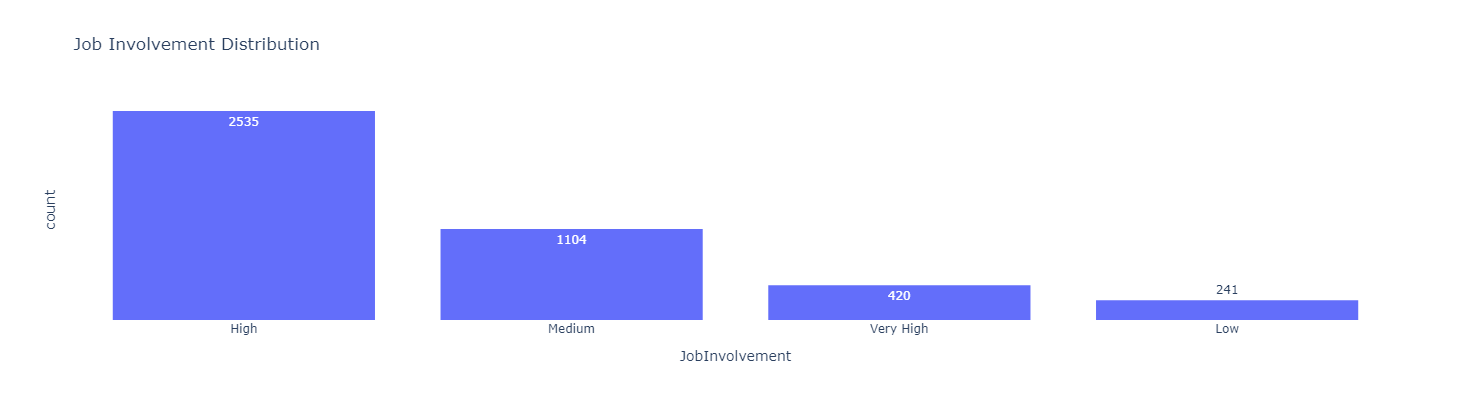

In [55]:
# JobInvolvement
fig = px.histogram(df_final, x = 'JobInvolvement', title = 'Job Involvement Distribution', text_auto = True, width = 400, height = 400)

# Updating layout to reduce clutter
fig.update_layout(yaxis = dict(showgrid = False, zeroline = False, showline = False, showticklabels = False), autosize = True, plot_bgcolor = 'white')

# Showing figure
fig.show()

In [56]:
# PerformanceRating
df_final.PerformanceRating.value_counts(normalize = True)

Excellent     0.846
Outstanding   0.154
Name: PerformanceRating, dtype: float64

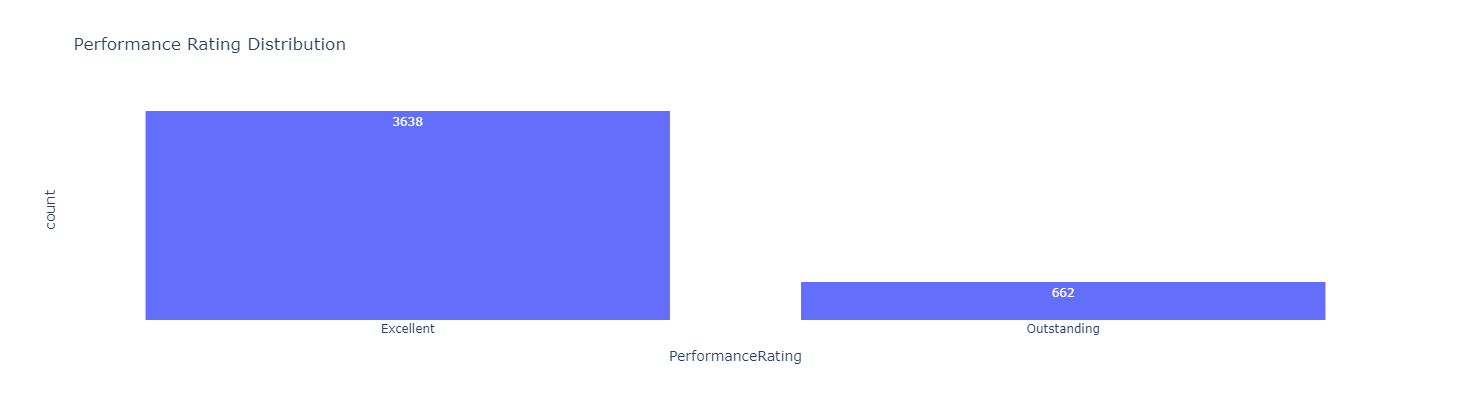

In [57]:
# PerformanceRating
fig = px.histogram(df_final, x = 'PerformanceRating', title = 'Performance Rating Distribution', text_auto = True, width = 400, height = 400)

# Updating layout to reduce clutter
fig.update_layout(yaxis = dict(showgrid = False, zeroline = False, showline = False, showticklabels = False), autosize = True, plot_bgcolor = 'white')

# Showing figure
fig.show()

### [7.2 Bivariate analysis](#0) <a class=anchor id=8.2></a>

Bivariate analysis is a kind of statistical analysis when two variables are observed against each other. The changes are analyzed between the two variables to understand to what extent the change has occurred. In this case, the relationships between attrition and other factors are examined.

Choosing the right visualization depends on the variables being visualized. In this case, a transformation on attrition is necessary to make it more convenient to visualize the relationships between attrition and other factors.

In [58]:
# Categorical variables
df_categorical

['Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'EnvironmentSatisfaction',
 'JobSatisfaction',
 'WorkLifeBalance',
 'JobInvolvement',
 'PerformanceRating']

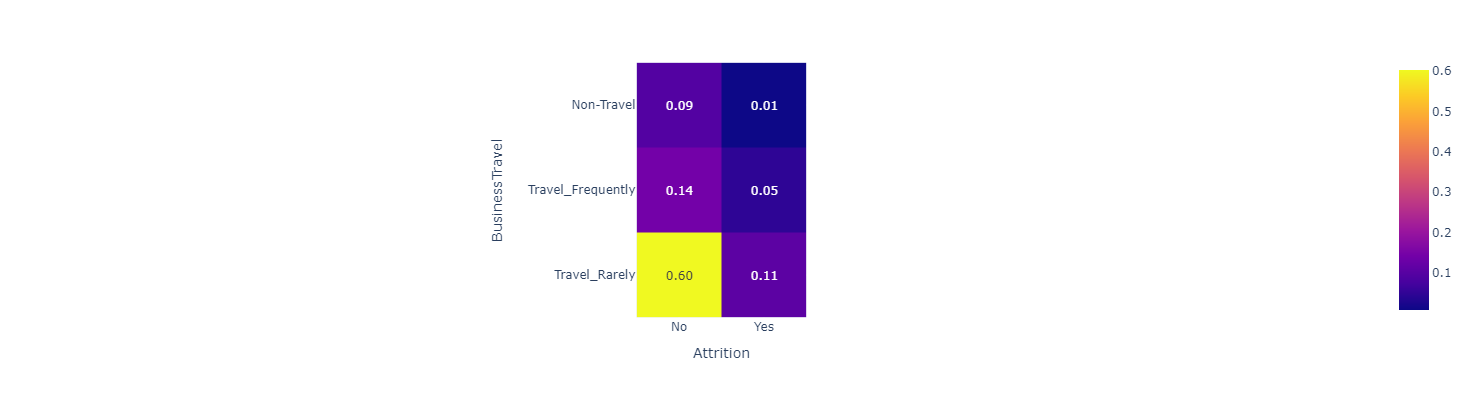

In [59]:
# Attrition vs BusinessTravel
df_tab_BT = pd.crosstab(df_final.BusinessTravel, df_final.Attrition, normalize = True)

# heatmap
fig = px.imshow(df_tab_BT, text_auto = '.2f', width = 400, height = 400)
fig.show()

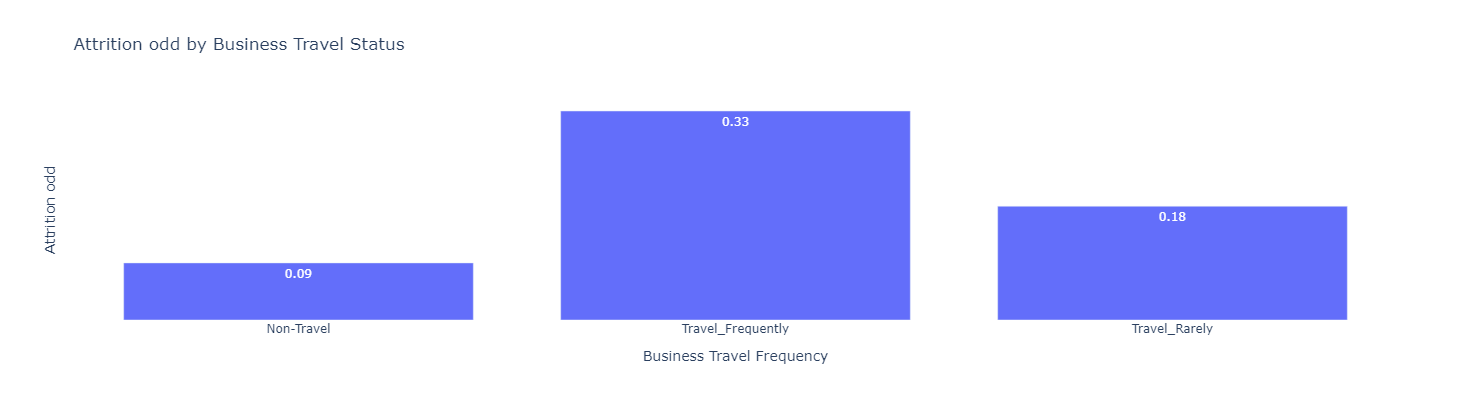

In [60]:
# Attrition odds for BusinessTravel
df_odd_BT = df_tab_BT['Yes'] / df_tab_BT['No']

# Visualizing Attrition odds
fig = px.bar(y = df_odd_BT, 
             x = df_odd_BT.index,
             text_auto = '.2f',
             title = 'Attrition odd by Business Travel Status',
             labels = {'y': 'Attrition odd', 'x': 'Business Travel Frequency'},
             width = 400,
             height = 400)

# Updating layout to reduce clutter
fig.update_layout(yaxis = dict(showgrid = False, zeroline = False, showline = False, showticklabels = False), autosize = True, plot_bgcolor = 'white')

# Showing figure
fig.show()

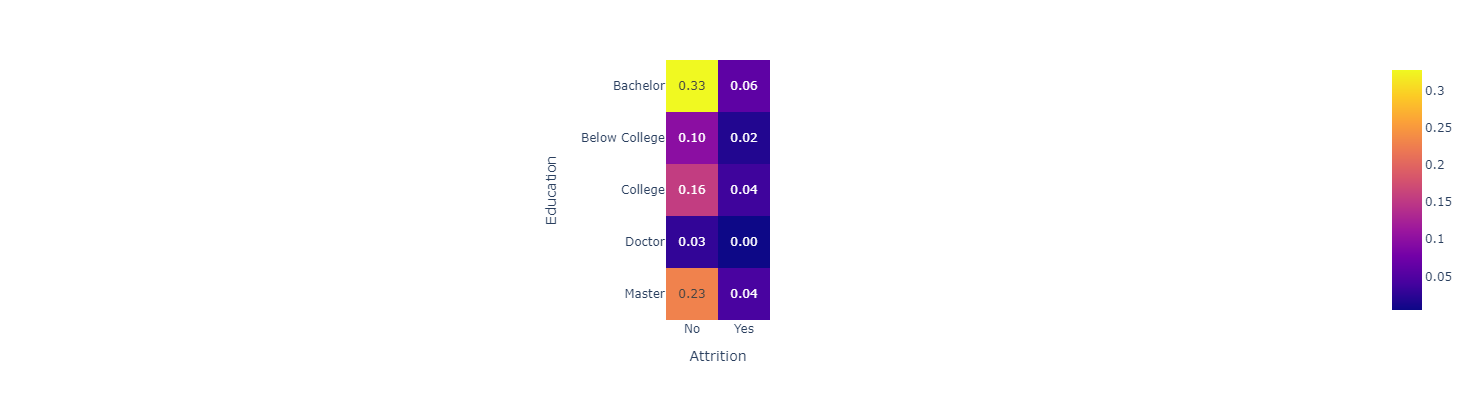

In [61]:
# Attrition vs Education
df_tab_E = pd.crosstab(df_final.Education, df_final.Attrition, normalize = True)

# heatmap
fig = px.imshow(df_tab_E, text_auto = '.2f', width = 400, height = 400)
fig.show()

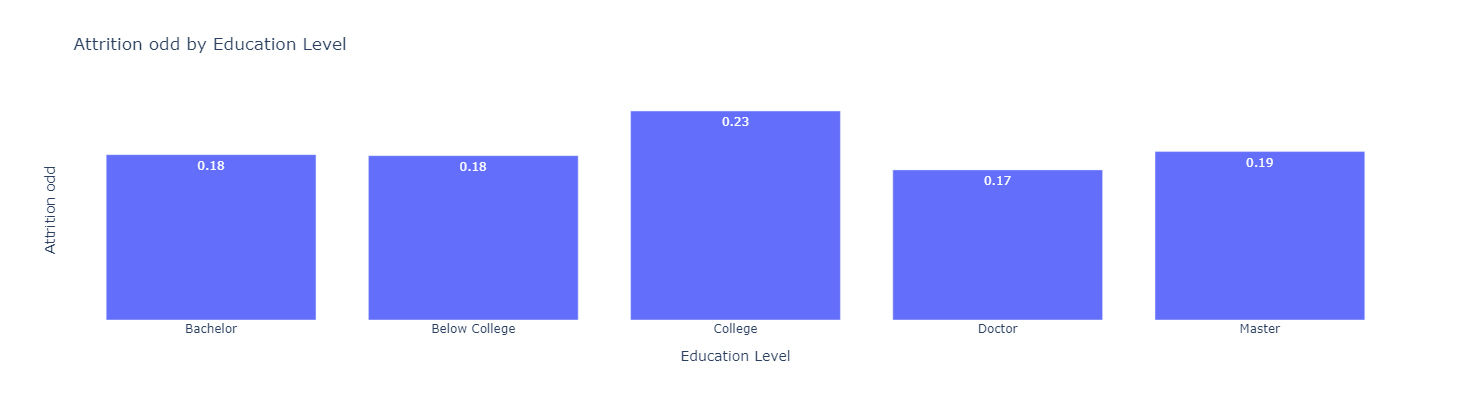

In [62]:
# Attrition odds for Education
df_odd_E = df_tab_E['Yes'] / df_tab_E['No']

# Visualizing Attrition odds
fig = px.bar(y = df_odd_E, 
             x = df_odd_E.index,
             text_auto = '.2f',
             title = 'Attrition odd by Education Level',
             labels = {'y': 'Attrition odd', 'x': 'Education Level'},
             width = 400,
             height = 400)

# Updating layout to reduce clutter
fig.update_layout(yaxis = dict(showgrid = False, zeroline = False, showline = False, showticklabels = False), autosize = True, plot_bgcolor = 'white')

# Showing figure
fig.show()

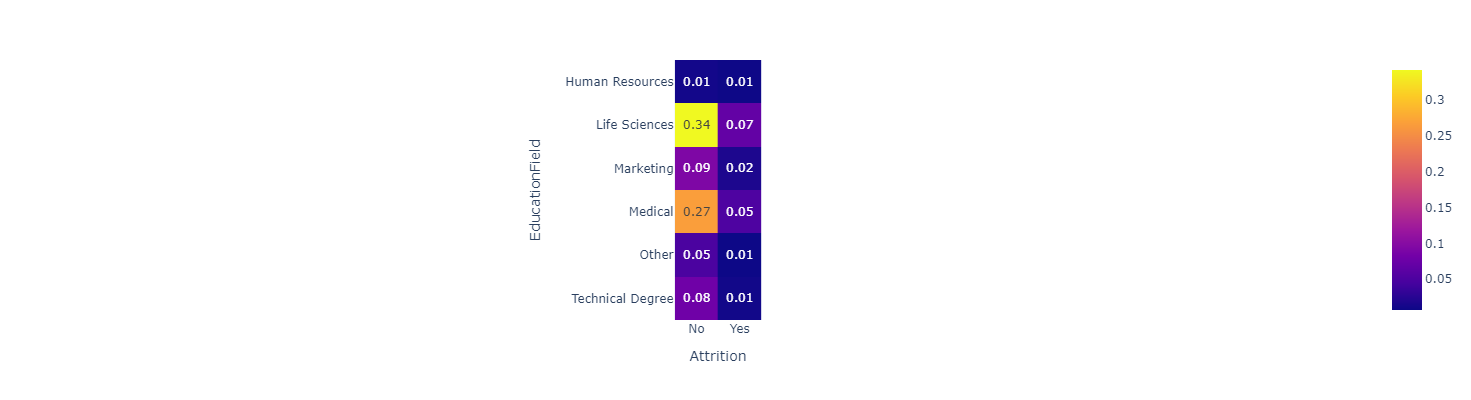

In [63]:
# Attrition vs EducationField
df_tab_EF = pd.crosstab(df_final.EducationField, df_final.Attrition, normalize = True)

# heatmap
fig = px.imshow(df_tab_EF, text_auto = '.2f', width = 400, height = 400)
fig.show()

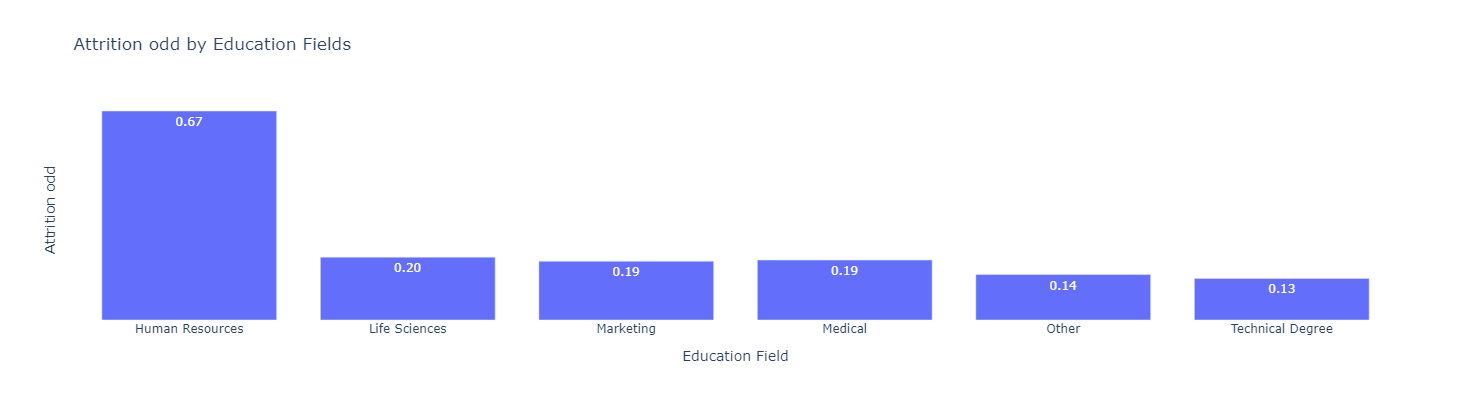

In [64]:
# Attrition odds for EducationField
df_odd_EF = df_tab_EF['Yes'] / df_tab_EF['No']

# Visualizing Attrition odds
fig = px.bar(y = df_odd_EF, 
             x = df_odd_EF.index,
             text_auto = '.2f',
             title = 'Attrition odd by Education Fields',
             labels = {'y': 'Attrition odd', 'x': 'Education Field'},
             width = 400,
             height = 400)

# Updating layout to reduce clutter
fig.update_layout(yaxis = dict(showgrid = False, zeroline = False, showline = False, showticklabels = False), autosize = True, plot_bgcolor = 'white')

# Showing figure
fig.show()

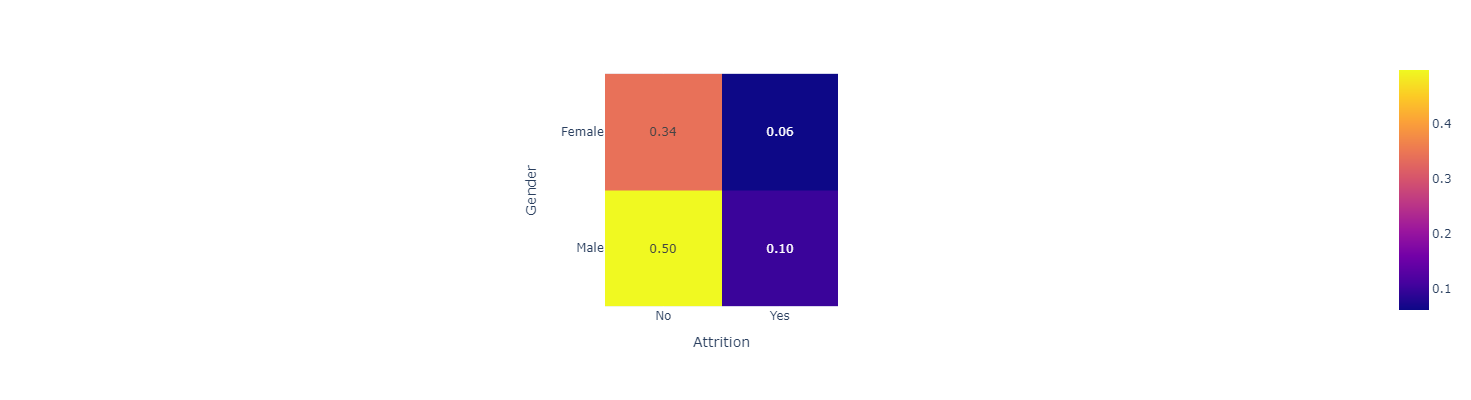

In [65]:
# Attrition vs Gender
df_tab_G = pd.crosstab(df_final.Gender, df_final.Attrition, normalize = True)

# heatmap
fig = px.imshow(df_tab_G, text_auto = '.2f', width = 400, height = 400)
fig.show()

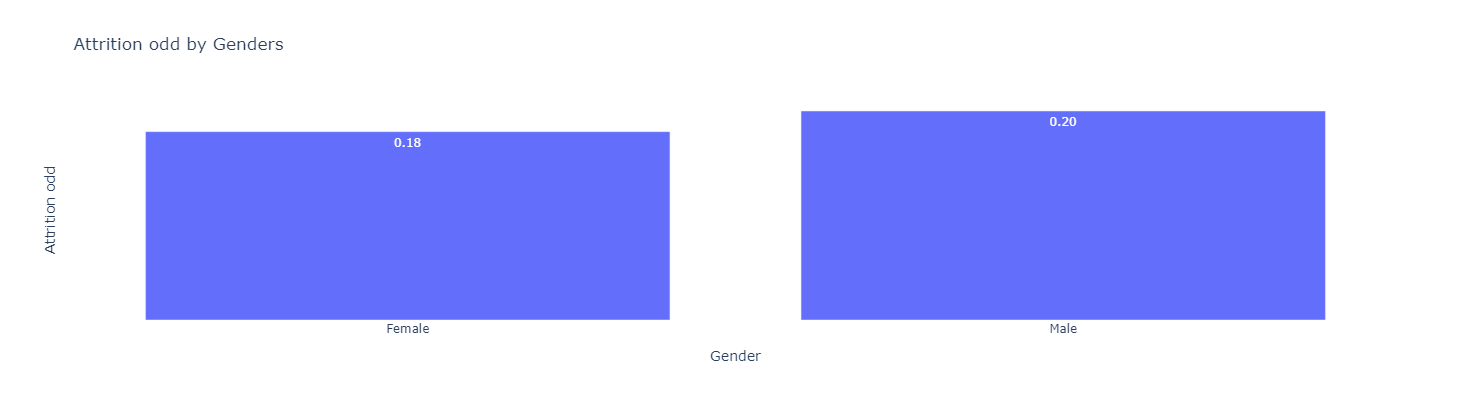

In [66]:
# Attrition odds for Gender
df_odd_G = df_tab_G['Yes'] / df_tab_G['No']

# Visualizing Attrition odds
fig = px.bar(y = df_odd_G, 
             x = df_odd_G.index,
             text_auto = '.2f',
             title = 'Attrition odd by Genders',
             labels = {'y': 'Attrition odd', 'x': 'Gender'},
             width = 400,
             height = 400)

# Updating layout to reduce clutter
fig.update_layout(yaxis = dict(showgrid = False, zeroline = False, showline = False, showticklabels = False), autosize = True, plot_bgcolor = 'white')

# Showing figure
fig.show()

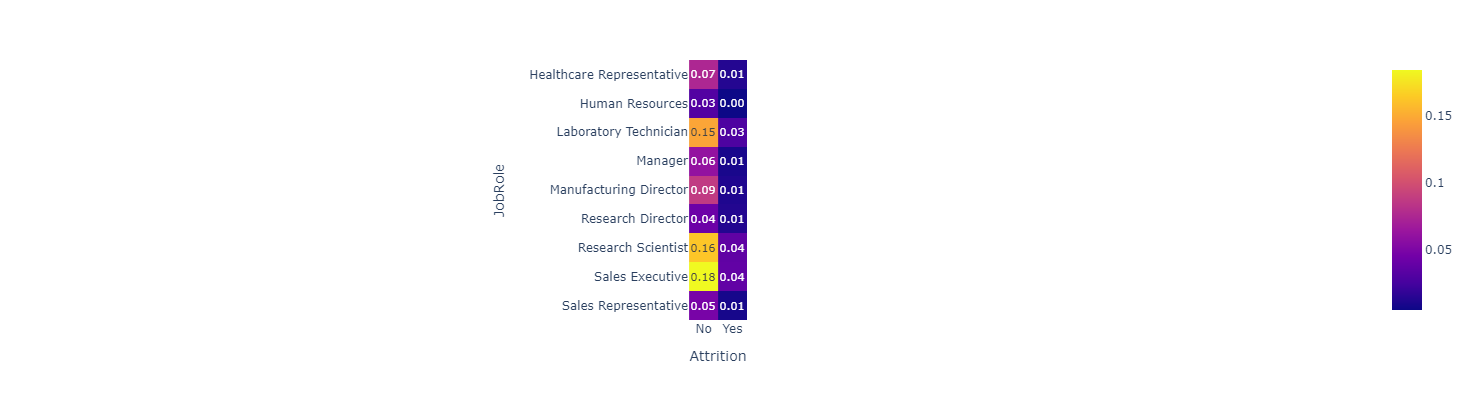

In [67]:
# Attrition vs JobRole
df_tab_JR = pd.crosstab(df_final.JobRole, df_final.Attrition, normalize = True)

# heatmap
fig = px.imshow(df_tab_JR, text_auto = '.2f', width = 400, height = 400)
fig.show()

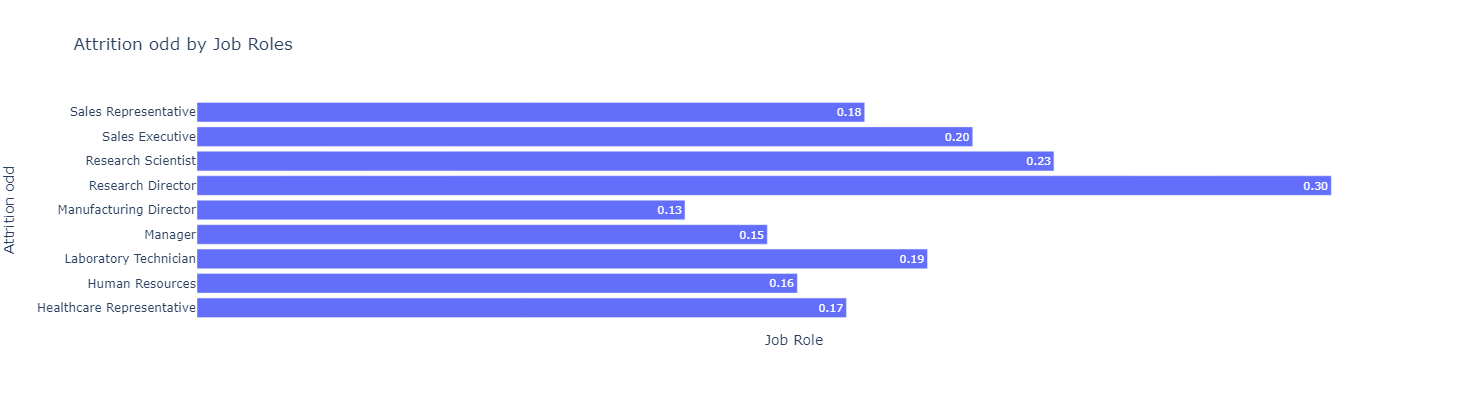

In [68]:
# Attrition odds for JobRole
df_odd_JR = df_tab_JR['Yes'] / df_tab_JR['No']

# Visualizing Attrition odds
fig = px.bar(x = df_odd_JR, 
             y = df_odd_JR.index,
             text_auto = '.2f',
             title = 'Attrition odd by Job Roles',
             labels = {'y': 'Attrition odd', 'x': 'Job Role'},
             width = 600,
             height = 400)

# Updating layout to reduce clutter
fig.update_layout(yaxis = dict(showgrid = False, zeroline = False, showline = False, showticklabels = True), 
                  xaxis = dict(showticklabels = False), 
                  autosize = True, 
                  plot_bgcolor = 'white')

# Showing figure
fig.show()

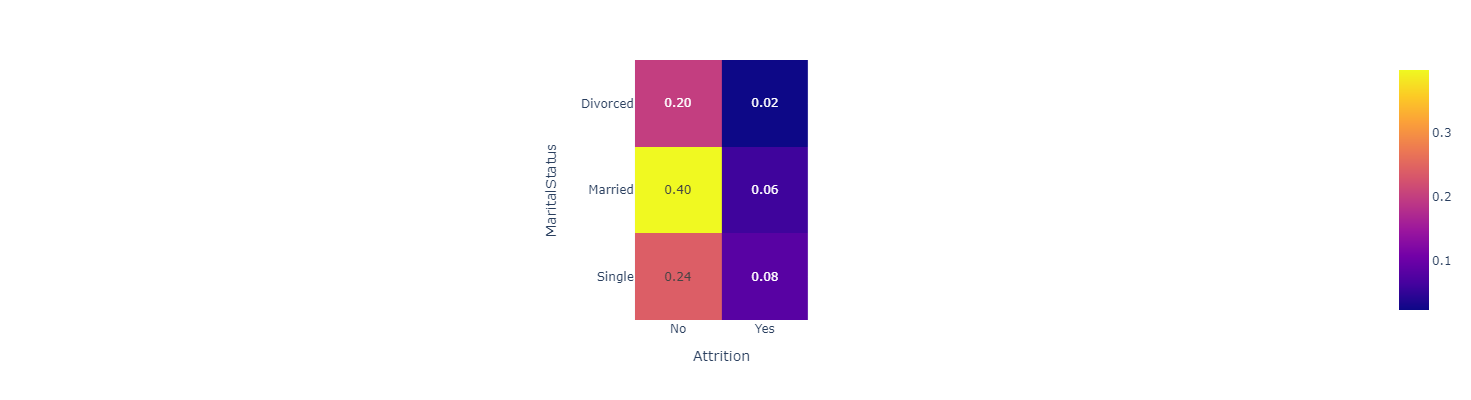

In [69]:
# Attrition vs MaritalStatus
df_tab_MS = pd.crosstab(df_final.MaritalStatus, df_final.Attrition, normalize = True)

# heatmap
fig = px.imshow(df_tab_MS, text_auto = '.2f', width = 400, height = 400)
fig.show()

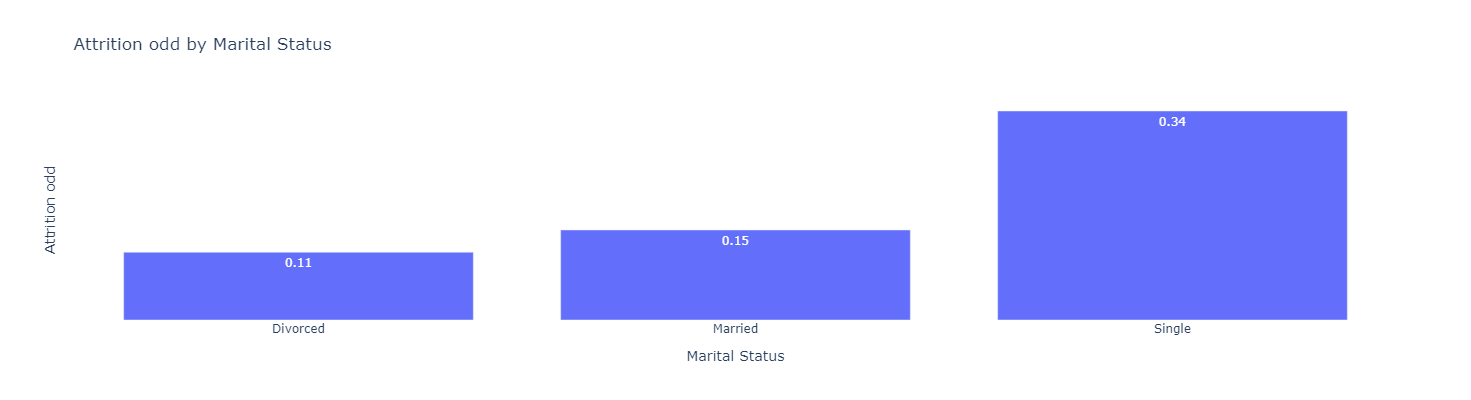

In [70]:
# Attrition odds for MaritalStatus
df_odd_MS = df_tab_MS['Yes'] / df_tab_MS['No']

# Visualizing Attrition odds
fig = px.bar(y = df_odd_MS, 
             x = df_odd_MS.index,
             text_auto = '.2f',
             title = 'Attrition odd by Marital Status',
             labels = {'y': 'Attrition odd', 'x': 'Marital Status'},
             width = 400,
             height = 400)

# Updating layout to reduce clutter
fig.update_layout(yaxis = dict(showgrid = False, zeroline = False, showline = False, showticklabels = False), autosize = True, plot_bgcolor = 'white')

# Showing figure
fig.show()

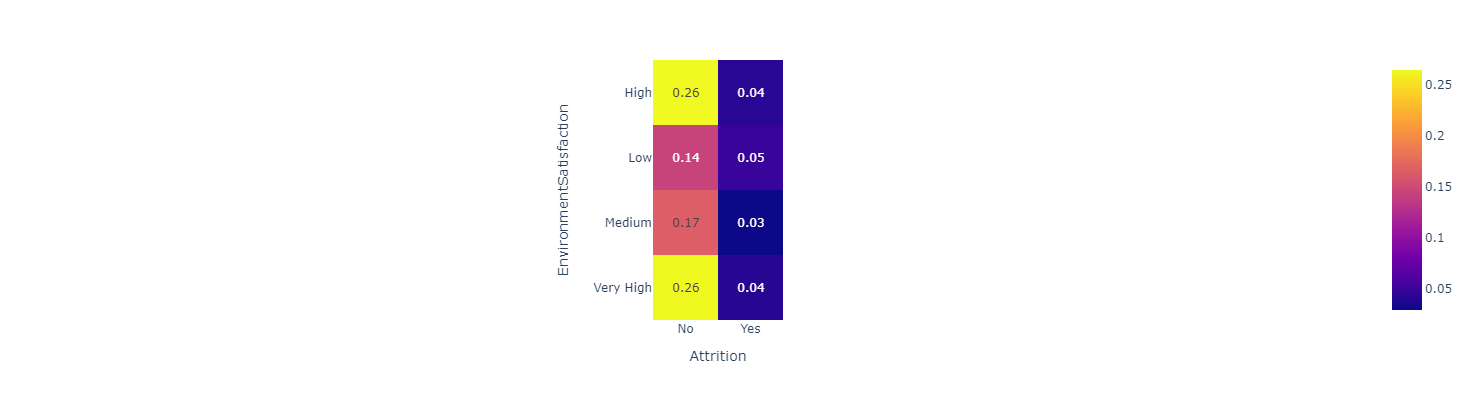

In [71]:
# Attrition vs EnvironmentSatisfaction
df_tab_ES = pd.crosstab(df_final.EnvironmentSatisfaction, df_final.Attrition, normalize = True)

# heatmap
fig = px.imshow(df_tab_ES, text_auto = '.2f', width = 400, height = 400)
fig.show()

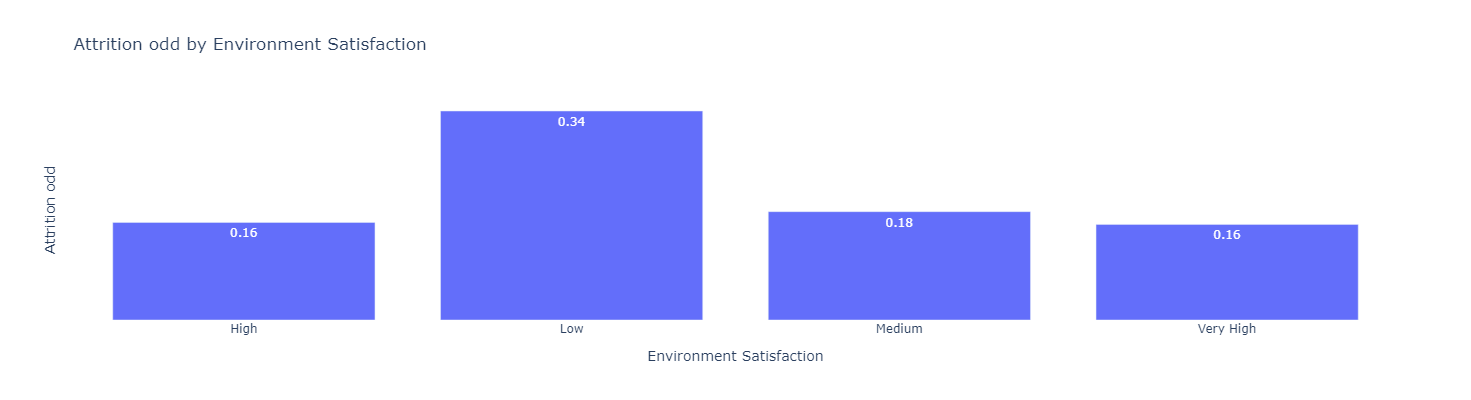

In [72]:
# Attrition odds for EnvironmentSatisfaction
df_odd_ES = df_tab_ES['Yes'] / df_tab_ES['No']

# Visualizing Attrition odds
fig = px.bar(y = df_odd_ES, 
             x = df_odd_ES.index,
             text_auto = '.2f',
             title = 'Attrition odd by Environment Satisfaction',
             labels = {'y': 'Attrition odd', 'x': 'Environment Satisfaction'},
             width = 400,
             height = 400)

# Updating layout to reduce clutter
fig.update_layout(yaxis = dict(showgrid = False, zeroline = False, showline = False, showticklabels = False), autosize = True, plot_bgcolor = 'white')

# Showing figure
fig.show()

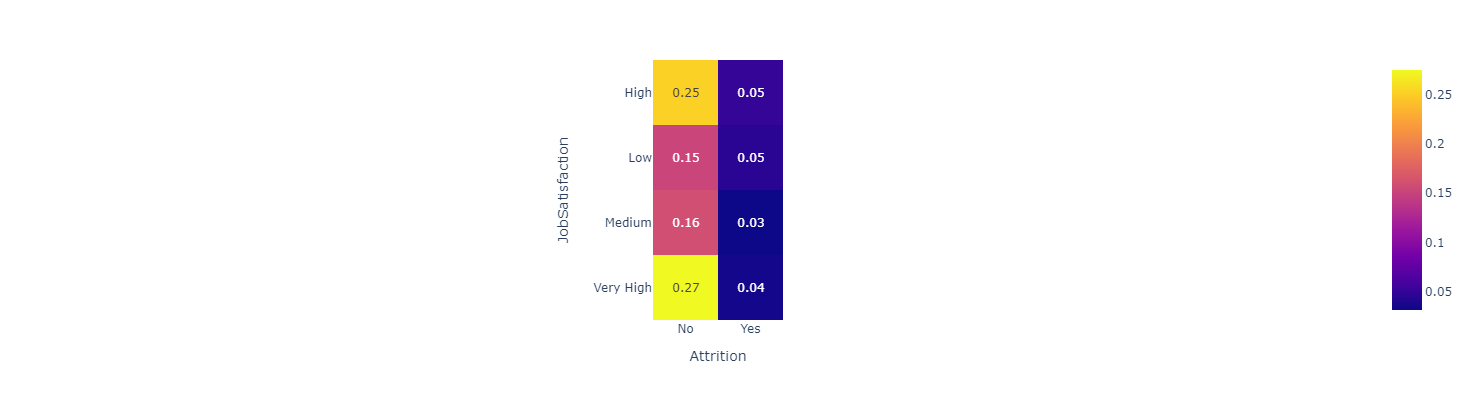

In [73]:
# Attrition vs JobSatisfaction
df_tab_JS = pd.crosstab(df_final.JobSatisfaction, df_final.Attrition, normalize = True)

# heatmap
fig = px.imshow(df_tab_JS, text_auto = '.2f', width = 400, height = 400)
fig.show()

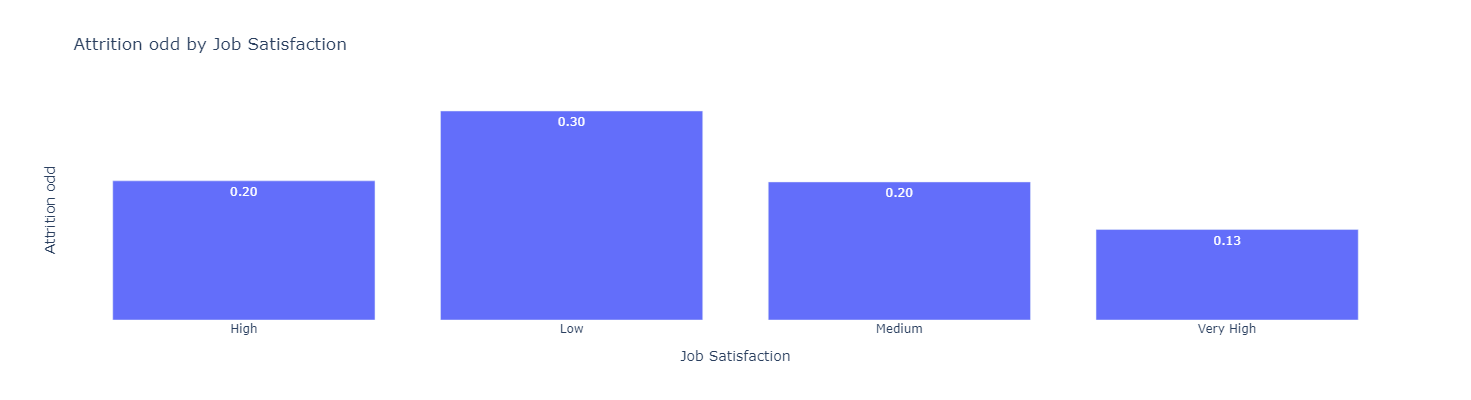

In [74]:
# Attrition odds for JobSatisfaction
df_odd_JS = df_tab_JS['Yes'] / df_tab_JS['No']

# Visualizing Attrition odds
fig = px.bar(y = df_odd_JS, 
             x = df_odd_JS.index,
             text_auto = '.2f',
             title = 'Attrition odd by Job Satisfaction',
             labels = {'y': 'Attrition odd', 'x': 'Job Satisfaction'},
             width = 400,
             height = 400)

# Updating layout to reduce clutter
fig.update_layout(yaxis = dict(showgrid = False, zeroline = False, showline = False, showticklabels = False), autosize = True, plot_bgcolor = 'white')

# Showing figure
fig.show()

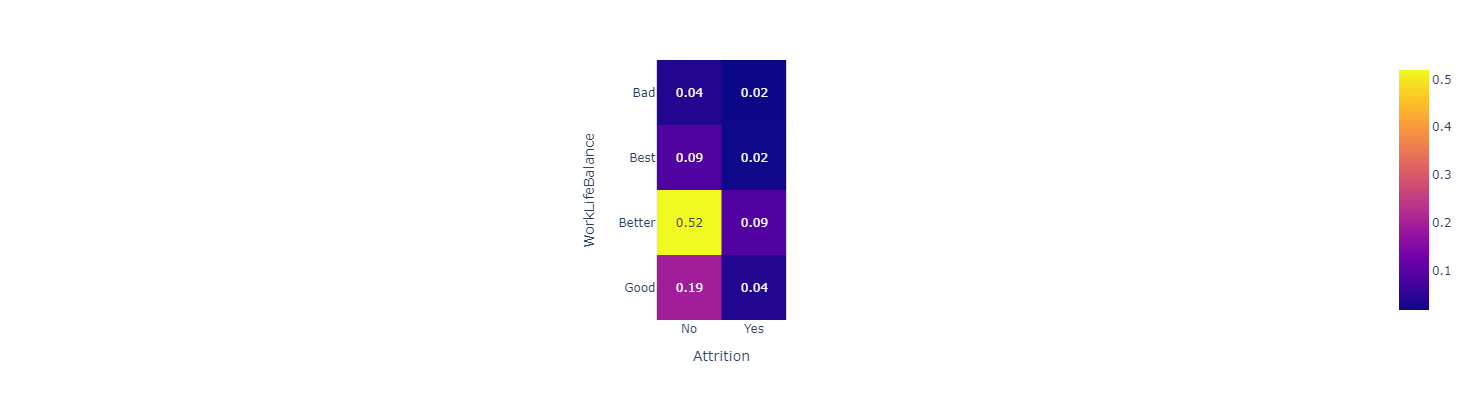

In [75]:
# Attrition vs WorkLifeBalance
df_tab_WLB = pd.crosstab(df_final.WorkLifeBalance, df_final.Attrition, normalize = True)

# heatmap
fig = px.imshow(df_tab_WLB, text_auto = '.2f', width = 400, height = 400)
fig.show()

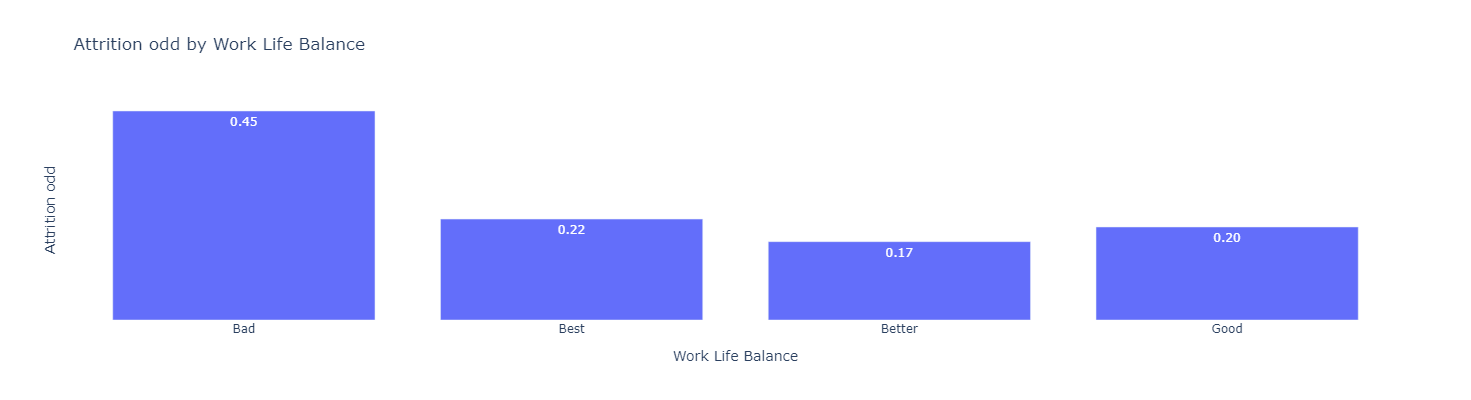

In [76]:
# Attrition odds for WorkLifeBalance
df_odd_WLB = df_tab_WLB['Yes'] / df_tab_WLB['No']

# Visualizing Attrition odds
fig = px.bar(y = df_odd_WLB, 
             x = df_odd_WLB.index,
             text_auto = '.2f',
             title = 'Attrition odd by Work Life Balance',
             labels = {'y': 'Attrition odd', 'x': 'Work Life Balance'},
             width = 400,
             height = 400)

# Updating layout to reduce clutter
fig.update_layout(yaxis = dict(showgrid = False, zeroline = False, showline = False, showticklabels = False), autosize = True, plot_bgcolor = 'white')

# Showing figure
fig.show()

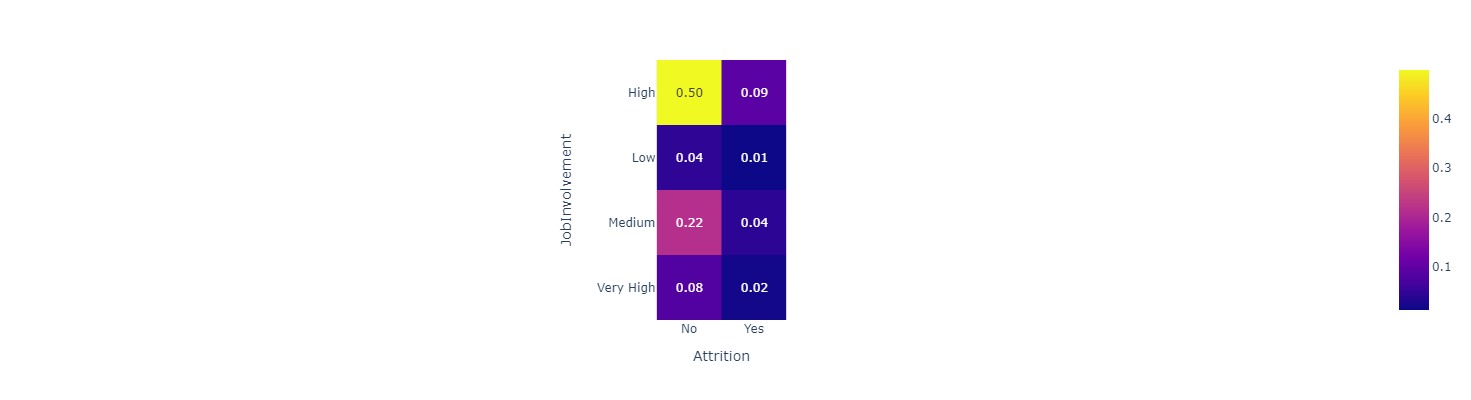

In [77]:
# Attrition vs JobInvolvement
df_tab_JI = pd.crosstab(df_final.JobInvolvement, df_final.Attrition, normalize = True)

# heatmap
fig = px.imshow(df_tab_JI, text_auto = '.2f', width = 400, height = 400)
fig.show()

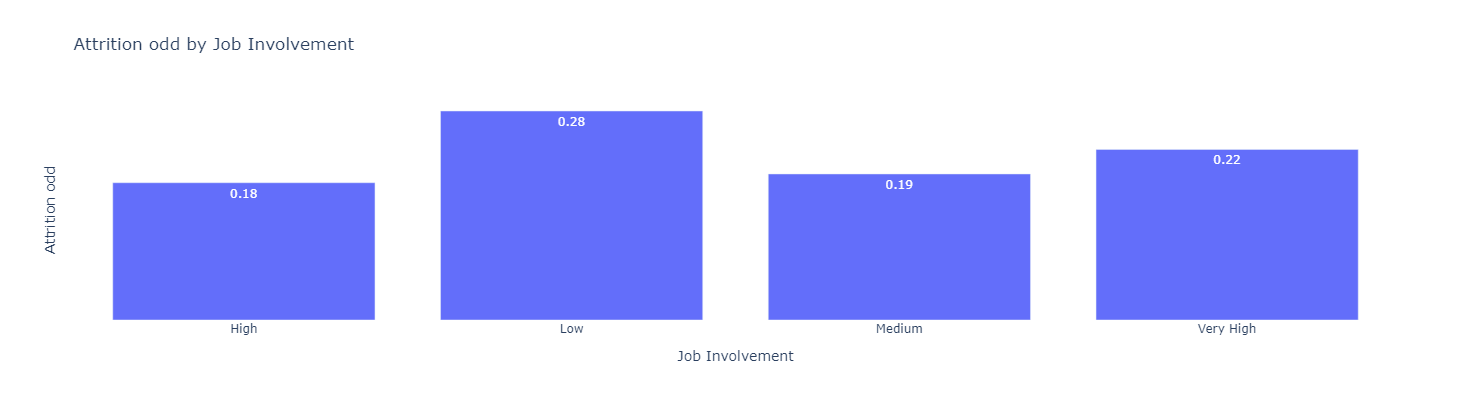

In [78]:
# Attrition odds for JobInvolvement
df_odd_JI = df_tab_JI['Yes'] / df_tab_JI['No']

# Visualizing Attrition odds
fig = px.bar(y = df_odd_JI, 
             x = df_odd_JI.index,
             text_auto = '.2f',
             title = 'Attrition odd by Job Involvement',
             labels = {'y': 'Attrition odd', 'x': 'Job Involvement'},
             width = 400,
             height = 400)

# Updating layout to reduce clutter
fig.update_layout(yaxis = dict(showgrid = False, zeroline = False, showline = False, showticklabels = False), autosize = True, plot_bgcolor = 'white')

# Showing figure
fig.show()

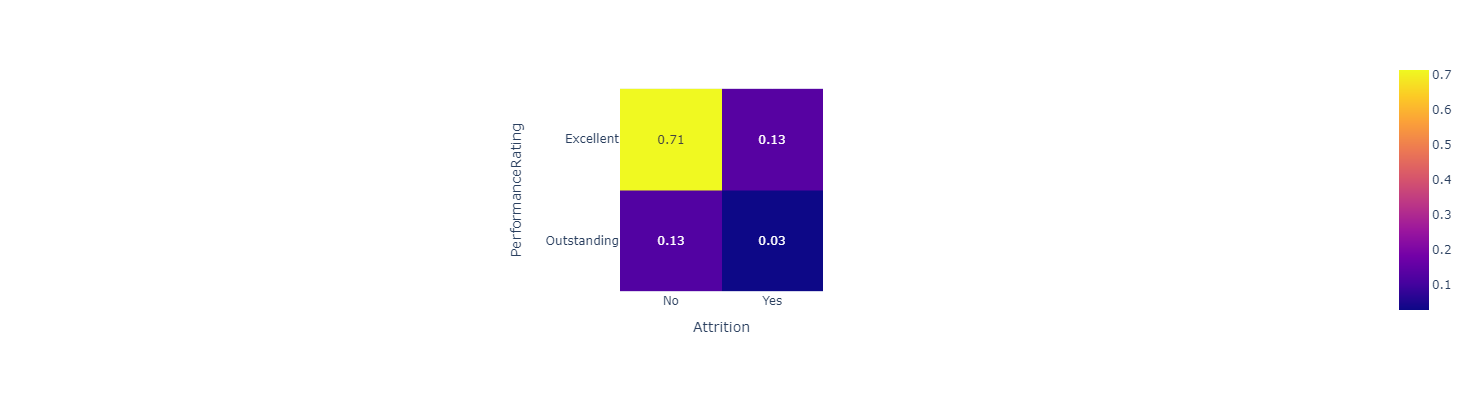

In [79]:
# Attrition vs PerformanceRating
df_tab_PR = pd.crosstab(df_final.PerformanceRating, df_final.Attrition, normalize = True)

# heatmap
fig = px.imshow(df_tab_PR, text_auto = '.2f', width = 400, height = 400)
fig.show()

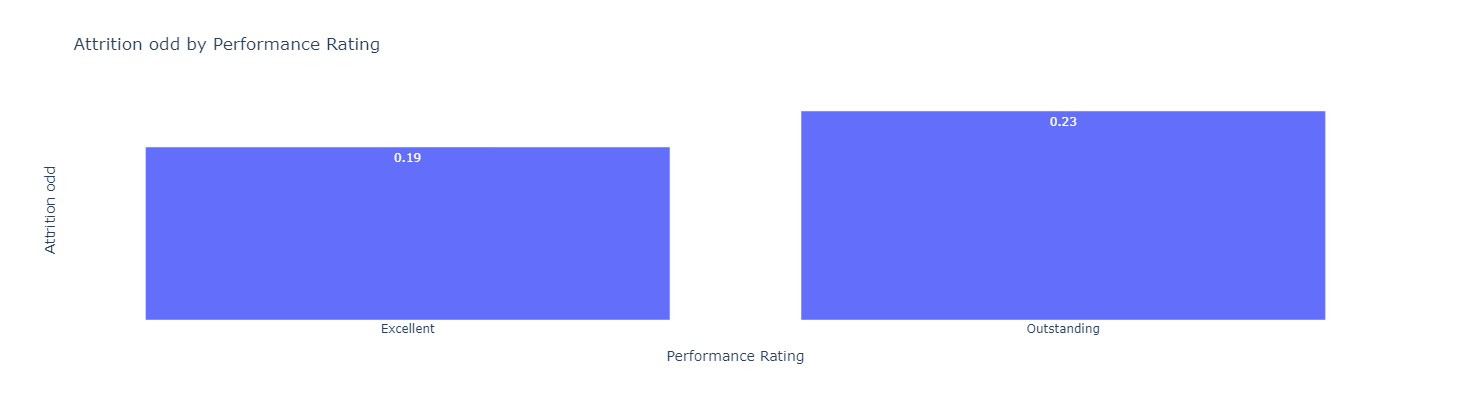

In [80]:
# Attrition odds for PerformanceRating
df_odd_PR = df_tab_PR['Yes'] / df_tab_PR['No']

# Visualizing Attrition odds
fig = px.bar(y = df_odd_PR, 
             x = df_odd_PR.index,
             text_auto = '.2f',
             title = 'Attrition odd by Performance Rating',
             labels = {'y': 'Attrition odd', 'x': 'Performance Rating'},
             width = 400,
             height = 400)

# Updating layout to reduce clutter
fig.update_layout(yaxis = dict(showgrid = False, zeroline = False, showline = False, showticklabels = False), autosize = True, plot_bgcolor = 'white')

# Showing figure
fig.show()

In [81]:
# Numerical variables
df_numerical

Index(['Age', 'DistanceFromHome', 'JobLevel', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Avg_duration_sec'],
      dtype='object')

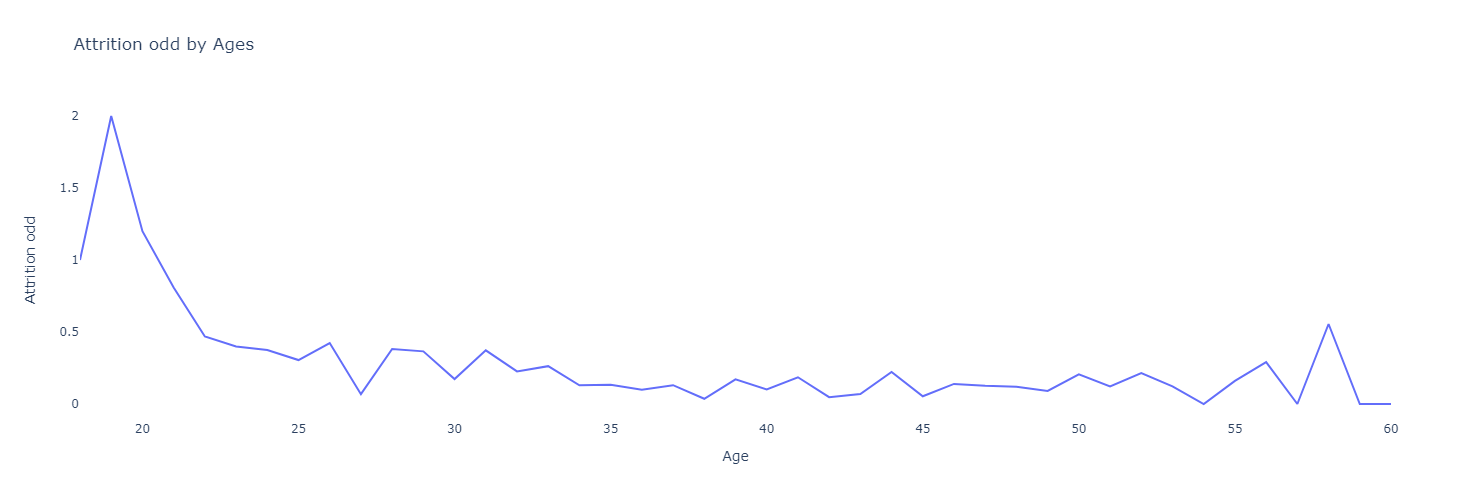

In [82]:
# Attrition odd by Ages
df_tab_A = pd.crosstab(df_final.Age, df_final.Attrition, normalize = True)
df_odd_A = df_tab_A['Yes'] / df_tab_A['No']

# Visualizing Attrition odds
fig = px.line(y = df_odd_A, 
              x = df_odd_A.index,
              title = 'Attrition odd by Ages',
              labels = {'y': 'Attrition odd', 'x': 'Age'},
              width = 500,
              height = 500)

# Updating layout to reduce clutter
fig.update_layout(yaxis = dict(showgrid = False, zeroline = False, showline = False, showticklabels = True), autosize = True, plot_bgcolor = 'white')

# Showing figure
fig.show()

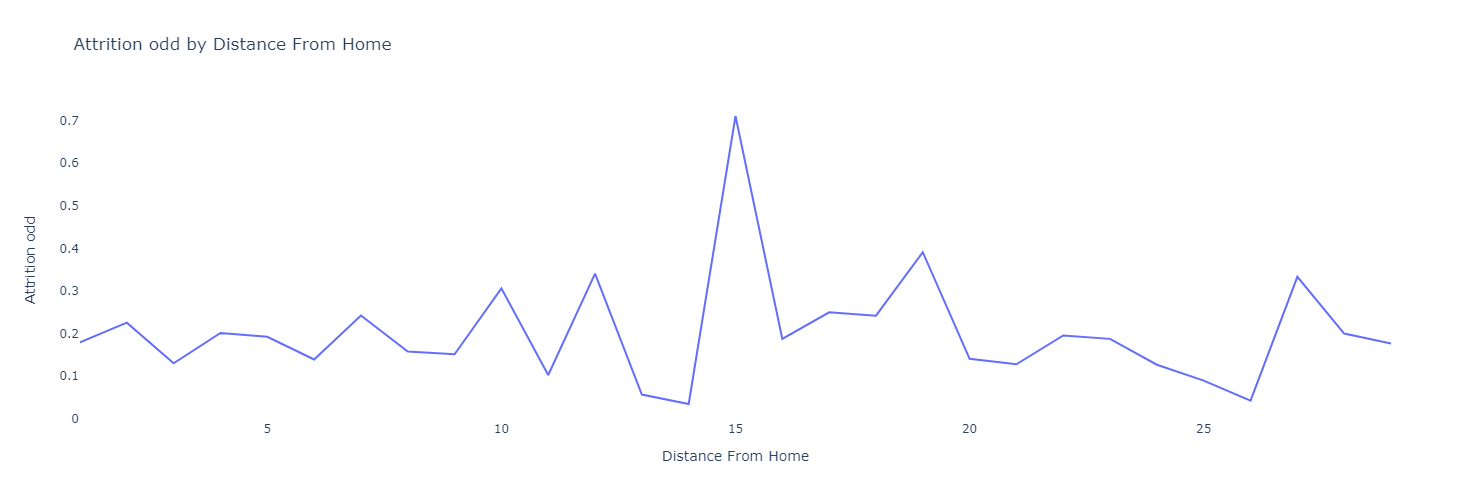

In [83]:
# Attrition odd by DistanceFromHome
df_tab_DFH = pd.crosstab(df_final.DistanceFromHome, df_final.Attrition, normalize = True)
df_odd_DFH = df_tab_DFH['Yes'] / df_tab_DFH['No']

# Visualizing Attrition odds
fig = px.line(y = df_odd_DFH, 
              x = df_odd_DFH.index,
              title = 'Attrition odd by Distance From Home',
              labels = {'y': 'Attrition odd', 'x': 'Distance From Home'},
              width = 500,
              height = 500)

# Updating layout to reduce clutter
fig.update_layout(yaxis = dict(showgrid = False, zeroline = False, showline = False, showticklabels = True), autosize = True, plot_bgcolor = 'white')

# Showing figure
fig.show()

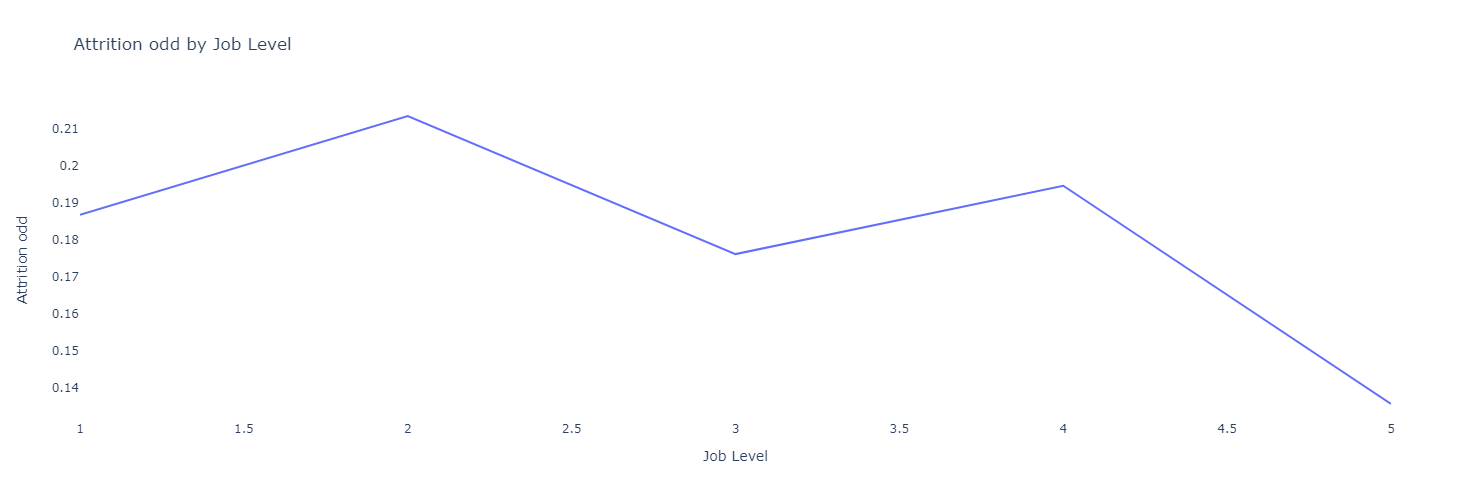

In [84]:
# Attrition odd by JobLevel
df_tab_JL = pd.crosstab(df_final.JobLevel, df_final.Attrition, normalize = True)
df_odd_JL = df_tab_JL['Yes'] / df_tab_JL['No']

# Visualizing Attrition odds
fig = px.line(y = df_odd_JL, 
              x = df_odd_JL.index,
              title = 'Attrition odd by Job Level',
              labels = {'y': 'Attrition odd', 'x': 'Job Level'},
              width = 500,
              height = 500)

# Updating layout to reduce clutter
fig.update_layout(yaxis = dict(showgrid = False, zeroline = False, showline = False, showticklabels = True), autosize = True, plot_bgcolor = 'white')

# Showing figure
fig.show()

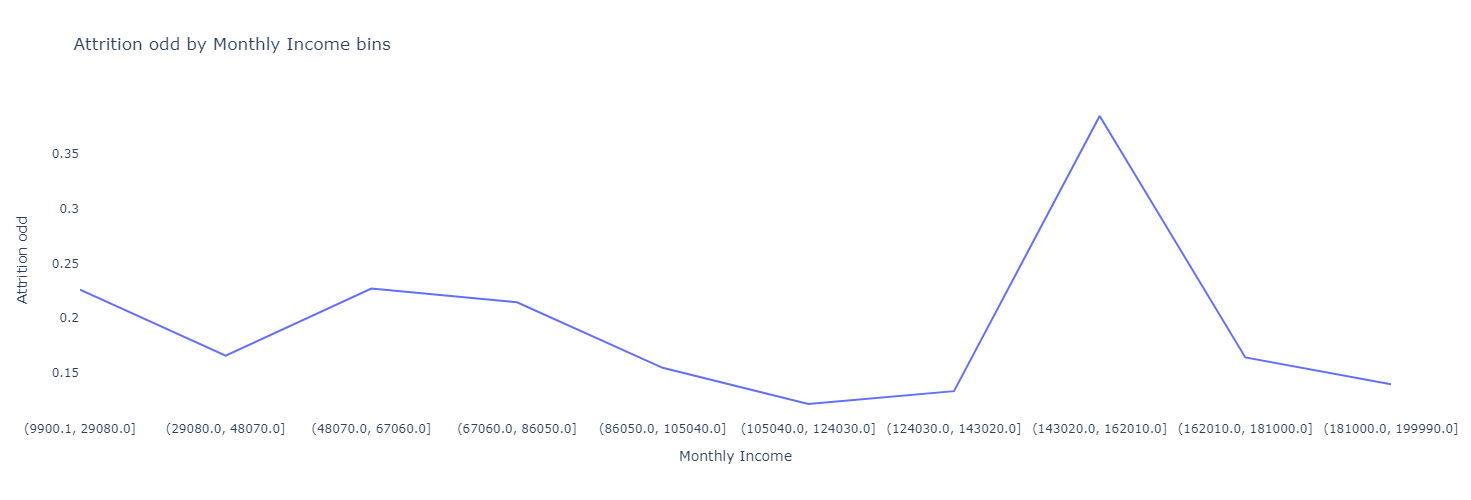

In [85]:
# Attrition odd by MonthlyIncome
df_tab_MI = pd.crosstab(pd.cut(df_final.MonthlyIncome, bins = 10), df_final.Attrition, normalize = True)
df_odd_MI = df_tab_MI['Yes'] / df_tab_MI['No']
df_odd_MI.index = ['(9900.1, 29080.0]', '(29080.0, 48070.0]', '(48070.0, 67060.0]', '(67060.0, 86050.0]', '(86050.0, 105040.0]',
                  '(105040.0, 124030.0]', '(124030.0, 143020.0]', '(143020.0, 162010.0]', '(162010.0, 181000.0]', '(181000.0, 199990.0]']

# Visualizing Attrition odds
fig = px.line(y = df_odd_MI, 
              x = df_odd_MI.index,
              title = 'Attrition odd by Monthly Income bins',
              labels = {'y': 'Attrition odd', 'x': 'Monthly Income'},
              width = 500,
              height = 500)

# Updating layout to reduce clutter
fig.update_layout(yaxis = dict(showgrid = False, zeroline = False, showline = False, showticklabels = True), autosize = True, plot_bgcolor = 'white')

# Showing figure
fig.show()

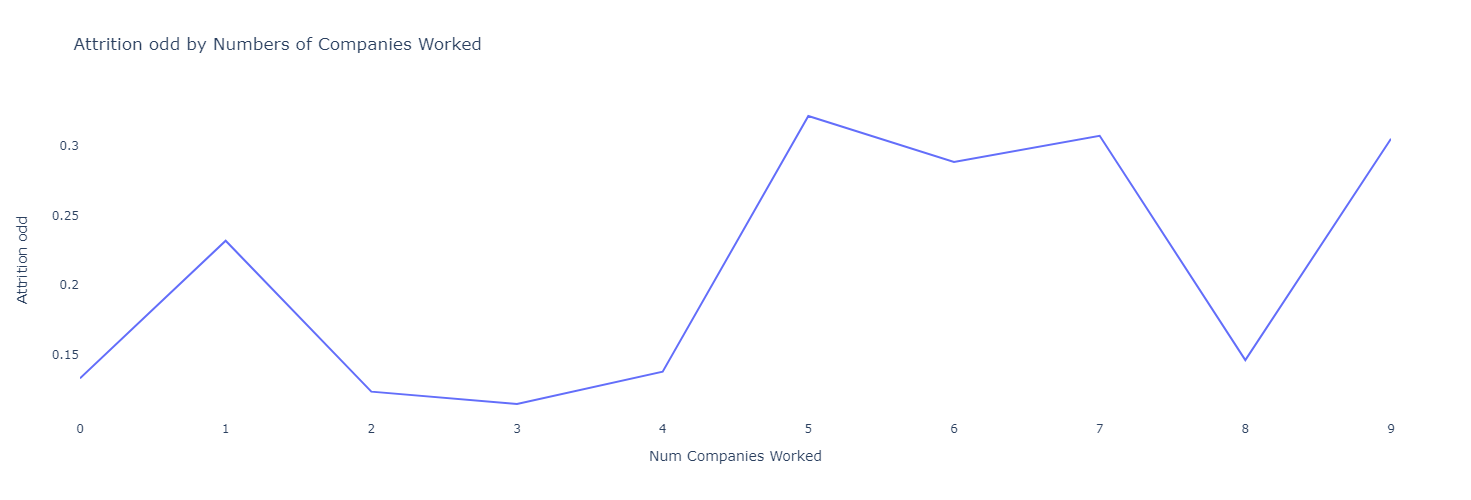

In [86]:
# Attrition odd by NumCompaniesWorked
df_tab_NCW = pd.crosstab(df_final.NumCompaniesWorked, df_final.Attrition, normalize = True)
df_odd_NCW = df_tab_NCW['Yes'] / df_tab_NCW['No']

# Visualizing Attrition odds
fig = px.line(y = df_odd_NCW, 
              x = df_odd_NCW.index,
              title = 'Attrition odd by Numbers of Companies Worked',
              labels = {'y': 'Attrition odd', 'x': 'Num Companies Worked'},
              width = 500,
              height = 500)

# Updating layout to reduce clutter
fig.update_layout(yaxis = dict(showgrid = False, zeroline = False, showline = False, showticklabels = True), autosize = True, plot_bgcolor = 'white')

# Showing figure
fig.show()

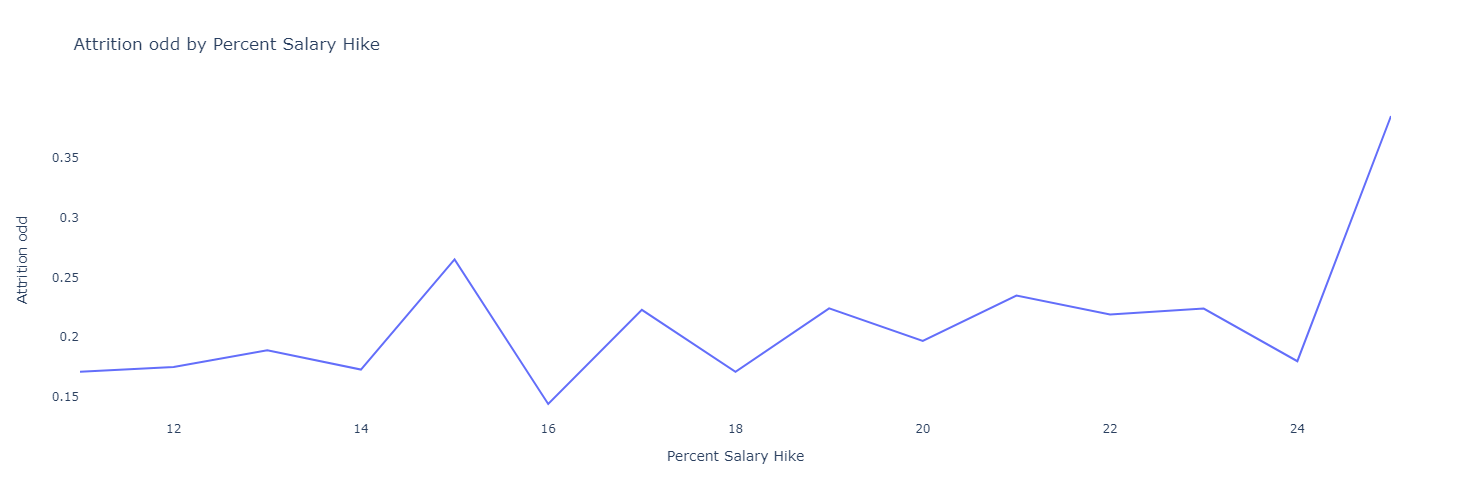

In [87]:
# Attrition odd by PercentSalaryHike
df_tab_PSH = pd.crosstab(df_final.PercentSalaryHike, df_final.Attrition, normalize = True)
df_odd_PSH = df_tab_PSH['Yes'] / df_tab_PSH['No']

# Visualizing Attrition odds
fig = px.line(y = df_odd_PSH, 
              x = df_odd_PSH.index,
              title = 'Attrition odd by Percent Salary Hike',
              labels = {'y': 'Attrition odd', 'x': 'Percent Salary Hike'},
              width = 500,
              height = 500)

# Updating layout to reduce clutter
fig.update_layout(yaxis = dict(showgrid = False, zeroline = False, showline = False, showticklabels = True), autosize = True, plot_bgcolor = 'white')

# Showing figure
fig.show()

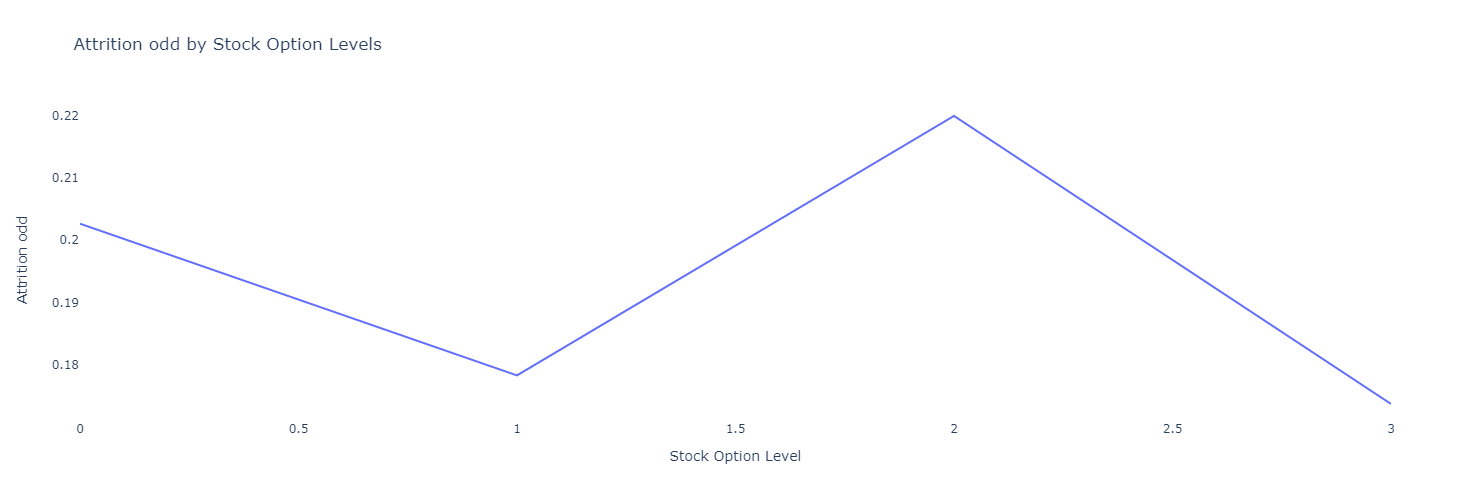

In [88]:
# Attrition odd by StockOptionLevel
df_tab_SOL = pd.crosstab(df_final.StockOptionLevel, df_final.Attrition, normalize = True)
df_odd_SOL = df_tab_SOL['Yes'] / df_tab_SOL['No']

# Visualizing Attrition odds
fig = px.line(y = df_odd_SOL, 
              x = df_odd_SOL.index,
              title = 'Attrition odd by Stock Option Levels',
              labels = {'y': 'Attrition odd', 'x': 'Stock Option Level'},
              width = 500,
              height = 500)

# Updating layout to reduce clutter
fig.update_layout(yaxis = dict(showgrid = False, zeroline = False, showline = False, showticklabels = True), autosize = True, plot_bgcolor = 'white')

# Showing figure
fig.show()

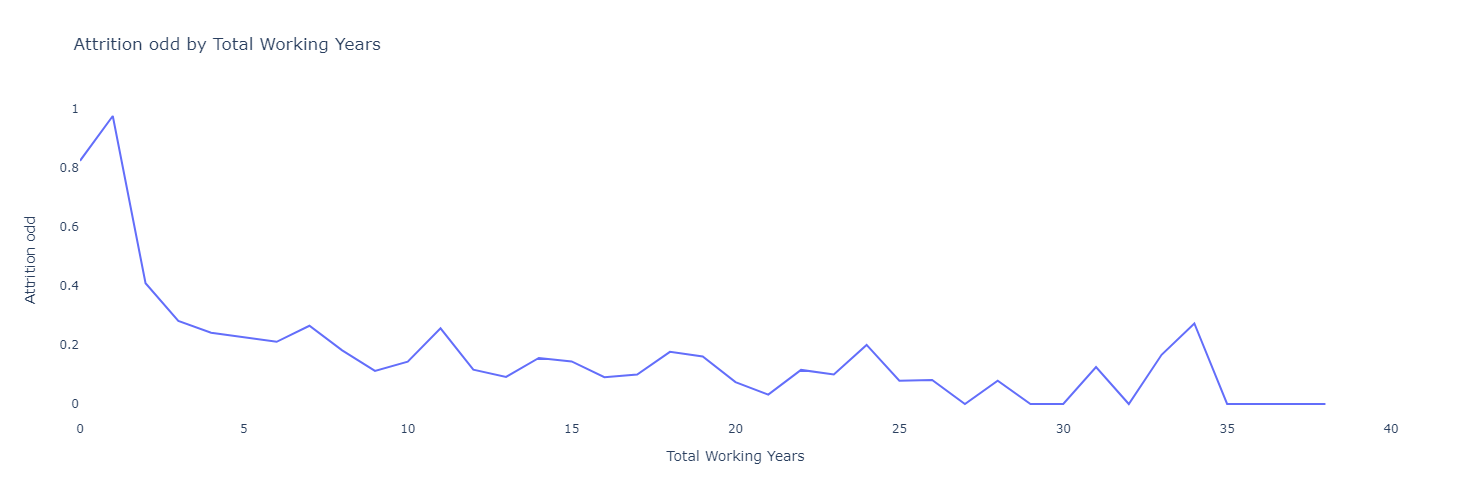

In [89]:
# Attrition odd by TotalWorkingYears
df_tab_TWY = pd.crosstab(df_final.TotalWorkingYears, df_final.Attrition, normalize = True)
df_odd_TWY = df_tab_TWY['Yes'] / df_tab_TWY['No']

# Visualizing Attrition odds
fig = px.line(y = df_odd_TWY, 
              x = df_odd_TWY.index,
              title = 'Attrition odd by Total Working Years',
              labels = {'y': 'Attrition odd', 'x': 'Total Working Years'},
              width = 500,
              height = 500)

# Updating layout to reduce clutter
fig.update_layout(yaxis = dict(showgrid = False, zeroline = False, showline = False, showticklabels = True), autosize = True, plot_bgcolor = 'white')

# Showing figure
fig.show()

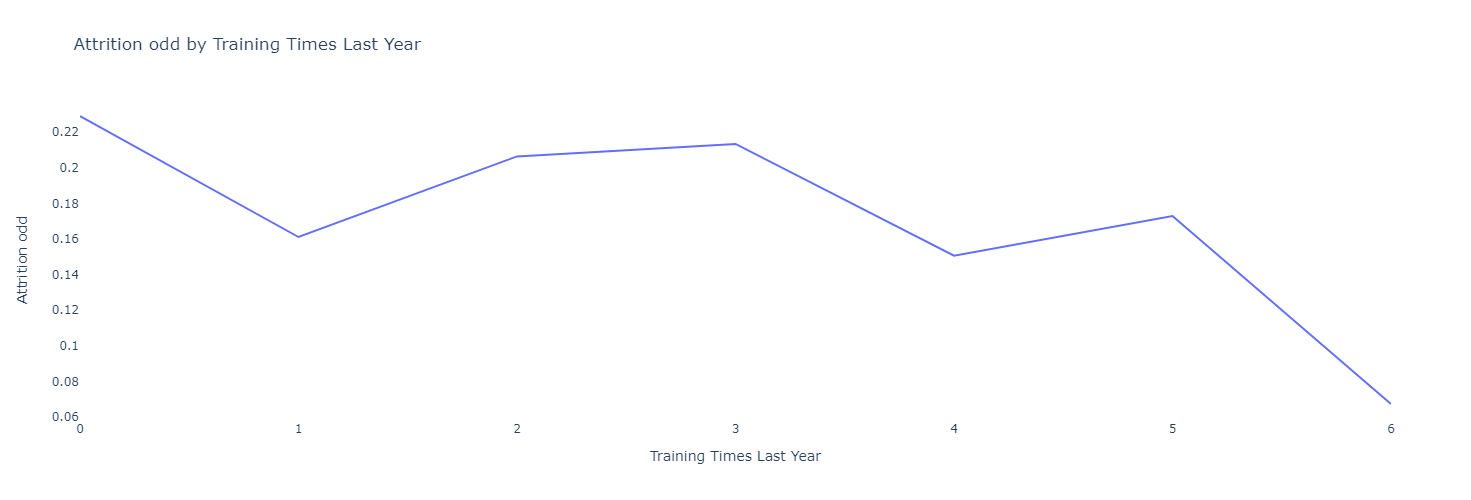

In [90]:
# Attrition odd by TrainingTimesLastYear
df_tab_TTLY = pd.crosstab(df_final.TrainingTimesLastYear, df_final.Attrition, normalize = True)
df_odd_TTLY = df_tab_TTLY['Yes'] / df_tab_TTLY['No']

# Visualizing Attrition odds
fig = px.line(y = df_odd_TTLY, 
              x = df_odd_TTLY.index,
              title = 'Attrition odd by Training Times Last Year',
              labels = {'y': 'Attrition odd', 'x': 'Training Times Last Year'},
              width = 500,
              height = 500)

# Updating layout to reduce clutter
fig.update_layout(yaxis = dict(showgrid = False, zeroline = False, showline = False, showticklabels = True), autosize = True, plot_bgcolor = 'white')

# Showing figure
fig.show()

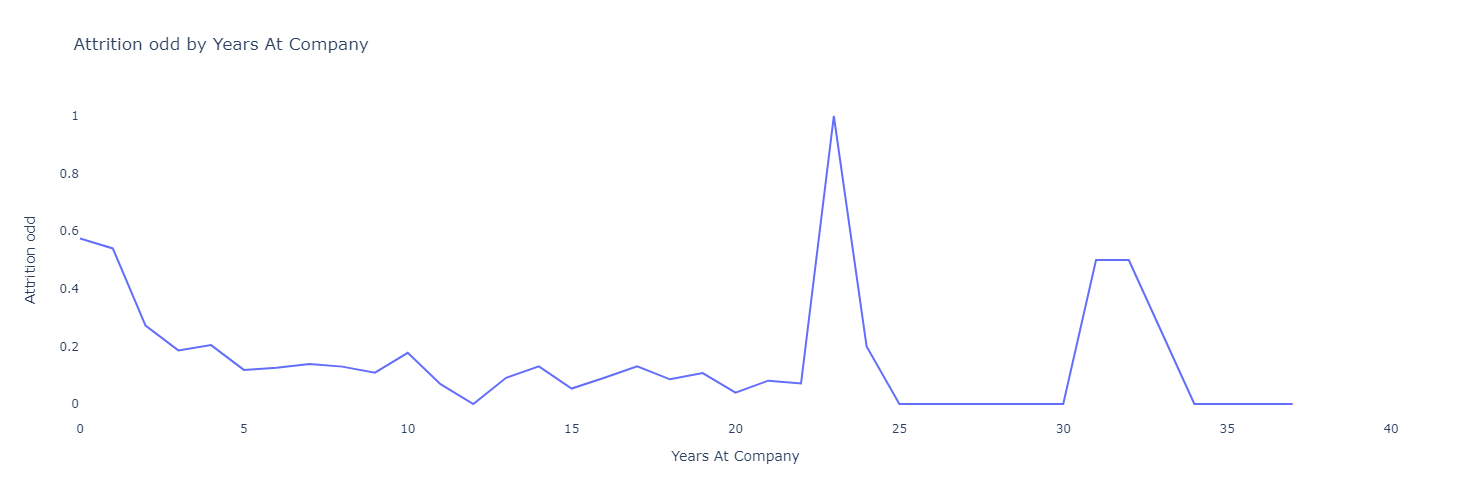

In [91]:
# Attrition odd by YearsAtCompany
df_tab_YAC = pd.crosstab(df_final.YearsAtCompany, df_final.Attrition, normalize = True)
df_odd_YAC = df_tab_YAC['Yes'] / df_tab_YAC['No']

# Visualizing Attrition odds
fig = px.line(y = df_odd_YAC, 
              x = df_odd_YAC.index,
              title = 'Attrition odd by Years At Company',
              labels = {'y': 'Attrition odd', 'x': 'Years At Company'},
              width = 500,
              height = 500)

# Updating layout to reduce clutter
fig.update_layout(yaxis = dict(showgrid = False, zeroline = False, showline = False, showticklabels = True), autosize = True, plot_bgcolor = 'white')

# Showing figure
fig.show()

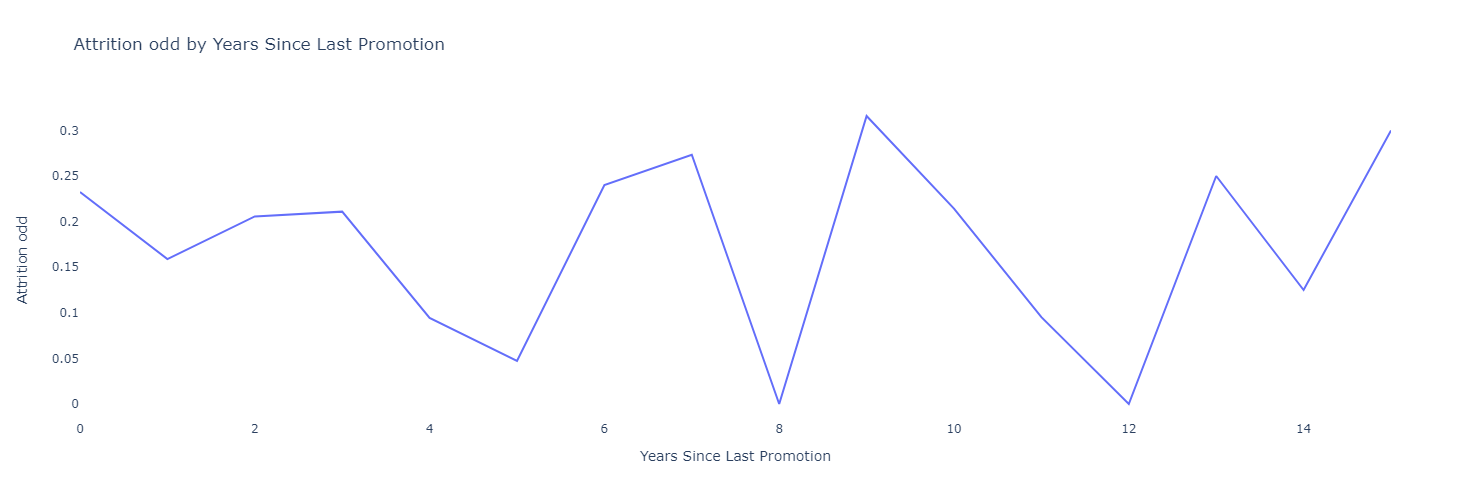

In [92]:
# Attrition odd by YearsSinceLastPromotion
df_tab_YSLP = pd.crosstab(df_final.YearsSinceLastPromotion, df_final.Attrition, normalize = True)
df_odd_YSLP = df_tab_YSLP['Yes'] / df_tab_YSLP['No']

# Visualizing Attrition odds
fig = px.line(y = df_odd_YSLP, 
              x = df_odd_YSLP.index,
              title = 'Attrition odd by Years Since Last Promotion',
              labels = {'y': 'Attrition odd', 'x': 'Years Since Last Promotion'},
              width = 500,
              height = 500)

# Updating layout to reduce clutter
fig.update_layout(yaxis = dict(showgrid = False, zeroline = False, showline = False, showticklabels = True), autosize = True, plot_bgcolor = 'white')

# Showing figure
fig.show()

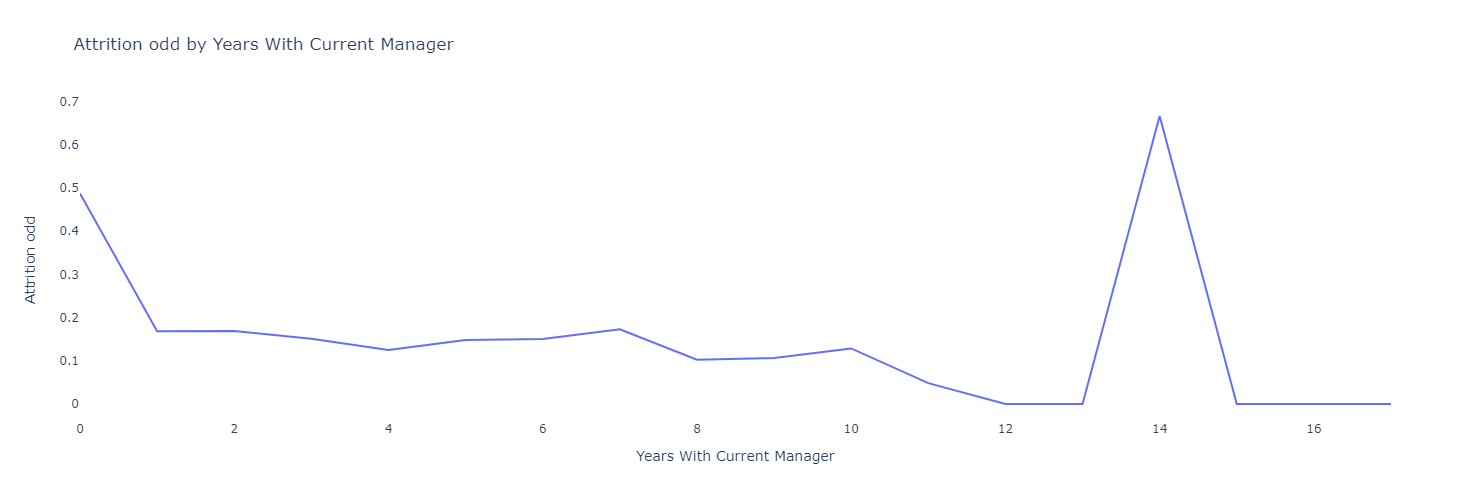

In [93]:
# Attrition odd by YearsWithCurrManager
df_tab_YWCM = pd.crosstab(df_final.YearsWithCurrManager, df_final.Attrition, normalize = True)
df_odd_YWCM = df_tab_YWCM['Yes'] / df_tab_YWCM['No']

# Visualizing Attrition odds
fig = px.line(y = df_odd_YWCM, 
              x = df_odd_YWCM.index,
              title = 'Attrition odd by Years With Current Manager',
              labels = {'y': 'Attrition odd', 'x': 'Years With Current Manager'},
              width = 500,
              height = 500)

# Updating layout to reduce clutter
fig.update_layout(yaxis = dict(showgrid = False, zeroline = False, showline = False, showticklabels = True), autosize = True, plot_bgcolor = 'white')

# Showing figure
fig.show()

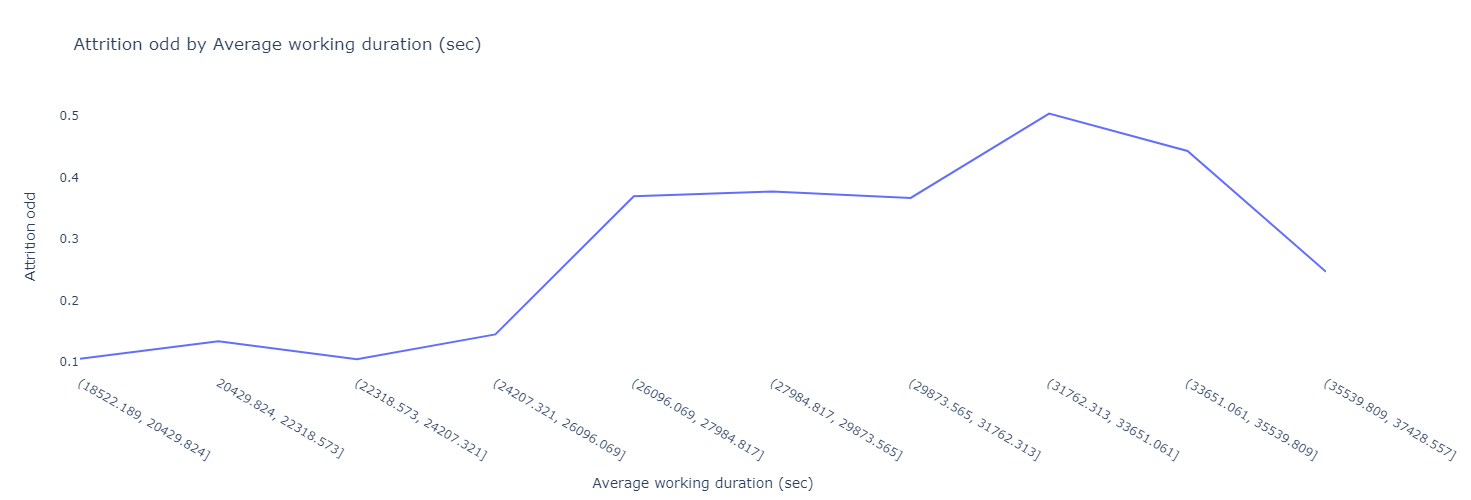

In [94]:
# Attrition odd by Avg_duration_sec
df_tab_AWD = pd.crosstab(pd.cut(df_final.Avg_duration_sec, bins = 10), df_final.Attrition, normalize = True)
df_odd_AWD = df_tab_AWD['Yes'] / df_tab_AWD['No']
df_odd_AWD.index = ['(18522.189, 20429.824]', '20429.824, 22318.573]', '(22318.573, 24207.321]', '(24207.321, 26096.069]', '(26096.069, 27984.817]',
                  '(27984.817, 29873.565]', '(29873.565, 31762.313]', '(31762.313, 33651.061]', '(33651.061, 35539.809]', '(35539.809, 37428.557]']

# Visualizing Attrition odds
fig = px.line(y = df_odd_AWD, 
              x = df_odd_AWD.index,
              title = 'Attrition odd by Average working duration (sec)',
              labels = {'y': 'Attrition odd', 'x': 'Average working duration (sec)'},
              width = 500,
              height = 500)

# Updating layout to reduce clutter
fig.update_layout(yaxis = dict(showgrid = False, zeroline = False, showline = False, showticklabels = True), autosize = True, plot_bgcolor = 'white')

# Showing figure
fig.show()

## [8 Regression analysis](#0) <a class=anchor id=9></a>

The idea of an explanatory model is that the model explains the volatility in the dependent variable using volatilities in the independent variables. In this analysis, the logistic regression model is employed to explain the attrition using other factors. This model form is chosen due to the binary nature of the dependent variable. Attrition is a binary variable that only has two values $0$ and $1$, the model actually does not aim to explain the changes in attrition but to explain the changes in its probability using volatilities of independent factors.

The problem of probability is that it is bounded between $0$ and $1$, so a normal linear regression is not appropriate for modelling such a relationship. The logistic model does not assume a direct linear relationship between the probability of attrition and other factors, instead it assumes a linear relationship between the log odd probability of attrition and other factors. Probability odd of a binary factor $X$ is defined as the ratio 

$$\text{Probability odd of } X = \frac{P(X = 1)}{1 - P(X = 1)}$$

So the log odd probability is the log of this ratio. When $y$ with observations $y_i, i = 1,...,k$ is given as a binary dependent variable, and $x_1, x_2, ..., x_n$ with observations $x_{1i}, ... , x_{ni}, i = 1, ..., k$ as $n$ different explanatory variables, denote the effect of the factor $x_j$ on $y$ as $\beta_j$, the logistic regression model has the following form

$$\log \frac{P(y = 1|x_1, x_2, ..., x_n)}{1 - P(y = 1|x_1, x_2, ..., x_n)} = \beta_0 + \sum^n_{j = 1}\beta_j x_j, \text{ for all observations } i = 1, ..., k$$

Potential problems of fitting such a model to the available data might be:

* Omitted variable bias occurs when a statistical model leaves out one or more relevant variables
* Multicollinearity refers to a situation in which two or more explanatory variables in a multiple regression model are highly linearly related

Omitted variable bias is hard to resolve because we don't have enough information about which factors really affect the log odd attrition, so it is necessary to consider all available variables then exclude irrelevant variables from the model. Multicollinearity usually happens when categorical variables are analyzed because the categories are highly correlated, so the easy treatment is to exclude one group in the categories in the final model. Furhtermore, it is often useful to check the correlations the explanatory variables using a correlation heatmap. There are some variables that we might not be interested in, but it is still useful to include them in the model to control for their impacts on the dependent variable.

Firstly, categorical variables should be transformed with dummies coding and some numerical variables should be rescaled so that they have the same magnitude with other variables. The rescaling is neccessary to avoid some technical issues with the calculation.

### [8.1 Preparing data for logistic regression](#0) <a class=anchor id=9.1></a>

In [95]:
# generate dummies from categorical variables
df_logit_data = pd.get_dummies(df_final, columns = df_categorical)
df_logit_data.head()

Age  DistanceFromHome  JobLevel  MonthlyIncome  NumCompaniesWorked  \
0   51                 6         1         131160               1.000   
1   31                10         1          41890               0.000   
2   32                17         4         193280               1.000   
3   38                 2         3          83210               3.000   
4   32                10         1          23420               4.000   

   PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
0                 11                 0              1.000   
1                 23                 1              6.000   
2                 15                 3              5.000   
3                 11                 3             13.000   
4                 12                 2              9.000   

   TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
0                      6               1                        0   
1                      3               5                        1   
2                      2               5                        0   
3                      5               8                        7   
4                      2               6                        0   

   YearsWithCurrManager  Avg_duration_sec  Attrition_No  Attrition_Yes  \
0                     0        23,505.626             1              0   
1                     4        25,030.679             0              1   
2                     3        23,320.374             1              0   
3                     5        23,228.458             1              0   
4                     4        26,952.103             1              0   

   BusinessTravel_Non-Travel  BusinessTravel_Travel_Frequently  \
0                          0                                 0   
1                          0                                 1   
2                          0                                 1   
3                          1                                 0   
4                          0                                 0   

   BusinessTravel_Travel_Rarely  Department_Human Resources  \
0                             1                           0   
1                             0                           0   
2                             0                           0   
3                             0                           0   
4                             1                           0   

   Department_Research & Development  Department_Sales  Education_Bachelor  \
0                                  0                 1                   0   
1                                  1                 0                   0   
2                                  1                 0                   0   
3                                  1                 0                   0   
4                                  1                 0                   0   

   Education_Below College  Education_College  Education_Doctor  \
0                        0                  1                 0   
1                        1                  0                 0   
2                        0                  0                 0   
3                        0                  0                 1   
4                        1                  0                 0   

   Education_Master  EducationField_Human Resources  \
0                 0                               0   
1                 0                               0   
2                 1                               0   
3                 0                               0   
4                 0                               0   

   EducationField_Life Sciences  EducationField_Marketing  \
0                             1                         0   
1                             1                         0   
2                             0                         0   
3                             1                         0   
4                             0                      

The baseline is then defined as:

* BusinessTravel = 'BusinessTravel_Non-Travel'
* Department = 'Department_Human Resources'
* Education = 'Education_Below College'
* EducationField = 'EducationField_Human Resources'
* Gender = 'Gender_Female'
* JobRole = 'JobRole_Human Resources'
* MaritalStatus = 'MaritalStatus_Single'
* EnvironmentSatisfaction = 'EnvironmentSatisfaction_Low'
* JobSatisfaction = 'JobSatisfaction_Low'
* WorkLifeBalance = 'WorkLifeBalance_Bad'
* JobInvolvement = 'JobInvolvement_Low'
* PerformanceRating = 'PerformanceRating_Excellent'

In [96]:
# dropping columns belonging to the baseline to avoid multicollinearity!
df_baseline = ['Attrition_No', 
               'BusinessTravel_Non-Travel', 
               'Department_Human Resources', 
               'Education_Below College', 
               'EducationField_Human Resources',
               'Gender_Female', 
               'JobRole_Human Resources', 
               'MaritalStatus_Single', 
               'EnvironmentSatisfaction_Low', 
               'JobSatisfaction_Low', 
               'WorkLifeBalance_Bad',
               'JobInvolvement_Low', 
               'PerformanceRating_Excellent']
df_logit_data.drop(df_baseline, axis = 1, inplace = True)
df_logit_data.head()

Age  DistanceFromHome  JobLevel  MonthlyIncome  NumCompaniesWorked  \
0   51                 6         1         131160               1.000   
1   31                10         1          41890               0.000   
2   32                17         4         193280               1.000   
3   38                 2         3          83210               3.000   
4   32                10         1          23420               4.000   

   PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
0                 11                 0              1.000   
1                 23                 1              6.000   
2                 15                 3              5.000   
3                 11                 3             13.000   
4                 12                 2              9.000   

   TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
0                      6               1                        0   
1                      3               5                        1   
2                      2               5                        0   
3                      5               8                        7   
4                      2               6                        0   

   YearsWithCurrManager  Avg_duration_sec  Attrition_Yes  \
0                     0        23,505.626              0   
1                     4        25,030.679              1   
2                     3        23,320.374              0   
3                     5        23,228.458              0   
4                     4        26,952.103              0   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                                 0                             1   
1                                 1                             0   
2                                 1                             0   
3                                 0                             0   
4                                 0                             1   

   Department_Research & Development  Department_Sales  Education_Bachelor  \
0                                  0                 1                   0   
1                                  1                 0                   0   
2                                  1                 0                   0   
3                                  1                 0                   0   
4                                  1                 0                   0   

   Education_College  Education_Doctor  Education_Master  \
0                  1                 0                 0   
1                  0                 0                 0   
2                  0                 0                 1   
3                  0                 1                 0   
4                  0                 0                 0   

   EducationField_Life Sciences  EducationField_Marketing  \
0                             1                         0   
1                             1                         0   
2                             0                         0   
3                             1                         0   
4                             0                         0   

   EducationField_Medical  EducationField_Other  \
0                       0                     0   
1                       0                     0   
2                       0                     1   
3                       0                     0   
4                       1                     0   

   EducationField_Technical Degree  Gender_Male  \
0                                0            0   
1                                0            0   
2                                0            1   
3                                0            1   
4                                0            1   

   JobRole_Healthcare Representative  JobRole_Laboratory Technician  \
0                                  1                              0   
1                                  0                 

In [97]:
# Rescaling variables
df_logit_data['MonthlyIncome'] = df_logit_data.MonthlyIncome / 1000
df_logit_data['Avg_duration_sec'] = df_logit_data.Avg_duration_sec / 3600
df_logit_data.rename(columns = {'Avg_duration_sec': 'Avg_duration_hr'}, inplace = 1)

### [8.2 Fitting explanatory models](#0) <a class=anchor id=9.2></a>

Firstly, a model including all factors considered. Fitting the model including all factors can be done in Python as follows

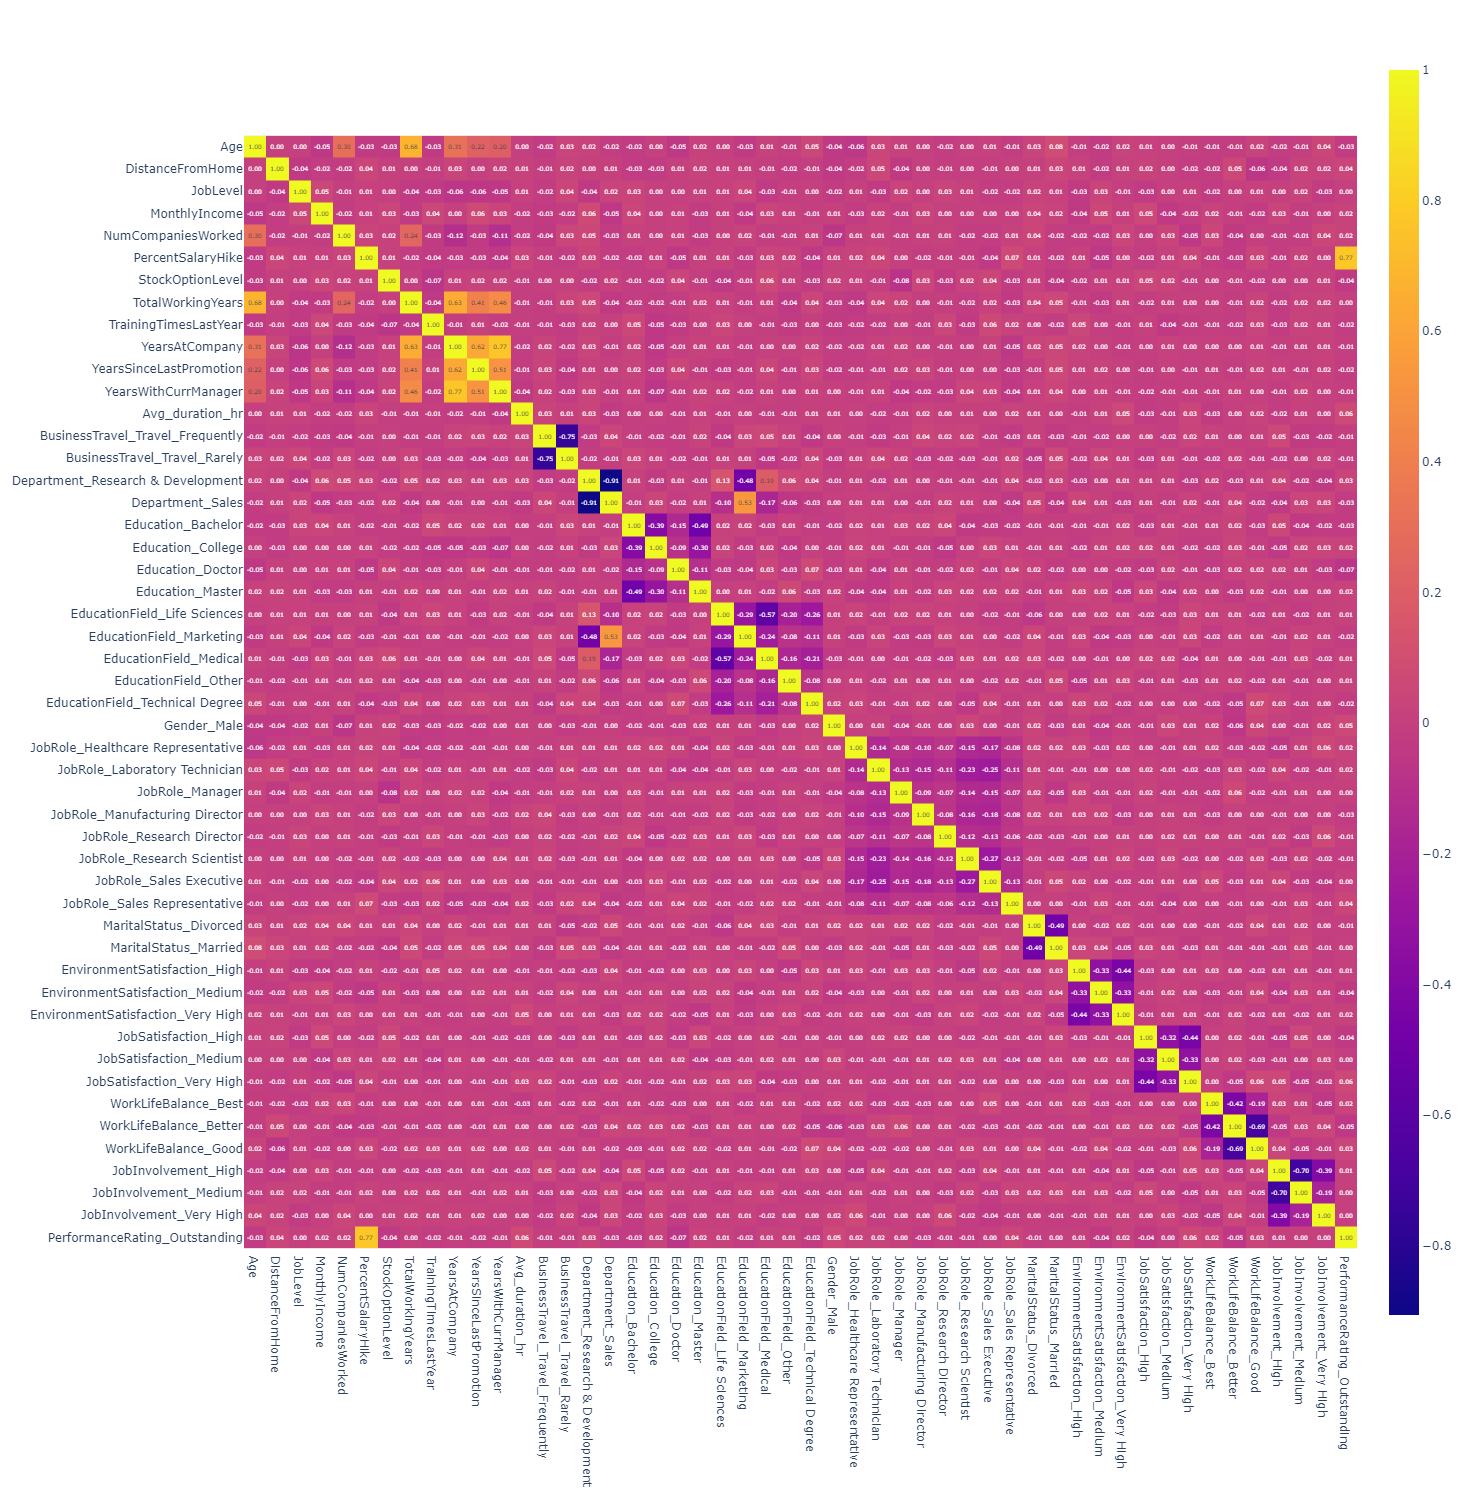

In [98]:
# Prepare data for the full model
df_x = df_logit_data.drop(['Attrition_Yes'], axis = 1)
df_x = sm.add_constant(df_x)
df_y = df_logit_data['Attrition_Yes']

# Train Test Split
df_x_train, df_x_valid, df_y_train, df_y_valid = train_test_split(df_x, df_y, train_size = 0.8, random_state = 2)

# Checking correlations
fig = px.imshow(df_x.drop('const', axis = 1).corr(), text_auto = '.2f', width = 1500, height = 1500)
fig.show()

In [99]:
# fitting the full model
model_logit_full = sm.GLM(df_y_train, df_x_train, family = sm.families.Binomial())
result_logit_full = model_logit_full.fit(method = 'newton')
result_logit_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          Attrition_Yes   No. Observations:                 3440
Model:                            GLM   Df Residuals:                     3389
Model Family:                Binomial   Df Model:                           50
Link Function:                  Logit   Scale:                          1.0000
Method:                        newton   Log-Likelihood:                -1153.0
Date:                Sat, 27 Aug 2022   Deviance:                       2306.1
Time:                        23:50:34   Pearson chi2:                 5.40e+03
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1867
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.8988      0.806      1.115      0.265      -0.681       2.479
Age                                  -0.0328      0.009     -3.835      0.000      -0.050      -0.016
DistanceFromHome                     -0.0071      0.007     -1.029      0.304      -0.021       0.006
JobLevel                             -0.1080      0.051     -2.105      0.035      -0.209      -0.007
MonthlyIncome                        -0.0023      0.001     -1.885      0.059      -0.005    9.04e-05
NumCompaniesWorked                    0.1509      0.023      6.456      0.000       0.105       0.197
PercentSalaryHike                     0.0082      0.024      0.348      0.728      -0.038       0.054
StockOptionLevel                     -0.0846      0.065     -1.303      0.193      -0.212       0.043
TotalWorkingYears                    -0.0870      0.015     -5.658      0.000      -0.117      -0.057
TrainingTimesLastYear                -0.1558      0.043     -3.602      0.000      -0.241      -0.071
YearsAtCompany                        0.0431      0.022      1.973      0.048       0.000       0.086
YearsSinceLastPromotion               0.1789      0.025      7.216      0.000       0.130       0.228
YearsWithCurrManager                 -0.1793      0.028     -6.400      0.000      -0.234      -0.124
Avg_duration_hr                       0.4684      0.041     11.474      0.000       0.388       0.548
BusinessTravel_Travel_Frequently      1.5829      0.245      6.468      0.000       1.103       2.063
BusinessTravel_Travel_Rarely          0.8201      0.229      3.586      0.000       0.372       1.268
Department_Research & Development    -0.6684      0.322     -2.075      0.038      -1.300      -0.037
Department_Sales                     -0.8224      0.339     -2.426      0.015      -1.487      -0.158
Education_Bachelor                   -0.1246      0.183     -0.681      0.496      -0.483       0.234
Education_College                     0.0169      0.199      0.085      0.933      -0.374       0.408
Education_Doctor                     -0.5862      0.374     -1.567      0.117      -1.319       0.147
Education_Master                     -0.1102      0.191     -0.576      0.565      -0.485       0.265
EducationField_Life Sciences         -0.6559      0.434     -1.510      0.131      -1.507       0.195
EducationField_Marketing             -0.8862      0.479     -1.850      0.064      -1.825       0.053
EducationField_Medical               -0.8116      0.435     -1.866      0.062      -1.664       0.041
EducationField_Other                 -0.9081      0.485     -1.871      0.061      -1.860       0.043
EducationField_Technical Degree      -0.9362      0.467     -2.007      0.045      -1.851      -0.022
Gender_Male            

In [100]:
# Calculating in sample accuracy for the full model
tab_valid_full = pd.DataFrame({'EmployeeID': df_y_train.index,'Attrition': df_y_train})
tab_valid_full['Forecast Attrition Probability'] = result_logit_full.predict(df_x_train)
tab_valid_full['Forecast Attrition'] = tab_valid_full['Forecast Attrition Probability'].map(lambda x: 1 if x > 0.5 else 0)
metrics.accuracy_score(tab_valid_full.Attrition, tab_valid_full['Forecast Attrition'])

0.8625

Unlike normal linear regression, logistic regression doesn't offer $R^2$ as a technical statistic to explain how well the model is in explaining the variations of the dependent variable. This might be explained by the difference in binary nature of the dependent variable. In-sample accuracy can be used as a substitute technical statistics to diagnose how well the model performs. The intuition is that the model is used to forecast attrition of the sample used to train it, and this forecast accuracy is used as the metrics to evaluate how well the model performs technically. In this case, the in-sample accuracy is approximately 86 percents, which is pretty high and signifies that the model does a good job in explaining the Attrition using other factors. 

However, this is only a technical metrics to diagnose how well the model performs, it does not show whether the results actually make sense. To understand the results, we should look at the actual effects of the factors on the dependent variable and whether they are statistically significant.

In [101]:
# Extracting statistically insignificant variables
table_coef_full = result_logit_full.summary().tables[1]
table_coef_full = pd.read_html(table_coef_full.as_html(), header=0, index_col=0)[0]
table_coef_full[table_coef_full['P>|z|'] > 0.05]

coef  std err      z  P>|z|  [0.025  \
const                              0.899    0.806  1.115  0.265  -0.681   
DistanceFromHome                  -0.007    0.007 -1.029  0.304  -0.021   
MonthlyIncome                     -0.002    0.001 -1.885  0.059  -0.005   
PercentSalaryHike                  0.008    0.024  0.348  0.728  -0.038   
StockOptionLevel                  -0.085    0.065 -1.303  0.193  -0.212   
Education_Bachelor                -0.125    0.183 -0.681  0.496  -0.483   
Education_College                  0.017    0.199  0.085  0.933  -0.374   
Education_Doctor                  -0.586    0.374 -1.567  0.117  -1.319   
Education_Master                  -0.110    0.191 -0.576  0.565  -0.485   
EducationField_Life Sciences      -0.656    0.434 -1.510  0.131  -1.507   
EducationField_Marketing          -0.886    0.479 -1.850  0.064  -1.825   
EducationField_Medical            -0.812    0.435 -1.866  0.062  -1.664   
EducationField_Other              -0.908    0.485 -1.871  0.061  -1.860   
Gender_Male                        0.034    0.113  0.298  0.766  -0.187   
JobRole_Healthcare Representative  0.045    0.359  0.126  0.899  -0.658   
JobRole_Laboratory Technician      0.322    0.328  0.982  0.326  -0.321   
JobRole_Manager                   -0.128    0.372 -0.343  0.732  -0.856   
JobRole_Manufacturing Director    -0.461    0.361 -1.276  0.202  -1.169   
JobRole_Research Scientist         0.390    0.323  1.206  0.228  -0.243   
JobRole_Sales Executive            0.485    0.321  1.510  0.131  -0.144   
JobRole_Sales Representative      -0.098    0.378 -0.259  0.796  -0.840   
JobInvolvement_High               -0.406    0.211 -1.924  0.054  -0.820   
JobInvolvement_Medium             -0.104    0.225 -0.464  0.643  -0.545   
JobInvolvement_Very High          -0.061    0.261 -0.234  0.815  -0.572   
PerformanceRating_Outstanding      0.057    0.236  0.241  0.810  -0.405   

                                   0.975]  
const                               2.479  
DistanceFromHome                    0.006  
MonthlyIncome                       0.000  
PercentSalaryHike                   0.054  
StockOptionLevel                    0.043  
Education_Bachelor                  0.234  
Education_College                   0.408  
Education_Doctor                    0.147  
Education_Master                    0.265  
EducationField_Life Sciences        0.195  
EducationField_Marketing            0.053  
EducationField_Medical              0.041  
EducationField_Other                0.043  
Gender_Male                         0.254  
JobRole_Healthcare Representative   0.748  
JobRole_Laboratory Technician       0.965  
JobRole_Manager                     0.601  
JobRole_Manufacturing Director      0.247  
JobRole_Research Scientist          1.022  
JobRole_Sales Executive             1.114  
JobRole_Sales Representative        0.643  
JobInvolvement_High                 0.008  
JobInvolvement_Medium               0.336  
JobInvolvement_Very High            0.450  
PerformanceRating_Outstanding       0.519

From the p-values, it can be seen that the following factors do not have significant effects on the Attrition odd

* DistanceFromHome
* MonthlyIncome
* PercentSalaryHike
* StockOptionLevel
* Education
* EducationField
* Gender
* JobRole
* JobInvolvement
* PerformanceRating

From the correlation heatmap, it can be seen that `DistanceFromHome`, `MonthlyIncome`, `PercentSalaryHike`, and `StockOptionLevel` do not have considerable correlations (whose absolute values are much lower than 0.1) with other factors, so they do not need to be included in the model as controlling factors. Some categories in other categorical variables (`Education`, `EducationField`, `Gender`, `JobRole`, `JobInvolvement`, and `PerformanceRating`) are correlated, but they are not correlated to other variables, so they can also be excluded from the model.

From this observation, a reduced model can be constructed

In [102]:
# Extracting insignificant variables
df_insignificant = table_coef_full[table_coef_full['P>|z|'] > 0.05].index
df_insignificant

Index(['const', 'DistanceFromHome', 'MonthlyIncome', 'PercentSalaryHike',
       'StockOptionLevel', 'Education_Bachelor', 'Education_College',
       'Education_Doctor', 'Education_Master', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'JobInvolvement_High',
       'JobInvolvement_Medium', 'JobInvolvement_Very High',
       'PerformanceRating_Outstanding'],
      dtype='object')

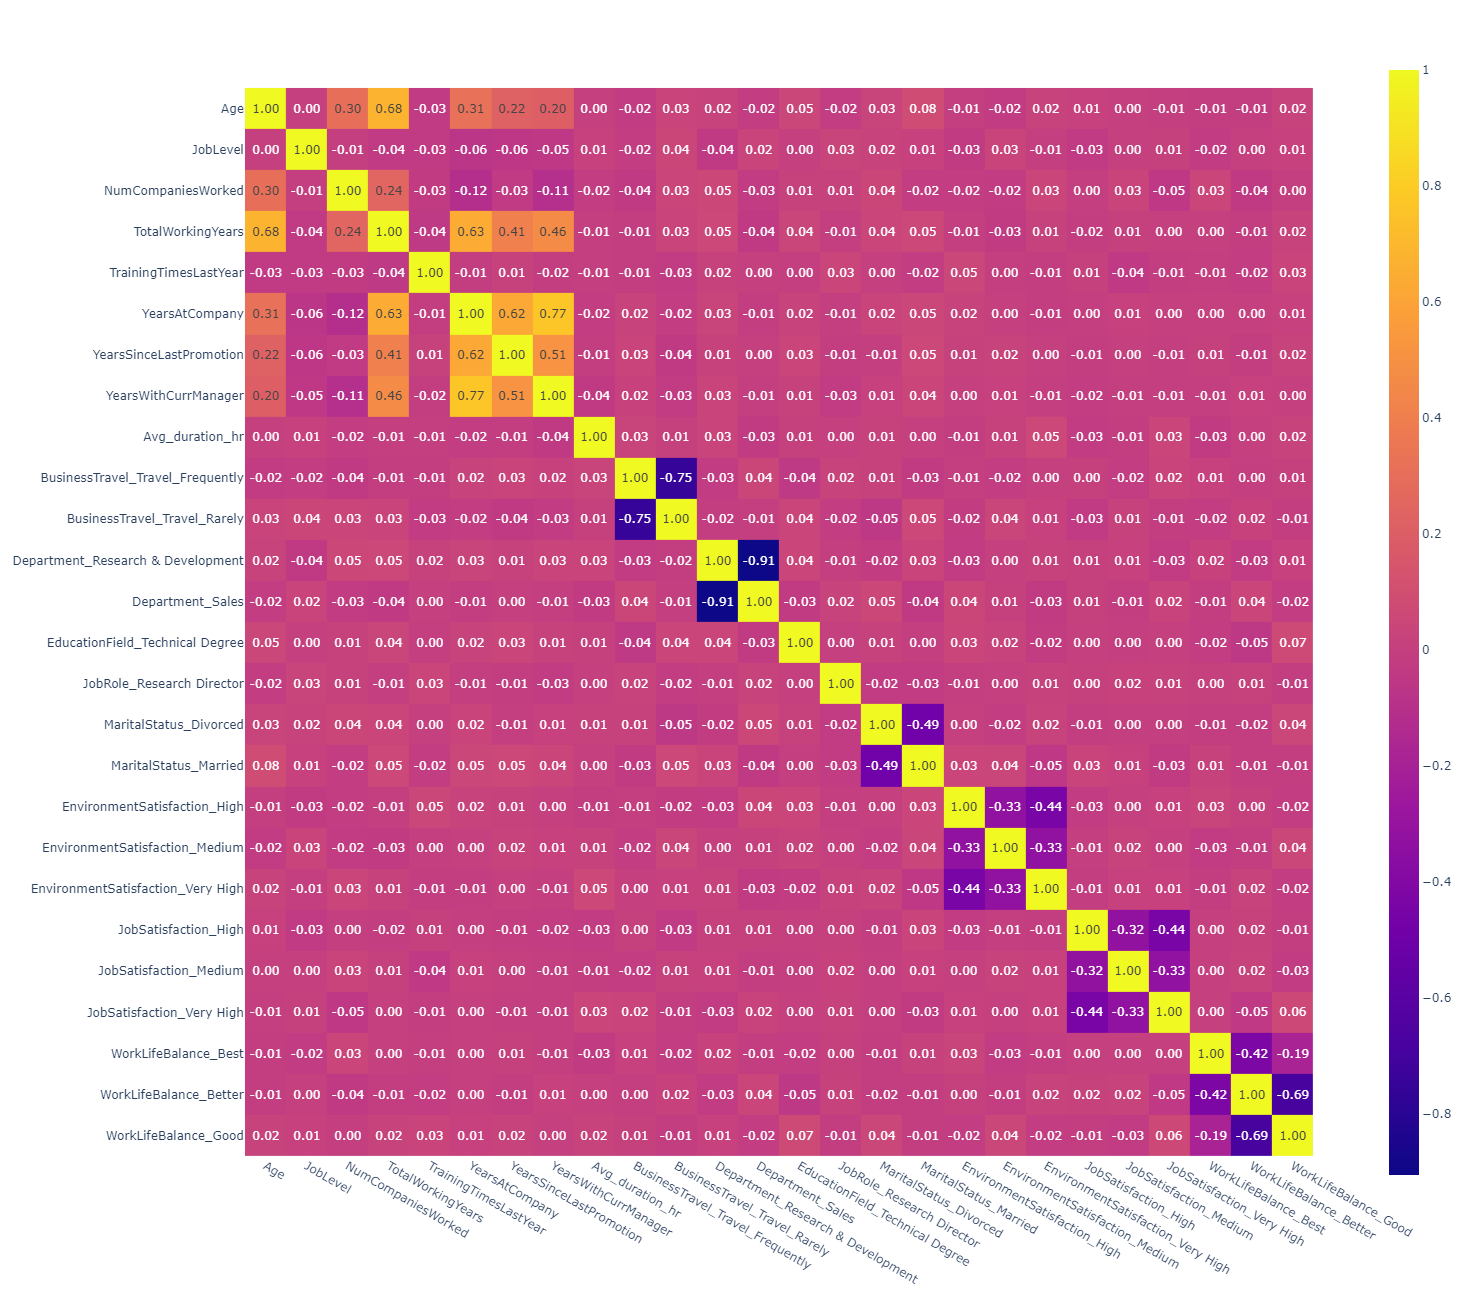

In [103]:
# Extracting data for the reduced model
df_logit_reduced_data = df_logit_data.loc[:, ~df_logit_data.columns.isin(df_insignificant)]

# Prepare data for the reduced model
df_x_reduced = df_logit_reduced_data.drop('Attrition_Yes', axis = 1)
df_x_reduced = sm.add_constant(df_x_reduced)
df_y_reduced = df_logit_reduced_data['Attrition_Yes']

# Train Test Split
df_x_train_reduced, df_x_valid_reduced, df_y_train_reduced, df_y_valid_reduced = train_test_split(df_x_reduced, df_y_reduced, train_size = 0.8, random_state = 2)

# Checking correlations
fig = px.imshow(df_x_reduced.drop('const', axis = 1).corr(), text_auto = '.2f', width = 1500, height = 1300)
fig.show()

In [104]:
# Fitting reduced model
model_logit_reduced = sm.GLM(df_y_train_reduced, df_x_train_reduced, family = sm.families.Binomial())
result_logit_reduced = model_logit_reduced.fit(method = 'Newton')
result_logit_reduced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          Attrition_Yes   No. Observations:                 3440
Model:                            GLM   Df Residuals:                     3413
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                        Newton   Log-Likelihood:                -1180.1
Date:                Sat, 27 Aug 2022   Deviance:                       2360.3
Time:                        23:50:34   Pearson chi2:                 4.92e+03
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1738
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.0732      0.531     -0.138      0.890      -1.113       0.967
Age                                  -0.0305      0.008     -3.700      0.000      -0.047      -0.014
JobLevel                             -0.1301      0.050     -2.591      0.010      -0.229      -0.032
NumCompaniesWorked                    0.1455      0.023      6.449      0.000       0.101       0.190
TotalWorkingYears                    -0.0822      0.015     -5.469      0.000      -0.112      -0.053
TrainingTimesLastYear                -0.1381      0.042     -3.323      0.001      -0.220      -0.057
YearsAtCompany                        0.0367      0.022      1.691      0.091      -0.006       0.079
YearsSinceLastPromotion               0.1630      0.024      6.698      0.000       0.115       0.211
YearsWithCurrManager                 -0.1647      0.027     -6.026      0.000      -0.218      -0.111
Avg_duration_hr                       0.4725      0.040     11.874      0.000       0.395       0.551
BusinessTravel_Travel_Frequently      1.6007      0.244      6.552      0.000       1.122       2.080
BusinessTravel_Travel_Rarely          0.8996      0.229      3.929      0.000       0.451       1.348
Department_Research & Development    -1.0192      0.215     -4.749      0.000      -1.440      -0.599
Department_Sales                     -1.1537      0.227     -5.083      0.000      -1.599      -0.709
EducationField_Technical Degree      -0.1943      0.200     -0.974      0.330      -0.585       0.197
JobRole_Research Director             0.6024      0.206      2.924      0.003       0.199       1.006
MaritalStatus_Divorced               -1.1440      0.155     -7.387      0.000      -1.448      -0.840
MaritalStatus_Married                -0.8944      0.118     -7.563      0.000      -1.126      -0.663
EnvironmentSatisfaction_High         -0.8299      0.147     -5.663      0.000      -1.117      -0.543
EnvironmentSatisfaction_Medium       -0.6798      0.161     -4.227      0.000      -0.995      -0.365
EnvironmentSatisfaction_Very High    -1.0508      0.151     -6.956      0.000      -1.347      -0.755
JobSatisfaction_High                 -0.5181      0.144     -3.594      0.000      -0.801      -0.236
JobSatisfaction_Medium               -0.4779      0.162     -2.952      0.003      -0.795      -0.161
JobSatisfaction_Very High            -1.0723      0.154     -6.985      0.000      -1.373      -0.771
WorkLifeBalance_Best                 -1.0702      0.246     -4.358      0.000      -1.552      -0.589
WorkLifeBalance_Better               -1.2202      0.198     -6.156      0.000      -1.609      -0.832
WorkLifeBalance_Good                 -0.8960      0.212     -4.229      0.000      -1.311      -0.481
=======================

In [105]:
# Calculating in sample accuracy for the reduced model
tab_valid_reduced = pd.DataFrame({'EmployeeID': df_y_train_reduced.index,'Attrition': df_y_train_reduced})
tab_valid_reduced['Forecast Attrition Probability'] = result_logit_reduced.predict(df_x_train_reduced)
tab_valid_reduced['Forecast Attrition'] = tab_valid_reduced['Forecast Attrition Probability'].map(lambda x: 1 if x > 0.5 else 0)
metrics.accuracy_score(tab_valid_reduced.Attrition, tab_valid_reduced['Forecast Attrition'])

0.8616279069767442

From the in-sample accuracy, it can be seen that excluding many explanatory factors from the model doesn't change its performance significantly. This means that the excluded factors do not contribute much to explaining the attrition odd. Fitting results of the reduced model show that the effects of `EducationField_Technical Degree` are not statistically significant in this model. Because this factor is not correlated strongly with other factors either, it can be eliminated from the model to create a minimum model.

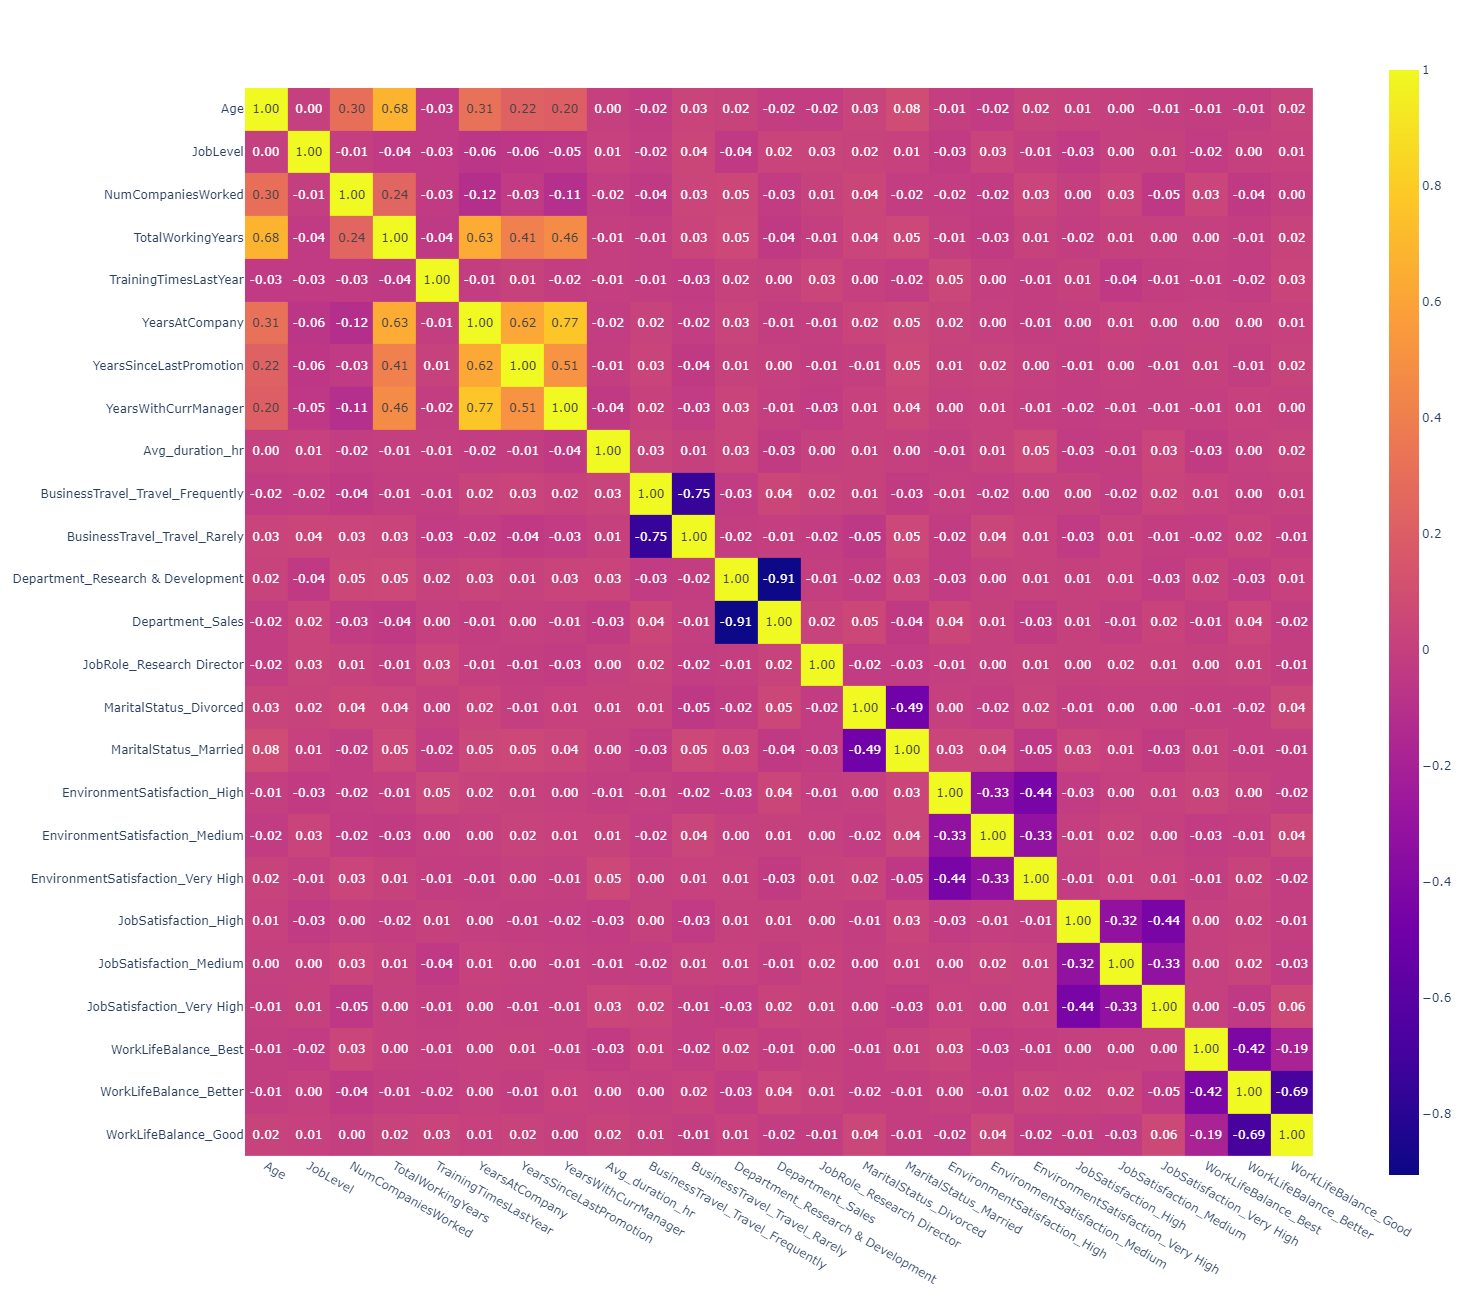

In [106]:
# Extract data for the min model
df_logit_min_data = df_logit_reduced_data.loc[:, ~df_logit_reduced_data.columns.isin(['EducationField_Technical Degree'])]

# Prepare data for the reduced model
df_x_min = df_logit_min_data .drop('Attrition_Yes', axis = 1)
df_x_min = sm.add_constant(df_x_min)
df_y_min = df_logit_min_data ['Attrition_Yes']

# Train Test Split
df_x_train_min, df_x_valid_min, df_y_train_min, df_y_valid_min = train_test_split(df_x_min, df_y_min, train_size = 0.8, random_state = 2)

# Checking correlations
fig = px.imshow(df_x_min.drop('const', axis = 1).corr(), text_auto = '.2f', width = 1500, height = 1300)
fig.show()

In [107]:
# Fitting reduced model
model_logit_min = sm.GLM(df_y_train_min, df_x_train_min, family = sm.families.Binomial())
result_logit_min = model_logit_min.fit(method = 'Newton')
result_logit_min.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          Attrition_Yes   No. Observations:                 3440
Model:                            GLM   Df Residuals:                     3414
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                        Newton   Log-Likelihood:                -1180.6
Date:                Sat, 27 Aug 2022   Deviance:                       2361.2
Time:                        23:50:34   Pearson chi2:                 4.96e+03
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1735
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.0608      0.531     -0.115      0.909      -1.101       0.979
Age                                  -0.0311      0.008     -3.784      0.000      -0.047      -0.015
JobLevel                             -0.1289      0.050     -2.568      0.010      -0.227      -0.031
NumCompaniesWorked                    0.1463      0.023      6.485      0.000       0.102       0.191
TotalWorkingYears                    -0.0826      0.015     -5.494      0.000      -0.112      -0.053
TrainingTimesLastYear                -0.1372      0.042     -3.303      0.001      -0.219      -0.056
YearsAtCompany                        0.0372      0.022      1.717      0.086      -0.005       0.080
YearsSinceLastPromotion               0.1616      0.024      6.661      0.000       0.114       0.209
YearsWithCurrManager                 -0.1645      0.027     -6.009      0.000      -0.218      -0.111
Avg_duration_hr                       0.4726      0.040     11.872      0.000       0.395       0.551
BusinessTravel_Travel_Frequently      1.6000      0.244      6.554      0.000       1.122       2.078
BusinessTravel_Travel_Rarely          0.8959      0.229      3.917      0.000       0.448       1.344
Department_Research & Development    -1.0234      0.214     -4.773      0.000      -1.444      -0.603
Department_Sales                     -1.1593      0.227     -5.112      0.000      -1.604      -0.715
JobRole_Research Director             0.6024      0.206      2.921      0.003       0.198       1.007
MaritalStatus_Divorced               -1.1430      0.155     -7.381      0.000      -1.446      -0.839
MaritalStatus_Married                -0.8905      0.118     -7.543      0.000      -1.122      -0.659
EnvironmentSatisfaction_High         -0.8337      0.146     -5.692      0.000      -1.121      -0.547
EnvironmentSatisfaction_Medium       -0.6825      0.161     -4.244      0.000      -0.998      -0.367
EnvironmentSatisfaction_Very High    -1.0509      0.151     -6.958      0.000      -1.347      -0.755
JobSatisfaction_High                 -0.5223      0.144     -3.627      0.000      -0.804      -0.240
JobSatisfaction_Medium               -0.4803      0.162     -2.968      0.003      -0.797      -0.163
JobSatisfaction_Very High            -1.0753      0.153     -7.012      0.000      -1.376      -0.775
WorkLifeBalance_Best                 -1.0730      0.246     -4.370      0.000      -1.554      -0.592
WorkLifeBalance_Better               -1.2206      0.198     -6.161      0.000      -1.609      -0.832
WorkLifeBalance_Good                 -0.9032      0.212     -4.267      0.000      -1.318      -0.488
=====================================================================================================
"""

In [108]:
# Calculating in sample accuracy for the min model
tab_valid_min = pd.DataFrame({'EmployeeID': df_y_train_min.index,'Attrition': df_y_train_min})
tab_valid_min['Forecast Attrition Probability'] = result_logit_min.predict(df_x_train_min)
tab_valid_min['Forecast Attrition'] = tab_valid_min['Forecast Attrition Probability'].map(lambda x: 1 if x > 0.5 else 0)
metrics.accuracy_score(tab_valid_min.Attrition, tab_valid_min['Forecast Attrition'])

0.861046511627907

Again, excluding `EducationField_Technical Degree` does not reduce the technical performance of the model. Even though `YearsAtCompany` is not statistically significant at 5-percent level, the variable is strongly correlated with many other variables, it should be included in the model as a controlling factor. Effect of the constant is not significant, this means attrition odd of the baseline is not significantly different from 1 when other factors being equal.

As the model cannot be reduced further, the minimum model is the best model in terms of explanatory power that can be achieved by tuning the input variables, but it might not be the best in forecasting. A statistical model can be used either to explain or to forecast. In this case, the HR department might also want to forecast the attrition of current employees in order to make strategic decisions. Hence, it is essential to validate all the discussed models in terms of their forecasting power.

## [9 Validating forecasting power and model choice](#0) <a class=anchor id=10></a>

Forecasting is different from explaining. To evaluate the forecasting performance of the model, out-of-sample data is necessary. That's why the original data is divided into training and validating sets. The model is fitted using the training set, and the validating set is used to validate the model performance with new data. This is similar to calculating in-sample accuracy, the only difference is out-of-sample data is used instead of in-sample data. Out-of-sample accuracy for the full model is calculated as follows.

In [109]:
# generate forecast table for the full model
tab_valid_full = pd.DataFrame({'EmployeeID': df_y_valid.index,'Attrition': df_y_valid})
tab_valid_full['Forecast Attrition Probability'] = result_logit_full.predict(df_x_valid)
tab_valid_full['Forecast Attrition'] = tab_valid_full['Forecast Attrition Probability'].map(lambda x: 1 if x > 0.5 else 0)
tab_valid_full.head()

EmployeeID  Attrition  Forecast Attrition Probability  \
1808        1808          0                           0.195   
21            21          0                           0.014   
2214        2214          0                           0.277   
1057        1057          0                           0.062   
3291        3291          0                           0.080   

      Forecast Attrition  
1808                   0  
21                     0  
2214                   0  
1057                   0  
3291                   0

In [110]:
# confusion matrix for the full model
mat_confusion_full = metrics.confusion_matrix(tab_valid_full.Attrition, tab_valid_full['Forecast Attrition'])
mat_confusion_full

array([[693,  20],
       [107,  40]], dtype=int64)

In [111]:
# overall accuracy of the full model
metrics.accuracy_score(tab_valid_full.Attrition, tab_valid_full['Forecast Attrition'])

0.8523255813953489

Out-of-sample accuracy for the reduced model

In [112]:
# generate forecast table for the reduced model
tab_valid_reduced = pd.DataFrame({'EmployeeID': df_y_valid_reduced.index,'Attrition': df_y_valid_reduced})
tab_valid_reduced['Forecast Attrition Probability'] = result_logit_reduced.predict(df_x_valid_reduced)
tab_valid_reduced['Forecast Attrition'] = tab_valid_reduced['Forecast Attrition Probability'].map(lambda x: 1 if x > 0.5 else 0)
tab_valid_reduced.head()

EmployeeID  Attrition  Forecast Attrition Probability  \
1808        1808          0                           0.198   
21            21          0                           0.010   
2214        2214          0                           0.310   
1057        1057          0                           0.063   
3291        3291          0                           0.083   

      Forecast Attrition  
1808                   0  
21                     0  
2214                   0  
1057                   0  
3291                   0

In [113]:
# confusion matrix for the reduced model
mat_confusion_reduced = metrics.confusion_matrix(tab_valid_reduced.Attrition, tab_valid_reduced['Forecast Attrition'])
mat_confusion_reduced

array([[699,  14],
       [106,  41]], dtype=int64)

In [114]:
# overall accuracy of the reduced model
metrics.accuracy_score(tab_valid_reduced.Attrition, tab_valid_reduced['Forecast Attrition'])

0.8604651162790697

Out-of-sample accuracy for the min model

In [115]:
# generate forecast table for the min model
tab_valid_min = pd.DataFrame({'EmployeeID': df_y_valid_min.index,'Attrition': df_y_valid_min})
tab_valid_min['Forecast Attrition Probability'] = result_logit_min.predict(df_x_valid_min)
tab_valid_min['Forecast Attrition'] = tab_valid_min['Forecast Attrition Probability'].map(lambda x: 1 if x > 0.5 else 0)
tab_valid_min.head()

EmployeeID  Attrition  Forecast Attrition Probability  \
1808        1808          0                           0.195   
21            21          0                           0.010   
2214        2214          0                           0.306   
1057        1057          0                           0.075   
3291        3291          0                           0.082   

      Forecast Attrition  
1808                   0  
21                     0  
2214                   0  
1057                   0  
3291                   0

In [116]:
# confusion matrix for the min model
mat_confusion_min = metrics.confusion_matrix(tab_valid_min.Attrition, tab_valid_min['Forecast Attrition'])
mat_confusion_min

array([[698,  15],
       [107,  40]], dtype=int64)

In [117]:
# overall accuracy of the min model
metrics.accuracy_score(tab_valid_min.Attrition, tab_valid_min['Forecast Attrition'])

0.858139534883721

It can be seen that the out-of-sample performance of all three models is quite similar. It is suprising that the reduced model performs better than the full model in terms of out-of-sample accuracy. This fact shows that including more variables in the model does not help improve out-of-sample performance. 

When choosing a model, it depends on the intention of the person in charge. The minimum model might be the jack of all trades and can be good for both explaining and forecasting purposes. If the difference of 0.2 percent is important, one can shift his intention to the reduced model due to its slightly higher forecasting performance. When absolute performance matters, model choice can be described shortly as follows

* The reduced model is good for forecasting the attrition of current employees
* The minimum model is good for understanding the factors contributing to attrition in general

Detailed explanation of the fitting results is given in the following section.

## [10 Interpreting results](#0) <a class=anchor id=11></a>

To understand the fitting results of a logistic model with categorical variables, it is important to consider two important and related concepts: 

* A baseline can be understood as the reference group of a regression involving categorical variables. To avoid multicollinearity, a group is excluded from from all categorical variables and this group is considered as the baseline. In a logistic regression, the fitting results only show how different other categories are from the baseline, not the absolute effects of these factors on the dependent variable 
* A realized effect is the actual impact of the explanatory factor on the dependent variable in terms of magnitude, which might be different from the fitted effects due to the transformation during the calculation

Since the minimum model is chosen as the best explanatory model, the interpretation will focus mostly on the results of this model. For the minimum model, the baseline is defined as:

* BusinessTravel = 'BusinessTravel_Non-Travel'
* Department = 'Department_Human Resources'
* JobRole = 'JobRole_Human Resources'
* MaritalStatus = 'MaritalStatus_Single'
* EnvironmentSatisfaction = 'EnvironmentSatisfaction_Low'
* JobSatisfaction = 'JobSatisfaction_Low'
* WorkLifeBalance = 'WorkLifeBalance_Bad'

The minimum model only includes the following factors:

* Age
* NumCompaniesWorked
* TrainingTimesLastYear
* YearsAtCompany
* YearsSinceLastPromotion
* YearsWithCurrManager
* Avg_duration_hr
* BusinessTravel
* Department (Research & Development, Sales)
* JobRole (Research Director)
* MaritalStatus
* EnvironmentSatisfaction
* JobSatisfaction
* WorkLifeBalance

These are the factors having statistically significant effects on the attrition odd. Since the logit transformation assumes a linear relationship between the log odd of attrition and other factors, the realized effect of these factors on the attrition odd is the exponential of the coefficients.

$$\log\frac{P(Attrition = 1|x_1, ..., x_n)}{1 - P(Attrition = 1|x_1, ..., x_n)} = \beta_0 + \sum^n_{i=1} \beta_i x_i \Leftrightarrow \frac{P(Attrition = 1|x_1, ..., x_n)}{1 - P(Attrition = 1|x_1, ..., x_n)} = e^{\beta_0 + \sum^n_{i=1} \beta_i x_i}$$

Hence, the realized effects of these factors on attrition odd are multiplicative and the effect sizes are equal to the exponential of their coefficients. The realized effects are calculated as follows.

In [118]:
table_coef_min = result_logit_min.summary().tables[1]
table_coef_min = pd.read_html(table_coef_min.as_html(), header=0, index_col=0)[0]
table_coef_min['Realized effect'] = np.exp(table_coef_min.coef)
table_coef_min[['coef', 'Realized effect']]

coef  Realized effect
const                             -0.061            0.941
Age                               -0.031            0.969
JobLevel                          -0.129            0.879
NumCompaniesWorked                 0.146            1.158
TotalWorkingYears                 -0.083            0.921
TrainingTimesLastYear             -0.137            0.872
YearsAtCompany                     0.037            1.038
YearsSinceLastPromotion            0.162            1.175
YearsWithCurrManager              -0.165            0.848
Avg_duration_hr                    0.473            1.604
BusinessTravel_Travel_Frequently   1.600            4.953
BusinessTravel_Travel_Rarely       0.896            2.450
Department_Research & Development -1.023            0.359
Department_Sales                  -1.159            0.314
JobRole_Research Director          0.602            1.826
MaritalStatus_Divorced            -1.143            0.319
MaritalStatus_Married             -0.890            0.410
EnvironmentSatisfaction_High      -0.834            0.434
EnvironmentSatisfaction_Medium    -0.682            0.505
EnvironmentSatisfaction_Very High -1.051            0.350
JobSatisfaction_High              -0.522            0.593
JobSatisfaction_Medium            -0.480            0.619
JobSatisfaction_Very High         -1.075            0.341
WorkLifeBalance_Best              -1.073            0.342
WorkLifeBalance_Better            -1.221            0.295
WorkLifeBalance_Good              -0.903            0.405

The realized effect of each factor is interpreted as its multiplicative effect on the baseline. Suppose that the baseline attrition odd is $1.1$, and the realized effect of a factor A is $1.2$, the total effect is $1.1 \times 1.2$. In this case, the baseline attrition odd is represented by the realized effect of the constant. It should be noted that the model includes both numerical and categorical variables, so the baseline is defined as an observation with all numerical features equal to zero and categorical features equal to the baseline groups, which means

* Age = 0
* NumCompaniesWorked = 0
* TrainingTimesLastYear = 0
* YearsAtCompany = 0
* YearsSinceLastPromotion = 0
* YearsWithCurrManager = 0
* Avg_duration_hr = 0
* BusinessTravel = 'BusinessTravel_Non-Travel'
* Department = 'Department_Human Resources'
* JobRole = 'JobRole_Human Resources'
* MaritalStatus = 'MaritalStatus_Single'
* EnvironmentSatisfaction = 'EnvironmentSatisfaction_Low'
* JobSatisfaction = 'JobSatisfaction_Low'
* WorkLifeBalance = 'WorkLifeBalance_Bad'

Which is unrealistic in this case, so a statistically insignificant constant makes sense. As the constant is not statistically significant, the baseline attrition odd is one. With this thought in mind, the realized effect of a factor increases the attrition probability when it is greater than one, and the other way around when it is lower than one. The interpretation also depends on the type of variable: 

* For numerical variables, the realized effect is the multiplicative effect of each additional unit on the baseline
* For categorical variables, the realized effect is the multiplicative effect of the category on the baseline

For example in this case, when the baseline attrition odd is 1, considering only two factors `Age`, and `BusinessTravel` and the observed employee is of 18 years old. If the person doesn't travel, the expected attrition odd is calculated as $1 \times 0.969^{18}$, where $0.969$ is the realized of `Age` in the model.

In [119]:
# attrition odd for Age = 18 and BusinessTravel = Non-Travel
1*(0.969**18)

0.567319859821517

Which means the probability of attrition is much lower than that of non-attrition. After working for a year, the person now has to travel rarely, the attrition odd then changes as follows $1 \times 0.969^{19} \times 2.450$

In [120]:
# attrition odd for Age = 19 and BusinessTravel = Travel_Rarely
1*(0.969**18)*2.450

1.3899336565627167

Where $2.450$ is the approximated realized effect of `Travel_Rarely`. This number is the attrition odd, which means the probability of attrition is approximately 40% higher than that of non-attrition. With this logic, factors raising the attrition odd are

In [121]:
table_coef_min.loc[table_coef_min['Realized effect'] > 1, ['coef', 'Realized effect']]

coef  Realized effect
NumCompaniesWorked               0.146            1.158
YearsAtCompany                   0.037            1.038
YearsSinceLastPromotion          0.162            1.175
Avg_duration_hr                  0.473            1.604
BusinessTravel_Travel_Frequently 1.600            4.953
BusinessTravel_Travel_Rarely     0.896            2.450
JobRole_Research Director        0.602            1.826

It can be seen that `Avg_duration_hr` has a strong realized effect on the attrition odd in the numerical variables, and `BusinessTravel_Travel_Frequently` has a very strong realized effect on the attrition odd in the categorical variables (up to approximately 5 times). Similarly, factors reducing the attrition odd are

In [122]:
table_coef_min.loc[table_coef_min['Realized effect'] < 1, ['coef', 'Realized effect']]

coef  Realized effect
const                             -0.061            0.941
Age                               -0.031            0.969
JobLevel                          -0.129            0.879
TotalWorkingYears                 -0.083            0.921
TrainingTimesLastYear             -0.137            0.872
YearsWithCurrManager              -0.165            0.848
Department_Research & Development -1.023            0.359
Department_Sales                  -1.159            0.314
MaritalStatus_Divorced            -1.143            0.319
MaritalStatus_Married             -0.890            0.410
EnvironmentSatisfaction_High      -0.834            0.434
EnvironmentSatisfaction_Medium    -0.682            0.505
EnvironmentSatisfaction_Very High -1.051            0.350
JobSatisfaction_High              -0.522            0.593
JobSatisfaction_Medium            -0.480            0.619
JobSatisfaction_Very High         -1.075            0.341
WorkLifeBalance_Best              -1.073            0.342
WorkLifeBalance_Better            -1.221            0.295
WorkLifeBalance_Good              -0.903            0.405

It can be seen that `WorkLifeBalance`, `JobSatisfaction`, `EnvironmentSatisfaction` are very effective in reducing the attrition odd.

## [11 Conclusion & executive summary](#0) <a class=anchor id=12></a>

In this analysis, a logistic model is used to analyze the impacts of many fators on the attrition in order to understand what makes employees quit their job. The analysis employs `numpy`, `pandas`, `statsmodels`, and `plotly` as the main packages and the main steps include importing and wrangling data, linear regression, model validation, and interpretation of the results. The data includes 6 different tables including information about employees and managers as well as their working time, the final table consists of around 4,400 observations and 26 variables. The regression analysis shows that 

* `Average_duration_hr`, `BusinessTravel`, and `JobRole_Research Director` are the main factors that increase the attrition probability
* `WorkLifeBalance`, `JobSatisfaction`, and `EnvironmentSatisfaction` are the main factors that help reduce the attrition probability

Furthermore, this model is also good for predicting attrition rate with an out-of-sample accuracy of approximately 86 percents. In conclusion, the attrition rate is well explained and predicted by the employed model.